                        Table of Contents

1. Global Variables
2. Code for preprocessing Ecological Momentary Assesment (EMA) data
    - Preprocess data if it doesn't already exist (preprocessing.py) [script]
    - Transform EMA data to create UTC timestamps (process_ema.py) [script]
    - Check for overlaps between EMA and EDA data; return filtered data (process_eda_and_combine.py) [script]
    - Run scripts (if necessary) to prepare EMA data
    - Prepare EMA data for modeling
    - Selection of relevant features for modeling (Semantic Space Theory)
    - Sentiment analysis to confirm grouping of negative and positive variables
3. Code for preprocessing EDA data
    - Galvanic Skin Response (GSR) Feature Engineering (GSR_Preprocessing.py) [script]
    - GSR Preprocessing for automatic feature extraction
    - Automatic feature extraction via autoencoder architecture provided by PyEDA 
    - Autoencoder specification for feature engineering
    - Combine statistical and automatically extracted features
4. Preprocessing modeling data (EDA + EMA)
    - Exploratory Data Analysis
    - Impute missing data and group shuffle for training, validation, and testing
5. Training Machine Learning Models
    - Linear Regression
    - Linear Regression with L1 penalization (LASSO)
    - Random Forest
    - XGBoost
6. Prediction of Negative Valence Intensity
7. Supplamentary Analysis (Positive Valence Intensity)
8. Supplementary Analysis (Only Negative Intensity)
9. Supplementary Analysis (Only Positive Intensity)
10. Supplementary Analysis (Subsampled Negative Intensity)
11. Supplementary Analysis (Subsampled Negative Intensity)

# Global Variables

In [1]:
# Install necessary packages for project
! pip install nltk
! pip install xgboost
! pip install shap


[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: python3.10 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: python3.10 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [2]:
## Load packages for whole pipeline from data perparation to modeling ##
# For file system administration
import importlib #for forced updating and loading of packages
import os #for local file directories
import warnings # For aesthetic notebook formatting

# For data engineering operations
import sys #for command line operations
import subprocess #for command line orchestration
import glob #for regex-like text matching
from tqdm import tqdm #for keeping track of operation processes
import pickle #for storing and loading large stores of python data
import joblib #for saving trained models and loading pre-trained models

# For data science operations
import pandas as pd #for dataframe operations
import numpy as np #for vectorized computations
from datetime import datetime #for conversion to consistent time indexing
import torch #for training of machine & deep learning algorithms
from torch import nn #for training neural networks
import math #for mathematical operations
import nltk #for nlp operations
from nltk.sentiment import SentimentIntensityAnalyzer #for sentiment intensity scores
import matplotlib.pyplot as plt #for graphical visualization
from sklearn.impute import KNNImputer  #for KNN Imputation
from sklearn.preprocessing import StandardScaler  #for standardizing data
from sklearn.model_selection import train_test_split #for seperating data into train/test splits
from sklearn.neighbors import KNeighborsRegressor #for predicting dependent variable based on matching independent variable groupings
from sklearn.metrics import mean_squared_error, r2_score #for model evaluation
from sklearn.linear_model import LinearRegression #for linear regression modeling
from sklearn.linear_model import Lasso #for L1 penalized linear regression modeling
from sklearn.ensemble import RandomForestRegressor #for random forest regression modeling
from xgboost import XGBRegressor #for XGBoost modeling
import shap #for Shapley Additive Explanations (XAI)
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV #for parameter tuning
from math import floor, ceil #for parameter tuning
from sklearn.decomposition import PCA #for dimensionality reduction
from sklearn.model_selection import GroupShuffleSplit

# Download necessary resources
nltk.download('vader_lexicon') #for providing sentiment scores for individual words.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/johnnycastillo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Set current working directory
os.chdir("/Users/johnnycastillo/Desktop/Affective_Phys/") 

# Code for preprocessing EMA data

### Script: Preprocess data if it doesn't already exist (preprocessing.py)

In [4]:
# sys.path.append(os.path.abspath(os.path.dirname(__file__)))

# # Import local scripts
# import process_ema
# import process_eda_and_combine

# # Function to install packages from a requirements file
# def install_packages(requirements_file):
#     subprocess.check_call([sys.executable, '-m', 'pip', 'install','--user', '-r', requirements_file])

# # Path to your requirements file
# requirements_file = 'requirements.txt'
# install_packages(requirements_file)

# if __name__ == "__main__":
#     # List the files specified in the command line
#     inputFiles = sys.argv[1:] 
#     User_ID = inputFiles[0]
#     EMA_DF = inputFiles[1]
    
# # Check if EMA_Processed.csv exists
# ema_processed_file = './EMA_Processed.csv'
# if not os.path.exists(ema_processed_file):
#     # Run EMA processing script if EMA_Processed.csv doesn't exist
#     process_ema.run(EMA_DF)

# # Run EDA processing and combine script
# process_eda_and_combine.run(User_ID)

### Script: Transform EMA data to create UTC timestamps (process_ema.py)

In [5]:
# # Function to remove duplicates conditionally
# def Rem_Dup(df, clm):
#     if df[clm].duplicated().any():
#         non_numeric_values = df[~df[clm].astype(str).str.isdigit()].index
#         num_dup = len(non_numeric_values)
#         for i in range(num_dup):
#             dup_row = non_numeric_values[i]
#             content = df[clm].iloc[dup_row]
#             df[clm].iloc[dup_row] = content[0]
#     return
#
# # Function to convert time-based data to UTC for comparability
# def convert_column_to_unix_utc_inplace(df, column_name):
#     if not pd.api.types.is_datetime64_any_dtype(df[column_name]):
#         print(f"Converting column '{column_name}' to datetime.")
#         df[column_name] = pd.to_datetime(df[column_name], utc=True)
#     else:
#         print(f"Column '{column_name}' is already in datetime format.")
    
#     # Print a sample of the converted column before and after conversion
#     print(f"Sample of '{column_name}' before conversion to Unix timestamps:")
#     print(df[column_name].head())
    
#     df[column_name] = df[column_name].dt.tz_convert('UTC').astype('int64') // 1000000000
    
#     print(f"Sample of '{column_name}' after conversion to Unix timestamps:")
#     print(df[column_name].head())

# def process_ema(ema_file_path, output_file):
#     if os.path.exists(output_file):
#         print(f"Loading existing file: {output_file}")
#         return pd.read_csv(output_file)
#     else:
#         print(f"Processing EMA data and saving to {output_file}")
        
#         # LOAD EMA Data
#         EMA_df = pd.read_csv(ema_file_path)
        
#         ## Unordered ##
#         EMA_df['session_id'] = pd.Categorical(EMA_df['session_id'])
#         EMA_df['ppt_id'] = pd.Categorical(EMA_df['ppt_id'])
#         EMA_df['survey_name'] = pd.Categorical(EMA_df['survey_name'])

#         ## Ordered ##
#         for col in [
#             'day_affect_stress_financial', 'day_affect_stress_friends', 'day_affect_stress_health', 
#             'day_affect_stress_legal', 'day_affect_stress_overall', 'day_affect_stress_romantic', 
#             'day_affect_stress_school_work', 'now_affect_agitated', 'now_affect_angry', 'now_affect_burdensome',
#             'now_affect_desire_approach', 'now_affect_desire_avoid', 'now_affect_desire_escape', 
#             'now_affect_energetic', 'now_affect_fatigued', 'now_affect_happy', 'now_affect_hopeless', 
#             'now_affect_humiliated', 'now_affect_impulsive', 'now_affect_isolated', 'now_affect_negative', 
#             'now_affect_numb', 'now_affect_overwhelmed', 'now_affect_positive', 'now_affect_relaxed', 
#             'now_affect_sad', 'now_affect_self_hate', 'now_affect_stress_overall', 'now_affect_stressed', 
#             'now_affect_tense', 'now_affect_trapped', 'now_affect_worried'
#         ]:
#             Rem_Dup(EMA_df, col)
#             EMA_df = EMA_df.astype({col: int})
        
#         ## Date/Time ##
#         convert_column_to_unix_utc_inplace(EMA_df, 'started_at')
#         EMA_df['started_at'] = EMA_df['started_at'].astype(np.int64)
#         EMA_df = EMA_df[~EMA_df.index.duplicated(keep='first')]  # Remove duplicates if they exist
        
#         # Check if 999 (unseen) exists in the DataFrame
#         if (EMA_df == 999).any().any():
#             EMA_df = EMA_df.replace(999, np.nan)  # Replace 999 with NaN

#         # Check if 888 (unanswered) exists in the DataFrame
#         if (EMA_df == 888).any().any():
#             EMA_df = EMA_df.replace(888, np.nan)  # Replace 888 with NaN
        
#         EMA_df.to_csv(output_file, index=False)
#         return EMA_df

# def run(ema_file_path):
#     output_file = './EMA_Processed.csv'
#     process_ema(ema_file_path, output_file)

### Script: Check for overlaps between EMA and EDA data; returned filtered data (process_eda_and_combine.py)

In [6]:
# # Function to mark overlaps
# def mark_overlaps(df1, col1, df2, col2, interval_minutes, chunk_size=1000000):
#     interval_seconds = interval_minutes * 60
#     df1['time_ts'] = df1['Unix Timestamp (UTC)'].astype(np.int64) // 1000  # Convert to seconds
#     df2['overlap'] = False
    
#     # Create a new DataFrame to store the filtered data
#     filtered_data = pd.DataFrame()

#     # Process df1 in chunks
#     num_chunks = (len(df1) + chunk_size - 1) // chunk_size
#     for i in tqdm(range(num_chunks), desc="Processing chunks"):
#         start_idx = i * chunk_size
#         end_idx = min((i + 1) * chunk_size, len(df1))
#         chunk_df1 = df1.iloc[start_idx:end_idx]

#         for idx, row in df2.iterrows():
#             start_time = row['started_at']
#             start_interval = start_time - interval_seconds
#             interval_data = chunk_df1[(chunk_df1['time_ts'] >= start_interval) & (chunk_df1['time_ts'] < start_time)]
            
#             if not interval_data.empty:
#                 df2.at[idx, 'overlap'] = True
#                 filtered_data = pd.concat([filtered_data, interval_data], ignore_index=True)

#     return filtered_data, df2

# Function to load data if it already exists
# def process_or_load(df1, col1, df2, col2, output_EMA, output_EDA, participant_id_ema_format, interval_minutes=10, chunk_size=1000000):
#     if os.path.exists(output_EMA):
#         print(f"Loading existing file: {output_EMA}")
#     else:
#         print(f"File not found. Running mark_overlaps and saving to {output_EMA}")
#         df2_filtered = df2[df2['ppt_id'] == participant_id_ema_format]
#         result_df1, result_df2 = mark_overlaps(df1, col1, df2_filtered, col2, interval_minutes)
#         result_df1.to_csv(output_EDA, index=False)
#         result_df2.to_csv(output_EMA, index=False)

# Function to find all the relevant user data if it already exists
# def process_eda_and_combine(user_id, ema_file_path):
#     output_EMA = f'./{user_id}_overlaps.csv'
#     output_EDA = f'./{user_id}_EDA.csv'
#     EMA_df = pd.read_csv(ema_file_path)
#     file_pattern = f'*_{user_id}_*.csv'
#     files = glob.glob(file_pattern)

#     if not files:
#         print(f"No files found for User ID {user_id}")
#         return

#     user_id_lower = user_id.lower()
#     user_map = EMA_df[EMA_df['ppt_id'].str.contains(user_id_lower, case=False)].iloc[0]
#     prefix = user_map['ppt_id'].split('-')[0]
#     participant_id_ema_format = f'{prefix}-{user_id_lower}'

#     for file in files:
#         EDA_df = pd.read_csv(file)
#         EDA_df['ppt_id'] = participant_id_ema_format
#         process_or_load(EDA_df, 'Unix Timestamp (UTC)', EMA_df, 'started_at', output_EMA, output_EDA, participant_id_ema_format, interval_minutes=10)

# def run(user_id):
#     ema_file_path = './EMA_Processed.csv'
#     process_eda_and_combine(user_id, ema_file_path)

### Run scripts (if necessary) to prepare EMA data

In [7]:
# Check if EMA_Processed.csv exists -- run processing pipeline if not
ema_processed_file = './EMA_Processed.csv' #Define EMA file
if not os.path.exists(ema_processed_file):
    # Import all the scripts from above
    import process_ema
    import process_eda_and_combine
    # Run EMA processing script if EMA_Processed.csv doesn't exist
    process_ema.run(EMA_DF)
    # Run EDA processing and combine script
    process_eda_and_combine.run(User_ID)

### Prepare EMA data for modeling

In [8]:
#Load dataframe
EMA_df = pd.read_csv('/Users/johnnycastillo/Desktop/Affective_Phys/EMA_Processed.csv')

In [9]:
# Enforce Data Types

### Helper Function ###
## Unordered ##
EMA_df['session_id'] = pd.Categorical(EMA_df['session_id'])
EMA_df['ppt_id'] = pd.Categorical(EMA_df['ppt_id'])
EMA_df['survey_name'] = pd.Categorical(EMA_df['survey_name'])

## Ordered ##
EMA_df = EMA_df.astype({'day_affect_stress_financial': 'Int64'})
EMA_df = EMA_df.astype({'day_affect_stress_friends': 'Int64'})
EMA_df = EMA_df.astype({'day_affect_stress_health': 'Int64'})
EMA_df = EMA_df.astype({'day_affect_stress_legal': 'Int64'})
EMA_df = EMA_df.astype({'day_affect_stress_overall': 'Int64'})
EMA_df = EMA_df.astype({'day_affect_stress_romantic': 'Int64'})
MA_df = EMA_df.astype({'day_affect_stress_school_work': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_agitated': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_angry': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_burdensome': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_desire_approach': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_desire_avoid': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_desire_escape': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_energetic': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_fatigued': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_happy': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_hopeless': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_humiliated': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_impulsive': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_isolated': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_negative': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_numb': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_overwhelmed': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_positive': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_relaxed': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_sad': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_self_hate': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_stress_overall': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_stressed': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_tense': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_trapped': 'Int64'})
EMA_df = EMA_df.astype({'now_affect_worried': 'Int64'})

## Date/Time ##
EMA_df['started_at'] = pd.to_datetime(EMA_df['started_at']) #Convert string obj into TimeStamp data
EMA_df = EMA_df[~EMA_df.index.duplicated(keep='first')] #Remove duplicates if they exist

In [10]:
#Replace 999 values with NAs
EMA_df = EMA_df.replace(999, np.nan) #Replace skipped items
EMA_df = EMA_df.replace(888, np.nan) #Replace unseen items

### Selection of relevant features for modeling (Semantic Space Theory)
Cowen & Keltner (2021) argue for 18 emotional states conserved across all modalities:
8 Negatively valenced states: anger, anxiety, confusion, disgust, embarrassment, fear, pain, and sadness
9 Positively valenced states: amusement, awe, contentment, desire, elation*, interest, love, relief*, and triumph
1 Other: Surprise

Keltner, Brooks & Cowen (2023) argue that 21 emotions meet Ekman’s criteria for “basic” emotions (by being associated with distinct antecedents, experiences, expressions, and neurophysiological correlates):

10 Negatively valenced states: anger, anxiety, boredom*, confusion, disgust, embarrassment, fear, pain, sadness, and shame*
10 Positively valenced states: amusement, awe, contentment, desire, excitement, love, interest, pride*, sympathy*, and triumph
1 Other: Surprise

Altogether this allows for a combination of 23 potential emotional states which can be considered distinct:
anger, anxiety, boredom, confusion, disgust, embarrassment, fear, pain, and sadness, amusement, awe, contentment, desire, elation, interest, love, relief, and triumph, shame, excitement, pride, sympathy, Surprise

The 24 emotions captured in our self-report data were:
agitated, angry, burdensome, approach, avoid, desire_escape, energetic, fatigued, happy, hopeless, humiliated, impulsive, isolated, negative, numb, overwhelmed, positive, relaxed, sad, self_hate, stressed, tense, trapped, worried

Among the core emotions identified by semantic space theory, the ones captured by our self-report data were:
1. angry → anger (-; H/U)
2. sad → sadness (-; L/U)
3. tense -> anxiety (-;H/U)
4. humiliated → embarrassment (-; LU)
5. avoid → fear (-; H/U)***
6. happy → elation (+; H/P)
7. positive - contentment (+; L/P)
8. energetic → excitement (+; H/P)
9. relaxed - relief (+; L/P)
10. self_hate → shame  (-; L/U)
11. stressed → anxiety (-; H/U)

(+): 4
(-): 7

LP: 2
HP: 2
HU: 4
LU: 3

High arousal (H); Low Arousal (L)
Pleasant (P); Unpleasant (U)

In [11]:
# Define a helper function to rename columns by removing the prefix
def remove_prefix(df, prefix):
    df = df.rename(columns=lambda x: x.replace(prefix, '') if x.startswith(prefix) else x)
    return df

#Select Relevant Columns
EMA_filtered_now = EMA_df[['ppt_id', 'session_id', 'now_affect_angry', 'now_affect_sad', 'now_affect_tense', 'now_affect_humiliated', 'now_affect_desire_avoid', 'now_affect_happy', 'now_affect_positive', 'now_affect_energetic', 'now_affect_relaxed', 'now_affect_self_hate', 'now_affect_stressed']]
EMA_filtered_day = EMA_df[['ppt_id', 'session_id', 'day_affect_angry', 'day_affect_sad', 'day_affect_tense', 'day_affect_humiliated', 'day_affect_desire_avoid', 'day_affect_happy', 'day_affect_positive', 'day_affect_energetic', 'day_affect_relaxed', 'day_affect_self_hate', 'day_affect_stressed']]

# Remove 'now_' and 'day_' prefixes for both DataFrames
EMA_filtered_now = remove_prefix(EMA_filtered_now, 'now_affect_')
EMA_filtered_day = remove_prefix(EMA_filtered_day, 'day_affect_')

# Concatenate the two DataFrames together
EMA_filtered = pd.concat([EMA_filtered_now, EMA_filtered_day], axis=0).reset_index(drop=True)

In [12]:
# Drop rows where all values in columns 2 to 13 are <NA>
EMA_filtered = EMA_filtered.dropna(subset=EMA_filtered.columns[2:13], how='all').reset_index(drop=True)

In [13]:
# Determine Missing percentage of trials per question
Exclusion = EMA_filtered.isna().sum()/EMA_filtered.shape[0] *100
display(Exclusion)

f'The greatest precentage of missing trials was {np.round(np.max(Exclusion.values), 2)}%'

ppt_id          0.000000
session_id      0.002282
angry           1.110401
sad             6.993358
tense           7.009335
humiliated      1.113825
desire_avoid    1.100130
happy           6.991076
positive        1.106977
energetic       1.110401
relaxed         7.041289
self_hate       1.103554
stressed        7.005911
dtype: float64

'The greatest precentage of missing trials was 7.04%'

### Sentiment analysis to confirm grouping of negative and positive variables

In [14]:
# Process the column names to obtain the emotional categorical labels 
emotional_words = [word for word in EMA_filtered.columns[2:13]]
# Change self_hate, to hate for categorization
emotional_words = [x.split('_')[1] if len(x.split('_')) > 1 else x.split('_')[0] for x in emotional_words]

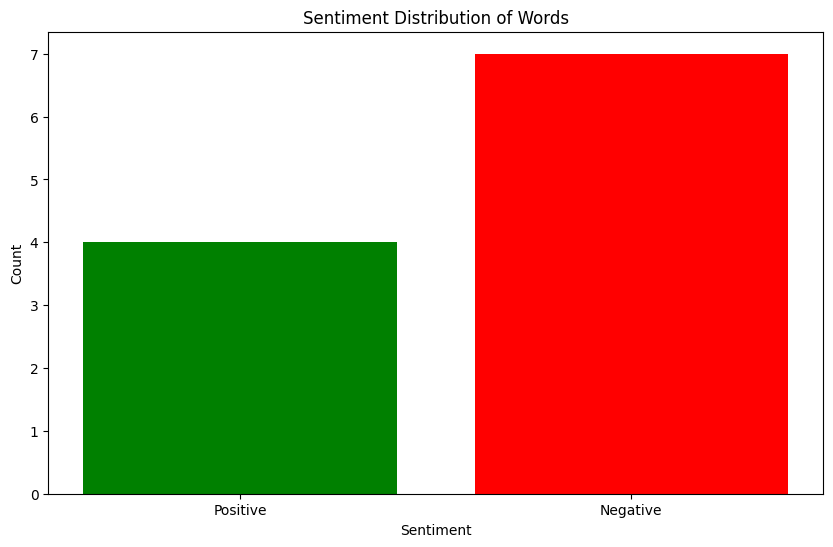

In [15]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to classify sentiment using VADER
def classify_sentiment_vader(word):
    # Get sentiment scores from VADER
    vader_scores = sia.polarity_scores(word)
    vader_compound_score = vader_scores['compound']

    # Classify sentiment based on compound score
    if vader_compound_score >= 0.1:
        return 'Positive'
    elif vader_compound_score <= -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Define words to test
Emotional_w = emotional_words

# Initialize an empty dictionary to store the sentiment for each word
sentiments_dict = {}

# Classify sentiment for each word using VADER
for word in Emotional_w:
    vader_sentiment = classify_sentiment_vader(word)

    # Code vader sentiment as final sentiment
    if vader_sentiment == 'Negative':
         final_sentiment = 'Negative'
    elif vader_sentiment == 'Positive': 
         final_sentiment = 'Positive'

    # Add the word and its final sentiment to the dictionary
    sentiments_dict[word] = final_sentiment

# Count the number of occurrences of each sentiment
sentiments = {'Positive': 0, 'Negative': 0}
for sentiment in sentiments_dict.values():
    sentiments[sentiment] += 1

# Plot the bar graph distribution of positive and negative words
plt.figure(figsize=(10, 6))
plt.bar(sentiments.keys(), sentiments.values(), color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution of Words')
plt.show()

In [16]:
# Categorize words based on sentiment
positive_words = [word for word, sentiment in sentiments_dict.items() if sentiment == 'Positive']
negative_words = [word for word, sentiment in sentiments_dict.items() if sentiment == 'Negative']

# Display positive words
print("Positive words (4):")
for i, word in enumerate(positive_words, start=1):
    print(f"{i}. {word}")

# Display negative words
print("\nNegative words (7):")
for i, word in enumerate(negative_words, start=1):
    print(f"{i}. {word}")


Positive words (4):
1. happy
2. positive
3. energetic
4. relaxed

Negative words (7):
1. angry
2. sad
3. tense
4. humiliated
5. avoid
6. hate
7. stressed


# Code for preprocessing EDA data

For the purposes of preparing our EDA data we elected to use pyEDA (Aqajari et al., 2021) - a previously published and validated, open-source Python Toolkit - for signal preprocessing and automatic statistical feature extraction,

Additionally, 18 statistical features were calculated from a previous work examining machine learning Methods for Fear Classification Based on Physiological Features and subjective responses stored in the DEAP dataset (Petrescu et al., 2021). Among these signal-derived features, 9 were time-related, 3 were event-related, 3 were waveform-related, and 3 were amplitude-related.

#### Citations
Aqajari, S. A. H., Naeini, E. K., Mehrabadi, M. A., Labbaf, S., Dutt, N., & Rahmani, A. M. (2021). pyeda: An open-source python toolkit for pre-processing and feature extraction of electrodermal activity. Procedia Computer Science, 184, 99-106.

Petrescu, L., Petrescu, C., Oprea, A., Mitruț, O., Moise, G., Moldoveanu, A., & Moldoveanu, F. (2021). Machine Learning Methods for Fear Classification Based on Physiological Features. Sensors (Basel, Switzerland), 21(13), 4519. https://doi.org/10.3390/s21134519

In [17]:
# Mount local version of PyEDA to python environment
sys.path.append('/mnt/data/pyEDA')
from pyEDA import main #Load pyEDA for preprocessing
from pyEDA.main import prepare_automatic

### Script: Galvanic Skin Response (GSR) Feature Engineering (GSR_Preprocessing.py)

In [18]:
# ## Helper functions for preprocessing data ##
# #Waveform Length of the signals (Equation)
# def waveform_length(X):
#     # Compute the differences between successive values
#     delta_X = np.diff(X)
    
#     # Square the differences and sum them
#     X_wl = np.sum(delta_X**2)
    
#     return X_wl


# # Slope sign changes (Count)
# def slope_sign_changes(X, epsilon=0.001):
#     X = X[0]
#     # Initialize SSC counter
#     X_ssc = 0

#     # Iterate over the signal from the second element to the second-to-last element
#     for K in range(1, len(X) - 2):
#         # Calculate the slope sign changes
#         if (np.sign(X[K] - X[K-1]) * np.sign(X[K+1] - X[K]) < 0 and
#             abs(X[K] - X[K-1]) >= epsilon and abs(X[K-1] - X[K]) >= epsilon):
#             X_ssc += 1

#     return X_ssc


# # Willison amplitude (equation)
# def willison_amplitude(X, epsilon_W=0.01):
#     # Initialize WAMP counter
#     X_wamp = 0

#     # Iterate over the signal from the second element to the last element
#     for K in range(1, len(X)):
#         # Check if the absolute difference exceeds the threshold epsilon_W
#         if abs(X[K] - X[K-1]) >= epsilon_W:
#             X_wamp += 1

#     return X_wamp


# # Split participants EDA data into distinct sessions preceding EMA ratings
# def split_sessions(df, time_gap=600000):
#     # Ensure data is sorted by the timestamp
#     df = df.sort_values('Unix Timestamp (UTC)')
    
#     # Calculate the difference between consecutive timestamps
#     df['time_diff'] = df['Unix Timestamp (UTC)'].diff().fillna(0)
    
#     # Identify session breaks (where the time difference exceeds the time gap)
#     session_starts = df['time_diff'] > time_gap
    
#     # Create a session number column
#     df['session_num'] = session_starts.cumsum() + 1
    
#     # Extract participant ID from the DataFrame
#     ppt_id = df['ppt_id'].iloc[0]
    
#     # Split the data by session and save to new files in the current working directory
#     for session, session_data in df.groupby('session_num'):
#         session_file = f'{ppt_id}_S{session}.csv'
#         session_data.drop(columns=['time_diff', 'session_num'], inplace=True)
#         session_data.to_csv(session_file, index=False)
#         print(f'Session {session} saved to {session_file}')

# # Linear interpolation method
# def fill_na_with_interpolation(signal):
#     return pd.Series(signal).interpolate(method='linear').to_numpy()

# # Min Max normalization for electrodermal activation signal
# def normalize_signal(signal):
#     min_val = np.min(signal)
#     max_val = np.max(signal)
#     # Avoid division by zero
#     if max_val - min_val == 0:
#         return np.zeros_like(signal)  # or return a constant array
#     normalized_signal = (signal - min_val) / (max_val - min_val)
#     return normalized_signal

# ## Code to preprocess data for each participant ##
# # File to store the EDA data
# output_file = 'eda_data_list.pkl'

# # File to store unusable data
# empty_file = 'empty_PS_list.txt'

# #List the files specified in the command line
# inputFiles = sys.argv[1:] 

# # Process each participant from command-line arguments
# for participant in inputFiles:
#     # Load each participant's EDA signal data
#     eda_df = pd.read_csv(f"{participant}_EDA.csv")
#     # Split up each participants data based on the number of sessions available
#     split_sessions(eda_df)
#     # Create lowercase version of the participant ID
#     participant_lower = participant.lower()

#     # Define patterns to match files for this participant
#     patterns = [
#         f'u01-{participant_lower}_S[1-9].csv',          # Match S1 to S9
#         f'u01-{participant_lower}_S[1-9][0-9].csv',     # Match S10 to S99
#         f'u01-{participant_lower}_S1[0-9][0-9].csv',    # Match S100 to S199
#         ]

#     # Use glob to find all files matching the patterns
#     files = []
#     for pattern in patterns:
#         files.extend(glob.glob(pattern))
#         for file in files:
#             # Load the CSV file into a DataFrame
#             df = pd.read_csv(file)
#             print(f"Loaded data for participant: {participant_lower} from file: {file}")
            
#             # Extract session info from the filename
#             session_num = file.split('_')[-1].split('.')[0]  # Pullout word after '_' and before '.csv' (S[###])

#             # Pull out raw Galvanic Skin Response (GSR) data
#             eda_signal = df['EDA (microS)'].values
            
#             # Determine amount of EDA data present in each session
#             amt_trls = len(eda_signal)/4
            
#             # Set the parameter in PyEDA
#             Seg_w = int(amt_trls//4) #4 hertz per second, rounded to closest integer value for setting parameter value
            
#             # Calculate the difference between the width and amount of trials
#             leftover_trials = len(eda_signal) - (Seg_w * 4)

#             # Calculate percentage of missing trials
#             miss_trl_pct = (np.isnan(eda_signal).sum()/len(eda_signal))*100
            
#             # If there are leftover trials to drop, alter the DataFrame
#             if leftover_trials > 0:
#                 # Drop the first `leftover_trials` rows
#                 eda_signal = eda_signal[leftover_trials:]  # Adjust the DataFrame

#             # Fill in NA's via linear interpolation if applicable
#             if np.isnan(eda_signal).sum() > 0:
#                 eda_signal = fill_na_with_interpolation(eda_signal)

#             # Ensure that the EDA data is not corrupted
#             if not np.isnan(eda_signal).all() and miss_trl_pct < 10:

#                 # Automatically preprocess EDA signal using PyEDA
#                 m, wd, eda_clean = process_statistical(eda_signal, use_scipy=True, sample_rate=4, segment_width=Seg_w, segment_overlap=0)

#                 # Ensure precessed data file is not empty before proceeding
#                 if m:
#                     ## Calculate statistical EDA metrics ##
#                     # Based on 33 metrics from Petrescu et al., 2021: 
#                     # - 6 metrics (no baseline measurement of EDA)
#                     # - 9 metrics (not a high enough frequency for power analysis)
#                     # 18 total metrics

#                     ## Event-related features (provided by PyEDA) (3) ##
#                     # Average amplitude of GSR
#                     GSR_avimp = m['mean_gsr'][0]
#                     # Number of electrodermal responses
#                     GSR_nimp = m['number_of_peaks'][0]
#                     # Maximum amplitude of GSR
#                     GSR_maximp = m['max_of_peaks'][0]

#                     ## Time-related features (provided by PyEDA) (12) ##
#                     # Mean Absolute values of signals (3) #
#                     # Galvinic Skin Response
#                     GSR_mav = np.mean(np.abs(eda_clean))
#                     # Skin Conductance Level
#                     SCL_mav = np.mean(np.abs(wd['tonic_gsr']))
#                     # Skin Conductance Response
#                     SCR_mav = np.mean(np.abs(wd['filtered_phasic_gsr']))

#                     # Standard Deviation of signals (3) #
#                     # Galvinic Skin Response
#                     GSR_std = np.std(eda_clean)
#                     # Skin Conductance Level
#                     SCL_std = np.std(wd['tonic_gsr'])
#                     # Skin Conductance Response
#                     SCR_std = np.std(wd['filtered_phasic_gsr'])

#                     # Slope sign changes of the signal (3) #
#                     # Galvinic Skin Response
#                     GSR_ssc = slope_sign_changes(eda_clean)
#                     # Skin Conductance Level
#                     SCL_ssc = slope_sign_changes(wd['tonic_gsr'])
#                     # Skin Conductance Response
#                     SCR_ssc = slope_sign_changes(wd['filtered_phasic_gsr'])

#                     ## Waveform Length of the signals (3) ##
#                     # Galvinic Skin Response
#                     GSR_wl = waveform_length(eda_clean)
#                     # Skin Conductance Level
#                     SCL_wl = waveform_length(wd['tonic_gsr'])
#                     # Skin Conductance Response
#                     SCR_wl = waveform_length(wd['filtered_phasic_gsr'])

#                     ## Willison Amplitude of the signals (3) ##
#                     # Galvinic Skin Response
#                     GSR_wamp = willison_amplitude(eda_clean)
#                     # Skin Conductance Level
#                     SCL_wamp = willison_amplitude(wd['tonic_gsr'])
#                     # Skin Conductance Response
#                     SCR_wamp = willison_amplitude(wd['filtered_phasic_gsr'])

#                     # Normalize EDA signal
#                     eda_norm = normalize_signal(eda_signal)

#                     # Create entry for participant and EDA data
#                     participant_data = {"participant": participant, "session": session_num, "eda": eda_norm, "GSR_avimp": GSR_avimp, "GSR_nimp":GSR_nimp, "GSR_maximp":GSR_maximp, "GSR_mav":GSR_mav, "SCL_mav":SCL_mav, "SCR_mav":SCR_mav, "GSR_std":GSR_std, "SCL_std":SCL_std, "SCR_std":SCR_std, "GSR_ssc":GSR_ssc, "SCL_ssc":SCL_ssc, "SCR_ssc":SCR_ssc, "GSR_wl":GSR_wl, "SCL_wl":SCL_wl, "SCR_wl":SCR_wl, "GSR_wamp":GSR_wamp, "SCL_wamp":SCL_wamp, "SCR_wamp":SCR_wamp}
                    
#                     # Append to the file after processing each participant
#                     with open(output_file, 'ab') as f:  # 'ab' mode for appending binary data
#                         pickle.dump(participant_data, f)
#             else:
#                 # Append to the file if the data cannot be processed for each participant
#                 with open(empty_file, 'a') as f:  #'a' mode for writing text
#                     f.write(f'{participant_lower}, {session_num}\n')

#     print(f"Appended data for participant: {participant}")
# print("All done!")

In [19]:
current_directory = os.getcwd()

In [20]:
# Check if EDA_data_list.pkl exists -- run processing pipeline if not
eda_processed_file = './eda_data_list_2.pkl' #Define EDA file
if not os.path.exists(eda_processed_file):
    # Import script from above
    import GSR_Preprocessing
    # Run EMA processing script if eda_data_list.pkl doesn't exist
    GSR_Preprocessing.run(User_ID)

### GSR Preprocessing for automatic feature extraction

In [21]:
# Load data from GSR_Preprocessing():
# Dictionary to store all participant data with their sessions
all_participant_data = {}

with open('/Users/johnnycastillo/Desktop/Affective_Phys/eda_data_list_2.pkl', 'rb') as f:
    while True:
        try:
            # Load each participant's data (including session info) from the pickle file
            participant_data = pickle.load(f)
            
            # Extract the participant ID and session number
            participant_id = participant_data['participant']
            session_num = participant_data['session']
            
            # Check if participant already exists in the dictionary
            if participant_id not in all_participant_data:
                # Initialize participant's entry with an empty dictionary for sessions
                all_participant_data[participant_id] = {}
            
            # Add session data for the current participant
            all_participant_data[participant_id][session_num] = participant_data
        
        except EOFError:
            break  # End of file reached

# Step 1: Find the longest EDA signal
max_length = 0
for participant_id, sessions in all_participant_data.items():
    for session_num, data in sessions.items():
        eda_signal = data['eda']
        if len(eda_signal) > max_length:
            max_length = len(eda_signal)

# Step 2: Pad all EDA signals with zeros to match the longest length
eda_padded_list = []
for participant_id, sessions in all_participant_data.items():
    for session_num, data in sessions.items():
        eda_signal = data['eda']
        # Pad the signal with zeros in the front if it's shorter than max_length
        padded_signal = np.pad(eda_signal, (max_length - len(eda_signal), 0), 'constant', constant_values=0)
        eda_padded_list.append(padded_signal)

# Step 3: Convert eda_padded_list to a 2D numpy array
eda_padded_array_1d = np.array(eda_padded_list)

### Automatic feature extraction via autoencoder architecture provided by PyEDA 

In [22]:
# Training the autoencoder with padded data
# Sample rate 4 Hz,11 features output (equivalent to #emotions), batch size = 1 EDA trial length
prepare_automatic(eda_padded_array_1d, sample_rate=4, k=11, epochs=30, batch_size=2400)

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
Train data concatenated due to incompatible batch_size!


/Users/johnnycastillo/Desktop/Affective_Phys/pyEDA/pyEDA/autoencoder.py:73: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:233.)
  return torch.FloatTensor(train_loader)


epoch : 1/30, loss = 24.771028
epoch : 2/30, loss = 6.468584
epoch : 3/30, loss = 21.140227
epoch : 4/30, loss = 1.504835
epoch : 5/30, loss = 0.732737
epoch : 6/30, loss = 0.345588
epoch : 7/30, loss = 0.109984
epoch : 8/30, loss = 0.083294
epoch : 9/30, loss = 0.083481
epoch : 10/30, loss = 0.085606
epoch : 11/30, loss = 0.083625
epoch : 12/30, loss = 0.079542
epoch : 13/30, loss = 0.075329
epoch : 14/30, loss = 0.071141
epoch : 15/30, loss = 0.067840
epoch : 16/30, loss = 0.064570
epoch : 17/30, loss = 0.061244
epoch : 18/30, loss = 0.057548
epoch : 19/30, loss = 0.053592
epoch : 20/30, loss = 0.050247
epoch : 21/30, loss = 0.047327
epoch : 22/30, loss = 0.044583
epoch : 23/30, loss = 0.042036
epoch : 24/30, loss = 0.039699
epoch : 25/30, loss = 0.037513
epoch : 26/30, loss = 0.035265
epoch : 27/30, loss = 0.033604
epoch : 28/30, loss = 0.032136
epoch : 29/30, loss = 0.030851
epoch : 30/30, loss = 0.029733


#### Autoencoder specification for feature engineering

In [23]:
#Initialize model with automatic dimensions
class AE(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        closest_pow2 = pow(2,int(math.floor(math.log(kwargs["input_shape"],2))))
        
        # Encoder layers
        self.linear1 = nn.Linear(in_features=kwargs["input_shape"], out_features=closest_pow2)
        self.conv1 = nn.Conv1d(1, 64, 3, padding=1)
        self.conv2 = nn.Conv1d(64, 32, 3, padding=1)
        self.conv3 = nn.Conv1d(32, 16, 3, padding=1)
        self.maxpool = nn.MaxPool1d(2, 2)
        self.linear2 = nn.Linear(in_features=(closest_pow2)*2, out_features=kwargs["latent_size"])
        
        # Decoder layers
        self.linear3 = nn.Linear(in_features=kwargs["latent_size"], out_features=(closest_pow2)*2)
        self.deconv1 = nn.ConvTranspose1d(16, 32, 2, stride=2)
        self.deconv2 = nn.ConvTranspose1d(32, 64, 2, stride=2)
        self.deconv3 = nn.ConvTranspose1d(64, 1, 2, stride=2)
        self.linear4 = nn.Linear(in_features=closest_pow2, out_features=kwargs["input_shape"])
        
        
    def forward(self, features):
        # Encoder
        activation = self.linear1(features)
        activation = torch.reshape(activation, (activation.shape[0], 1, activation.shape[1]))
        
        activation = self.conv1(activation)
        activation = torch.relu(activation)
        
        activation = self.maxpool(activation)
        
        activation = self.conv2(activation)
        activation = torch.relu(activation)
        
        activation = self.maxpool(activation)
        
        activation = self.conv3(activation)
        activation = torch.relu(activation)
        
        activation = self.maxpool(activation)
        
        d = activation.shape
        activation = torch.reshape(activation, (d[0], d[1] * d[2]))
        
        code = self.linear2(activation)

		# Decoder
        activation = self.linear3(code)
        activation = torch.reshape(activation, (d[0],d[1],d[2]))
        activation = self.deconv1(activation)
        activation = torch.relu(activation)
        activation = self.deconv2(activation)
        activation = torch.relu(activation)
        activation = self.deconv3(activation)
        activation = torch.sigmoid(activation)
        activation = torch.reshape(activation, (activation.shape[0],activation.shape[2]))
        reconstructed = self.linear4(activation)
		
        return reconstructed, code
		

def create_train_loader(gsrData, batch_size=10):
	train_loader = []
	tensor_data = []
	
	for data in gsrData:
		tensor_data.append(np.array(data).flatten())
		if (len(tensor_data) == batch_size):
			train_loader.append(tensor_data)
			tensor_data = []

	if (len(tensor_data) != 0):
		print("Train data concatenated due to incompatible batch_size!")
	
	return torch.FloatTensor(train_loader)

#Instantiate the model
model = AE(input_shape=1800, latent_size=11)

In [24]:
#Create function to loop through data and automatically extract GSR features from autoencoder model
def process_automatic(gsr_signal):
    # Initialize a list to store features from all sessions
    all_features = []
    
    # Process each session
    for session in gsr_signal:
        session = np.reshape(session, (1, session.shape[0]))  # reshape each session individually
        train_outputs, latent_variable = model(torch.FloatTensor(session)) #Pull out representational tensor
        all_features.append(latent_variable.detach().numpy()[0]) #Convert data type for use in further operations
    
    return np.array(all_features)

In [25]:
#Automatically extract predictive features
automatic_features_pad = process_automatic(eda_padded_array_1d)

### Combine statistical and automatically extracted features

In [26]:
# Create a list to hold rows of EDA data
rows = []

# Flatten the nested structure
for participant, sessions in all_participant_data.items():
    for session, session_data in sessions.items():
        rows.append({
            'participant': session_data['participant'],
            'session': session_data['session'],
            'GSR_avimp': session_data['GSR_avimp'],
            'GSR_nimp': session_data['GSR_nimp'],
            'GSR_maximp': session_data['GSR_maximp'],
            'GSR_mav': session_data['GSR_mav'],
            'SCL_mav': session_data['SCL_mav'],
            'SCR_mav': session_data['SCR_mav'],
            'GSR_std': session_data['GSR_std'],
            'SCL_std': session_data['SCL_std'],
            'SCR_std': session_data['SCR_std'],
            'GSR_ssc': session_data['GSR_ssc'],
            'SCL_ssc': session_data['SCL_ssc'],
            'SCR_ssc': session_data['SCR_ssc'],
            'GSR_wl': session_data['GSR_wl'],
            'SCL_wl': session_data['SCL_wl'],
            'SCR_wl': session_data['SCR_wl'],
            'GSR_wamp': session_data['GSR_wamp'],
            'SCL_wamp': session_data['SCL_wamp'],
            'SCR_wamp': session_data['SCR_wamp']
        })

# Convert list of rows into a DataFrame
eda_df = pd.DataFrame(rows)

# Create column names for the 11 predictors
predictor_columns = [f'AE_predictor_{i+1}' for i in range(automatic_features_pad.shape[1])]

# Convert automatically extracted features into a DataFrame
automatic_predict = pd.DataFrame(automatic_features_pad, columns=predictor_columns)

# Concatenate the original DataFrame 'df' which contains statistical features with the automatic predictors
Complete_EDA = pd.concat([eda_df.reset_index(drop=True), automatic_predict], axis=1)


In [27]:
Complete_EDA

participant session  GSR_avimp  GSR_nimp  GSR_maximp    GSR_mav  \
0          FC076      S3   4.396057        10    6.519134   4.396057   
1          FC076      S2   3.105096        12    6.094775   3.105096   
2          FC076      S1   1.432472        11    1.847648   1.432472   
3          FC076      S5  11.094203         7   20.620238  11.094203   
4          FC076      S4  20.254584         7   24.557598  20.254584   
...          ...     ...        ...       ...         ...        ...   
5273       FC169     S17  18.124973         9   19.191416  18.124973   
5274       FC169     S13   0.312161        14    0.318829   0.312161   
5275       FC169     S12   0.001972        13    0.016702   0.005056   
5276       FC169     S10   0.393769        14    0.397984   0.393769   
5277       FC169     S11   0.108107        13    0.111522   0.108107   

        SCL_mav    SCR_mav   GSR_std    SCL_std  ...  AE_predictor_2  \
0      3.611797   0.774834  0.827836   0.657678  ...        0.045111   
1      2.907712   0.189908  0.607303   0.411941  ...        0.043517   
2      1.377732   0.055286  0.385582   0.435082  ...        0.052262   
3      7.603505   4.512997  5.643922   7.379655  ...        0.049836   
4     21.568323  29.410888  9.183205  31.661947  ...        0.045454   
...         ...        ...       ...        ...  ...             ...   
5273  17.715832   0.401993  0.698299   0.769391  ...        0.047487   
5274   0.312095   0.000195  0.002766   0.002550  ...        0.047396   
5275   0.004188   0.001667  0.005810   0.004844  ...        0.047910   
5276   0.393697   0.000093  0.003802   0.003591  ...        0.048196   
5277   0.108136   0.000027  0.002194   0.002039  ...        0.048886   

      AE_predictor_3  AE_predictor_4  AE_predictor_5  AE_predictor_6  \
0           0.026967       -0.031205       -0.000489       -0.034611   
1           0.034094       -0.034835       -0.000463       -0.035741   
2           0.018712       -0.041617       -0.003851       -0.027032   
3           0.021954       -0.030263       -0.003179       -0.037274   
4           0.024552       -0.036520        0.002629       -0.031188   
...              ...             ...             ...             ...   
5273        0.023788       -0.034607        0.001676       -0.032286   
5274        0.028360       -0.033903        0.000142       -0.032222   
5275        0.021526       -0.035991       -0.002205       -0.032399   
5276        0.023616       -0.035192       -0.001821       -0.032852   
5277        0.022047       -0.036564        0.001919       -0.032411   

      AE_predictor_7  AE_predictor_8  AE_predictor_9  AE_predictor_10  \
0          -0.015815       -0.000798       -0.018091         0.006299   
1          -0.016139       -0.003485       -0.009808         0.005302   
2          -0.016167        0.006777       -0.027854         0.012135   
3          -0.017634        0.002875       -0.018172         0.013332   
4          -0.015579       -0.001693       -0.017617         0.008828   
...              ...             ...             ...              ...   
5273       -0.018613       -0.001835       -0.021895         0.009480   
5274       -0.018618       -0.000073       -0.020519         0.007167   
5275       -0.017957        0.002978       -0.018576         0.013796   
5276       -0.014443        0.000570       -0.019697         0.010318   
5277       -0.016942        0.001296       -0.022438         0.009874   

      AE_predictor_11  
0           -0.012384  
1           -0.014607  
2           -0.006829  
3           -0.010455  
4           -0.010420  
...               ...  
5273        -0.008779  
5274        -0.006264  
5275        -0.006386  
5276        -0.006285  
5277        -0.006557  

[5278 rows x 31 columns]

In [28]:
# Define a helper function to rename columns by removing the prefix
def remove_prefix(df, prefix):
    df = df.rename(columns=lambda x: x.replace(prefix, '') if x.startswith(prefix) else x)
    return df

#Select Relevant Columns
EMA_filtered_now = EMA_df[['ppt_id', 'session_id', 'now_affect_angry', 'now_affect_sad', 'now_affect_tense', 'now_affect_humiliated', 'now_affect_desire_avoid', 'now_affect_happy', 'now_affect_positive', 'now_affect_energetic', 'now_affect_relaxed', 'now_affect_self_hate', 'now_affect_stressed']]
EMA_filtered_day = EMA_df[['ppt_id', 'session_id', 'day_affect_angry', 'day_affect_sad', 'day_affect_tense', 'day_affect_humiliated', 'day_affect_desire_avoid', 'day_affect_happy', 'day_affect_positive', 'day_affect_energetic', 'day_affect_relaxed', 'day_affect_self_hate', 'day_affect_stressed']]

# Remove 'now_' and 'day_' prefixes for both DataFrames
EMA_filtered_now = remove_prefix(EMA_filtered_now, 'now_affect_')
EMA_filtered_day = remove_prefix(EMA_filtered_day, 'day_affect_')

# Concatenate the two EMA DataFrames
EMA_filtered = pd.concat([EMA_filtered_now, EMA_filtered_day], axis=0).reset_index(drop=True)

In [29]:
# Drop rows where all values in columns 2 to 13 are <NA>
EMA_filtered = EMA_filtered.dropna(subset=EMA_filtered.columns[2:13], how='all').reset_index(drop=True)

# Create the 'total' column by summing across these columns
EMA_filtered['total'] = EMA_filtered[EMA_filtered.columns[2:13]].sum(axis=1)

In [30]:
# Get unique participant IDs
unique_participants = np.unique(Complete_EDA['participant'])

# Filter EMA_filtered to include only rows where ppt_id is in unique_participants
# Make a copy of EMA_filtered
EMA_filtered_EDA = EMA_filtered.copy()

# Modify the ppt_id column in EMA_filtered_EDA
EMA_filtered_EDA['ppt_id'] = [x.split('-')[1].upper() for x in EMA_filtered_EDA['ppt_id']]

# Now filter EMA_filtered_EDA by unique participants
EMA_filtered_EDA = EMA_filtered_EDA[EMA_filtered_EDA['ppt_id'].isin(unique_participants)]

In [31]:
# Function to assign run-specific session IDs for each participant
def transform_session_ids(group):
    # Sort sessions by the original session_id
    group = group.sort_values(by='session_id')
    # Create a new column with the transformed session labels
    group['session_transformed'] = [f'S{idx + 1}' for idx in range(len(group))]
    return group

# Apply the transformation via grouping by ppt_id
EMA_filtered_EDA = EMA_filtered_EDA.groupby('ppt_id').apply(transform_session_ids)

# Reset the index after applying the transformation
EMA_filtered_EDA = EMA_filtered_EDA.reset_index(drop=True)

In [32]:
# Merge EMA_filtered_EDA and AE_df_standard based on ppt_id and session (session_transformed)
EMA_combined_EDA = EMA_filtered_EDA.merge(
    Complete_EDA, 
    how='inner', 
    left_on=['ppt_id', 'session_transformed'], 
    right_on=['participant', 'session']
)

In [33]:
# Filter participants data by only rows where they felt something
EMA_combined_EDA = EMA_combined_EDA[EMA_combined_EDA['total'] != 0]

In [34]:
# Examine the shape of the data to determine total number of participants
EMA_combined_EDA.shape

(5199, 46)

# Preprocessing modeling data (EDA + EMA)

### Exploratory Data Analysis

In [35]:
# Step 1: Filter participants by those who have at least 3 trials (for even train-test-validation split)
EMA_EDA_2P = EMA_combined_EDA.copy()
EMA_EDA_2P['max_ct'] = EMA_EDA_2P.groupby('ppt_id')['ppt_id'].transform('count')
EMA_EDA_2P = EMA_EDA_2P[EMA_EDA_2P['max_ct'] > 3]
EMA_EDA_2P = EMA_EDA_2P.drop(columns=['max_ct']) # Drop the 'max_ct' column from the dataframe to avoid data leakage

In [36]:
# Calculate and view value counts to review distribution of responses
response_counts = EMA_EDA_2P.iloc[:, 2:13].apply(lambda col: col.value_counts())
response_counts

angry   sad  tense  humiliated  desire_avoid  happy  positive  \
0.0    1976  1021    995        1744          1051    798       903   
1.0     520   290    283         355           286    423       430   
2.0     425   333    307         432           343    390       517   
3.0     406   319    305         377           342    442       512   
4.0     248   291    246         218           266    392       368   
5.0     331   377    452         349           385    482       579   
6.0     242   354    384         330           385    301       394   
7.0     272   360    498         374           565    341       402   
8.0     214   298    317         343           496    267       334   
9.0     155   193    174         194           292    200       245   
10.0    293   443    320         359           677    242       394   

      energetic  relaxed  self_hate  stressed  
0.0        1118      591       1263       722  
1.0         562      377        236       199  
2.0         655      459        259       243  
3.0         659      540        259       255  
4.0         425      380        191       235  
5.0         508      471        342       345  
6.0         318      322        303       430  
7.0         277      348        432       551  
8.0         212      299        459       430  
9.0         165      215        290       293  
10.0        182      279       1040       576

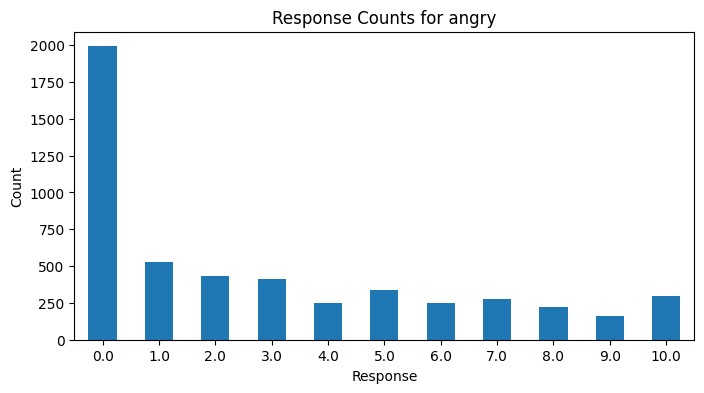

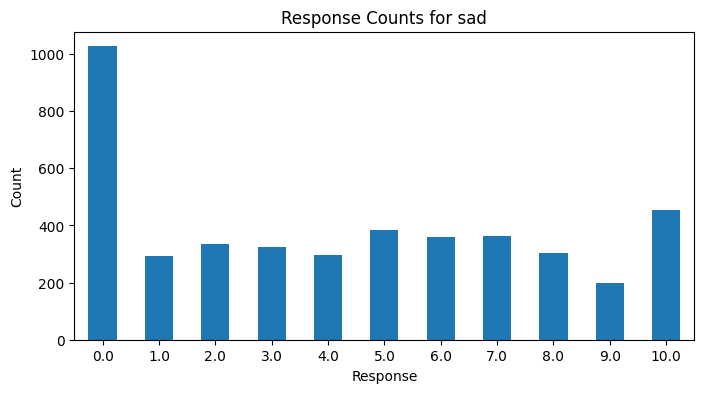

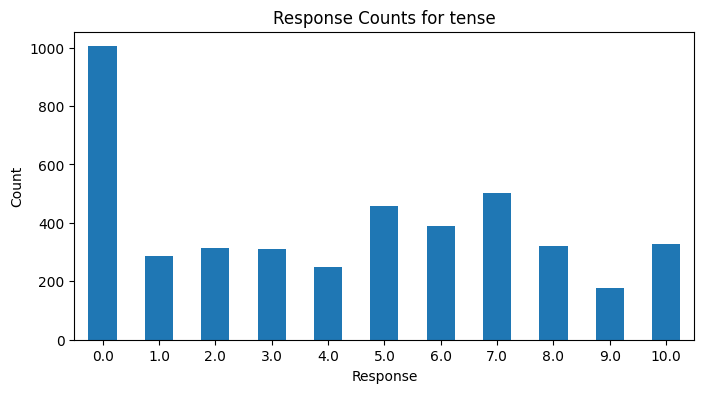

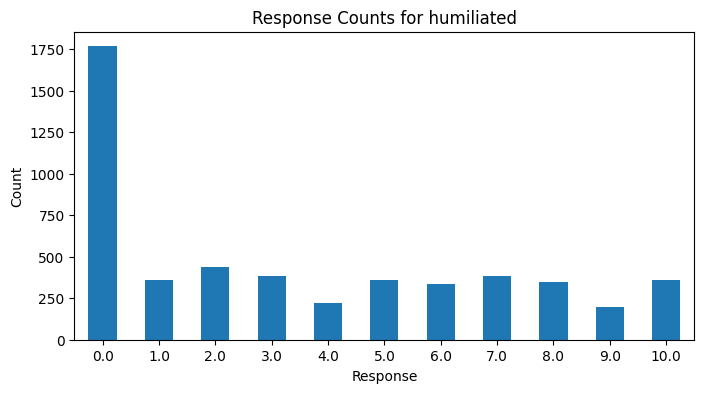

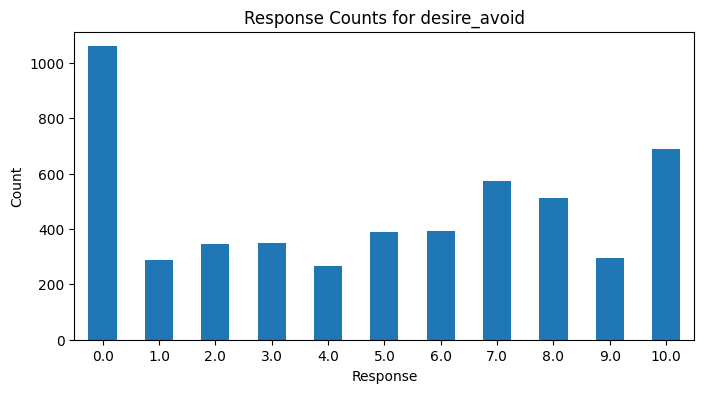

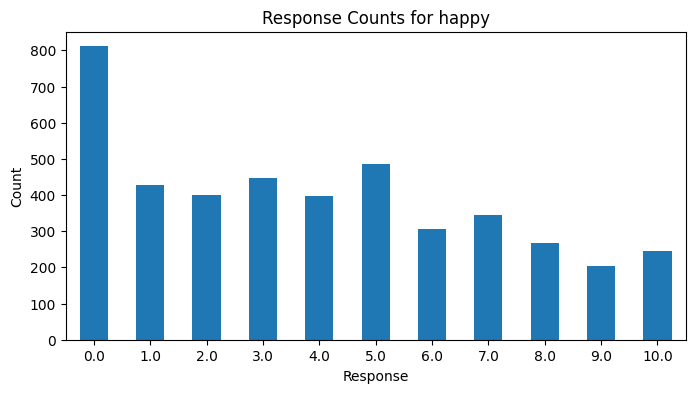

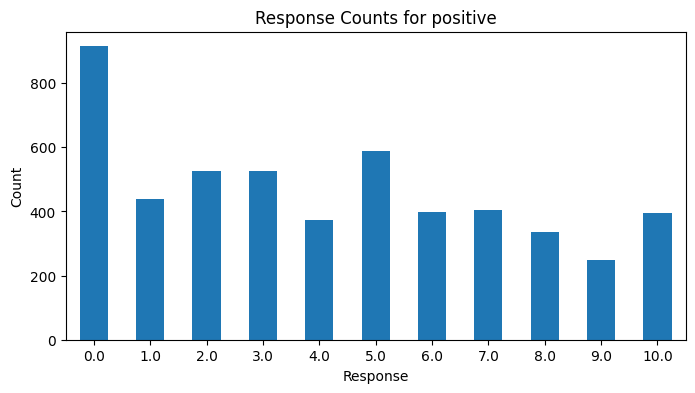

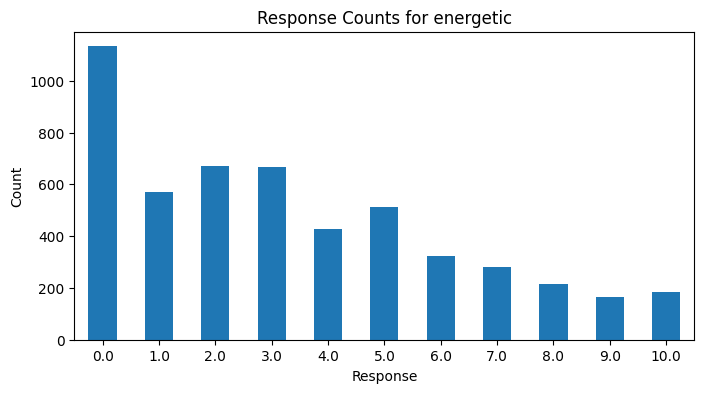

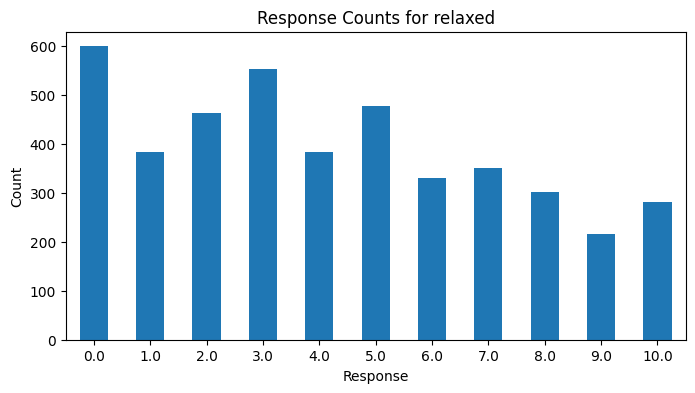

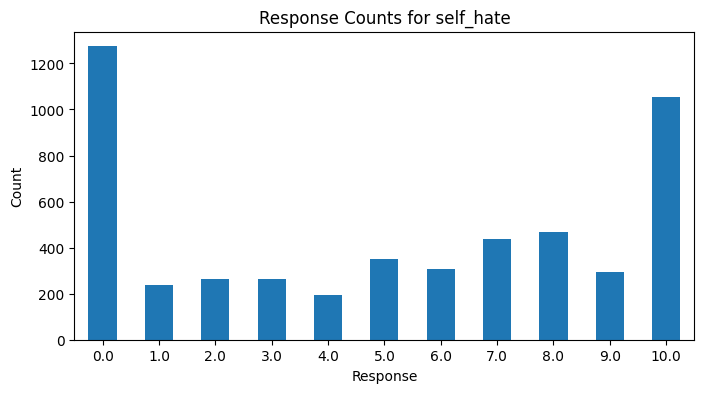

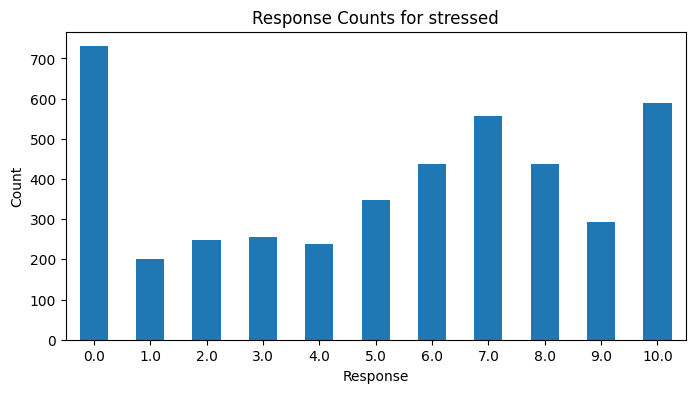

In [37]:
# Generate histograms for each column with emotional category data
for column in EMA_combined_EDA.iloc[:, 2:13].columns:
    plt.figure(figsize=(8, 4))
    EMA_combined_EDA[column].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Response Counts for {column}')
    plt.xlabel('Response')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show() 

### Impute missing data and group shuffle data for training (70%), validation (10%), and testing (20%)

In [38]:
# Define imputation functions for independent (X) variables
def impute_X_with_mean(df):
    """
    Impute missing values in independent variables (X) using the mean for each participant.
    """
    X = df.iloc[:, 17:47]
    X_imputed = df.groupby('ppt_id')[X.columns].transform(lambda col: col.fillna(col.mean()))
    df.iloc[:, 17:47] = X_imputed
    return df

def impute_Y_across_participants(df, n_neighbors=5):
    """
    Impute missing values in dependent variables (Y) using KNN regression across participants.
    """
    # Impute missing values in X using the mean
    df = impute_X_with_mean(df)

    # Scale independent variables (X)
    X = df.iloc[:, 17:47].values
    scaler_X = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)

    # Replace NAType with np.nan and convert to float for dependent variables (Y)
    y = df.iloc[:, 2:13].replace({pd.NA: np.nan}).values.astype(float)
    
    # Impute missing values in Y using KNN regression
    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)
    for col in range(y.shape[1]):
        valid_train_indices = ~np.isnan(y[:, col])
        if valid_train_indices.sum() > 1:
            knn_regressor.fit(X_scaled[valid_train_indices], y[valid_train_indices, col])
            missing_indices = np.isnan(y[:, col])
            if missing_indices.any():
                y[missing_indices, col] = knn_regressor.predict(X_scaled[missing_indices])

    # Update DataFrame with imputed Y values
    df.iloc[:, 2:13] = y

    return df

# Encode NaN values consistently
EMA_EDA_2P = EMA_EDA_2P.applymap(lambda x: np.nan if pd.isna(x) else x)

# Impute X using mean imputation
EMA_EDA_2P = impute_X_with_mean(EMA_EDA_2P)

# Impute Y using KNN regression
EMA_EDA_2P = impute_Y_across_participants(EMA_EDA_2P, n_neighbors=5)

# Reset index to align with scikit-learn splits
EMA_EDA_2P = EMA_EDA_2P.reset_index(drop=True)
X = EMA_EDA_2P.iloc[:, 17:47].copy()  # Features
y = EMA_EDA_2P.iloc[:, 2:13].copy()   # Subjective report ratings
groups = EMA_EDA_2P['ppt_id']        # Participant IDs for grouping

# First split: 80% (train+val), 20% test
gss_1 = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=710)
train_val_indices, test_indices = next(gss_1.split(X, groups=groups))

X_train_val = X.iloc[train_val_indices]
X_test      = X.iloc[test_indices]
y_train_val = y.iloc[train_val_indices]
y_test      = y.iloc[test_indices]

# Second split on train_val: 87.5% (train), 12.5% (val) corresponds to 70/10 overall from the full dataset
gss_2 = GroupShuffleSplit(n_splits=1, test_size=0.125, random_state=710)
sub_train_indices, sub_val_indices = next(gss_2.split(
    X_train_val, 
    groups=groups.iloc[train_val_indices]
))

X_train = X_train_val.iloc[sub_train_indices]
X_val   = X_train_val.iloc[sub_val_indices]
y_train = y_train_val.iloc[sub_train_indices]
y_val   = y_train_val.iloc[sub_val_indices]

# Convert X/y back into DataFrames with named columns
X_train = pd.DataFrame(X_train, columns=EMA_EDA_2P.columns[17:47])
X_val   = pd.DataFrame(X_val,   columns=EMA_EDA_2P.columns[17:47])
X_test  = pd.DataFrame(X_test,  columns=EMA_EDA_2P.columns[17:47])

y_train = pd.DataFrame(y_train, columns=EMA_EDA_2P.columns[2:13])
y_val   = pd.DataFrame(y_val,   columns=EMA_EDA_2P.columns[2:13])
y_test  = pd.DataFrame(y_test,  columns=EMA_EDA_2P.columns[2:13])

# Combine train+val for linear models
X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)

# Training Machine Learning Models

### Linear regression

Model Evaluation Metrics:
          Emotion  Mean Squared Error  R^2 Score
0          angry           14.748334  -0.176686
1            sad           10.685996  -0.115890
2          tense            8.950058  -0.127074
3     humiliated           15.700900  -0.130243
4   desire_avoid           12.887901  -0.124200
5          happy            9.223601  -0.357674
6       positive           10.428347  -0.337011
7      energetic            7.385265   0.003978
8        relaxed            9.921668  -0.507171
9      self_hate           14.203094  -0.037257
10      stressed            9.447202  -0.218325

Feature Importances by Emotion:
                         angry           sad         tense    humiliated  \
GSR_avimp        1.001932e+01  1.420521e+01  1.412263e+01  1.028038e+01   
GSR_nimp         1.745957e-02  4.526427e-02  2.789463e-02  8.251152e-03   
GSR_maximp      -1.381414e-01 -1.937837e-01 -1.900454e-01  4.715055e-02   
GSR_mav         -9.911350e+00 -1.408138e+01 -1.402668e+01 -1.02

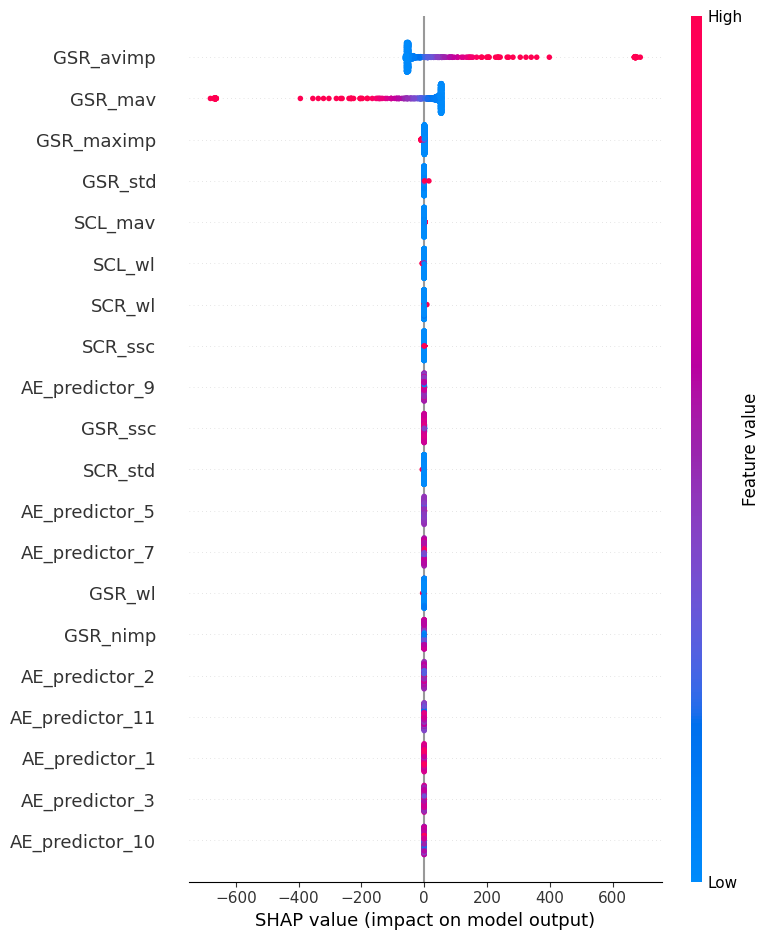


SHAP Summary Plot for Emotion: sad


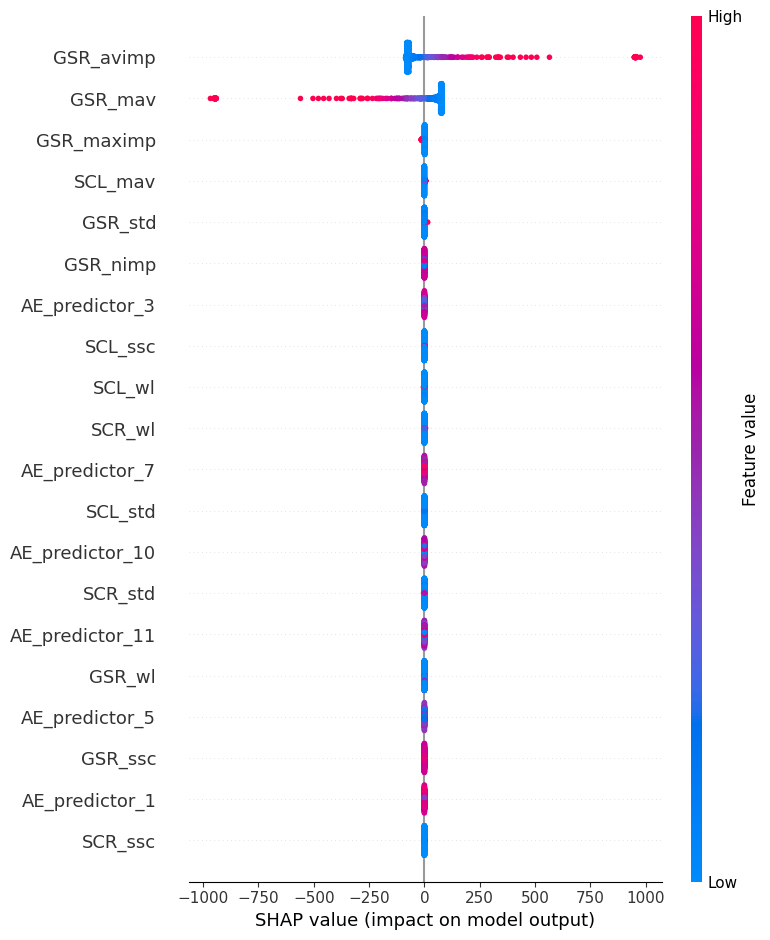


SHAP Summary Plot for Emotion: tense


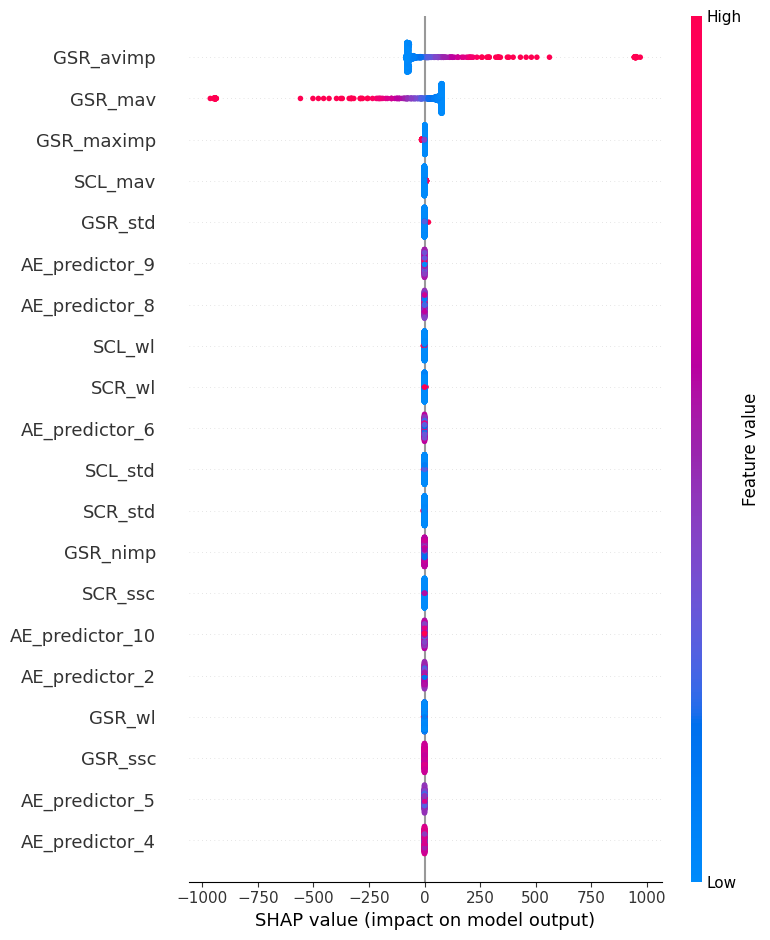


SHAP Summary Plot for Emotion: humiliated


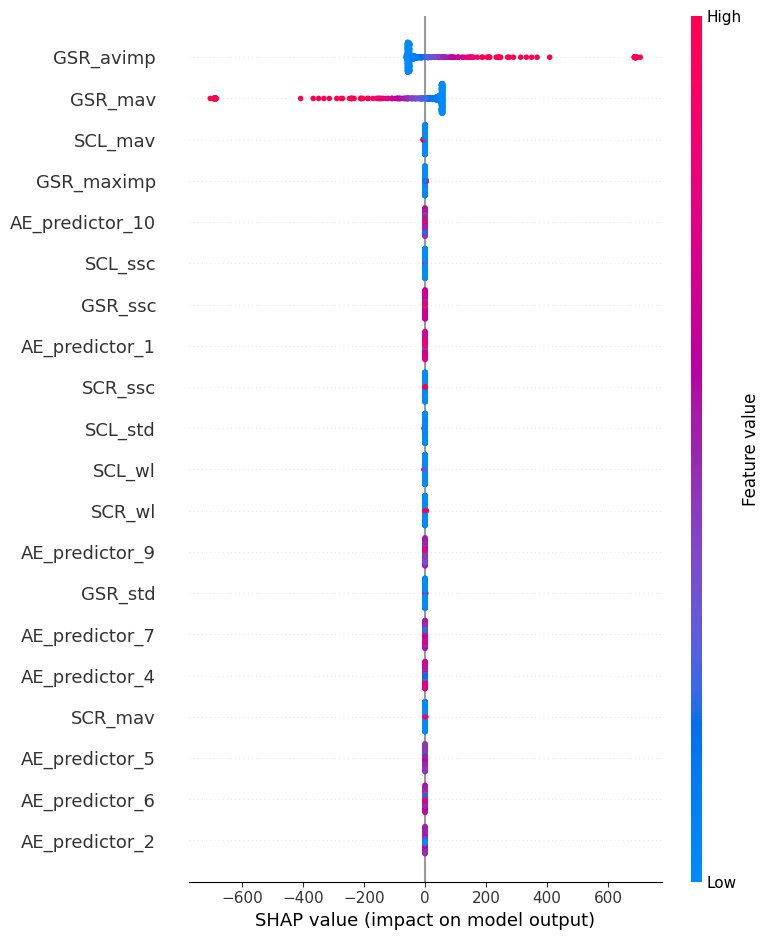


SHAP Summary Plot for Emotion: desire_avoid


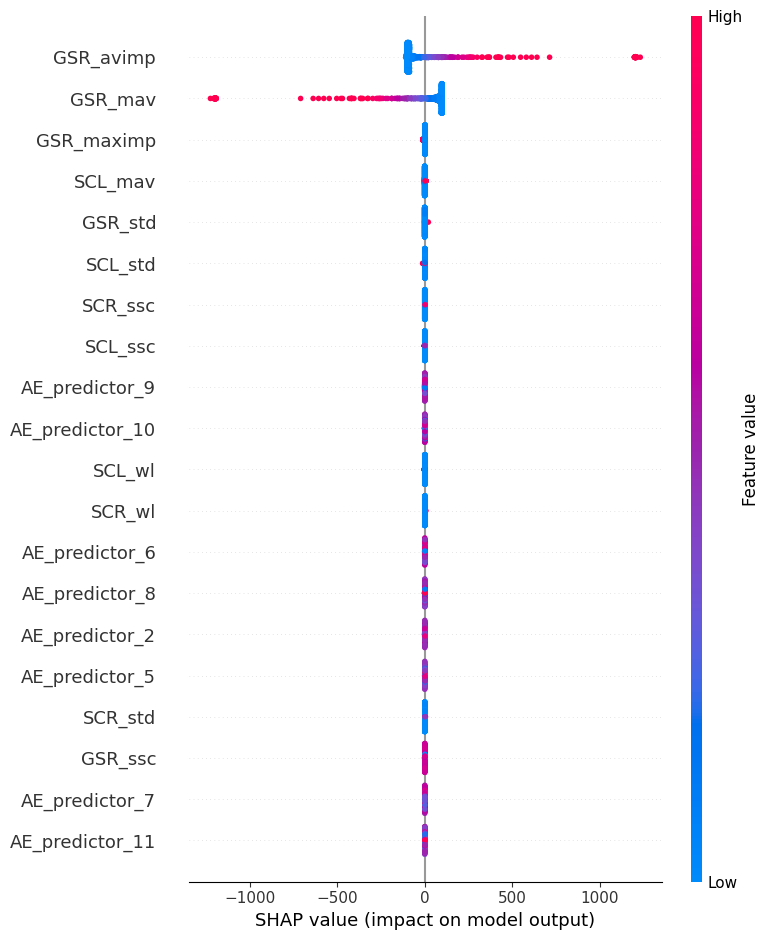


SHAP Summary Plot for Emotion: happy


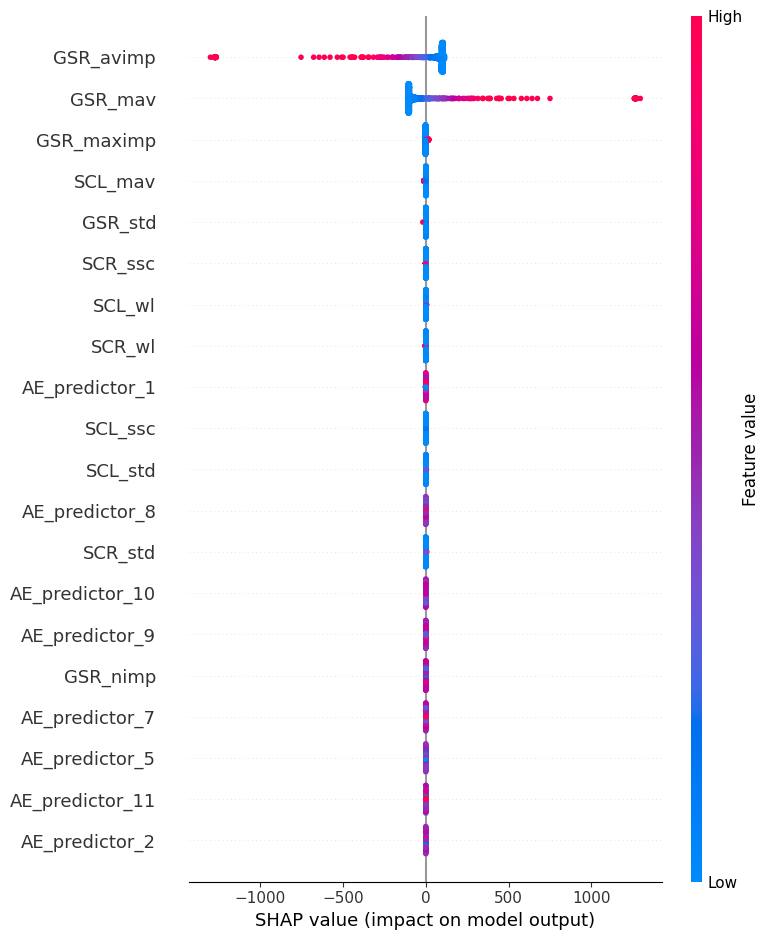


SHAP Summary Plot for Emotion: positive


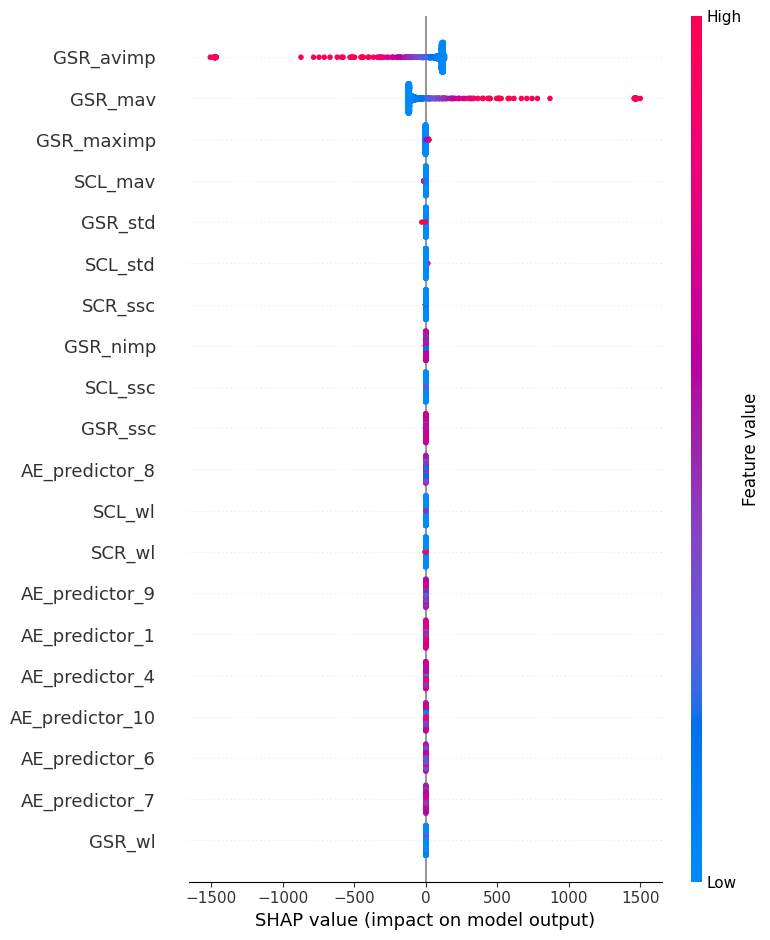


SHAP Summary Plot for Emotion: energetic


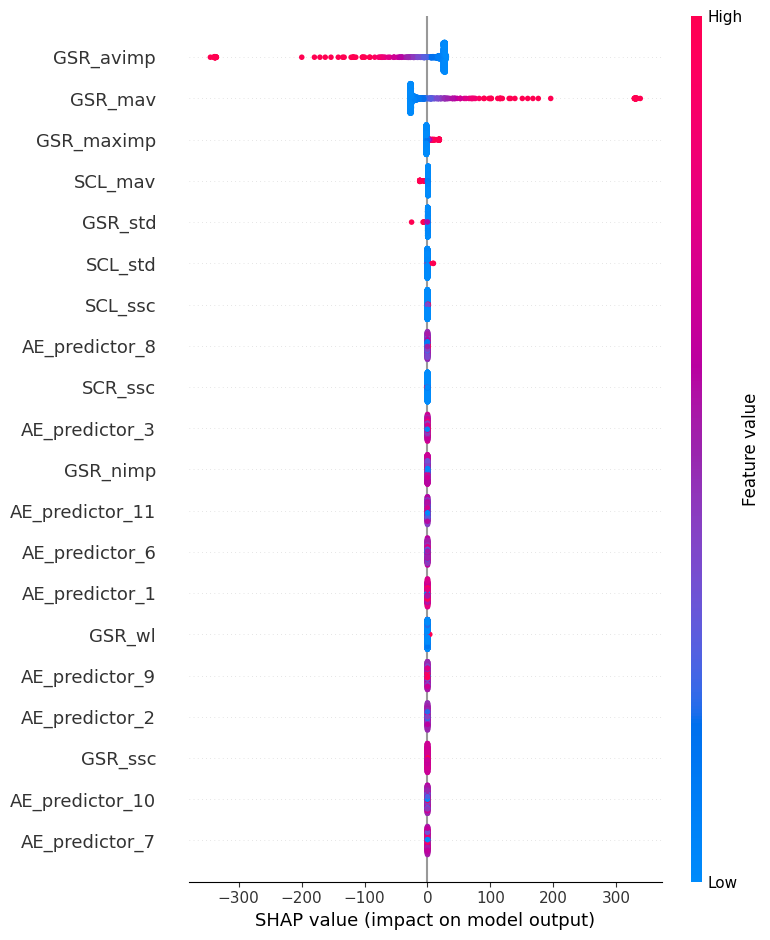


SHAP Summary Plot for Emotion: relaxed


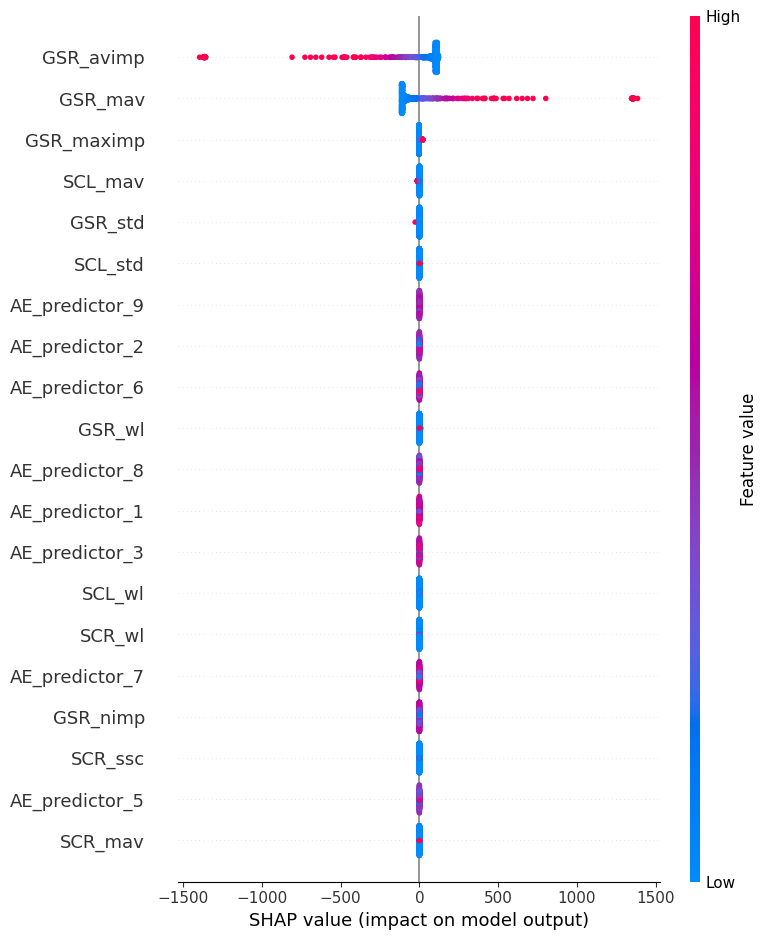


SHAP Summary Plot for Emotion: self_hate


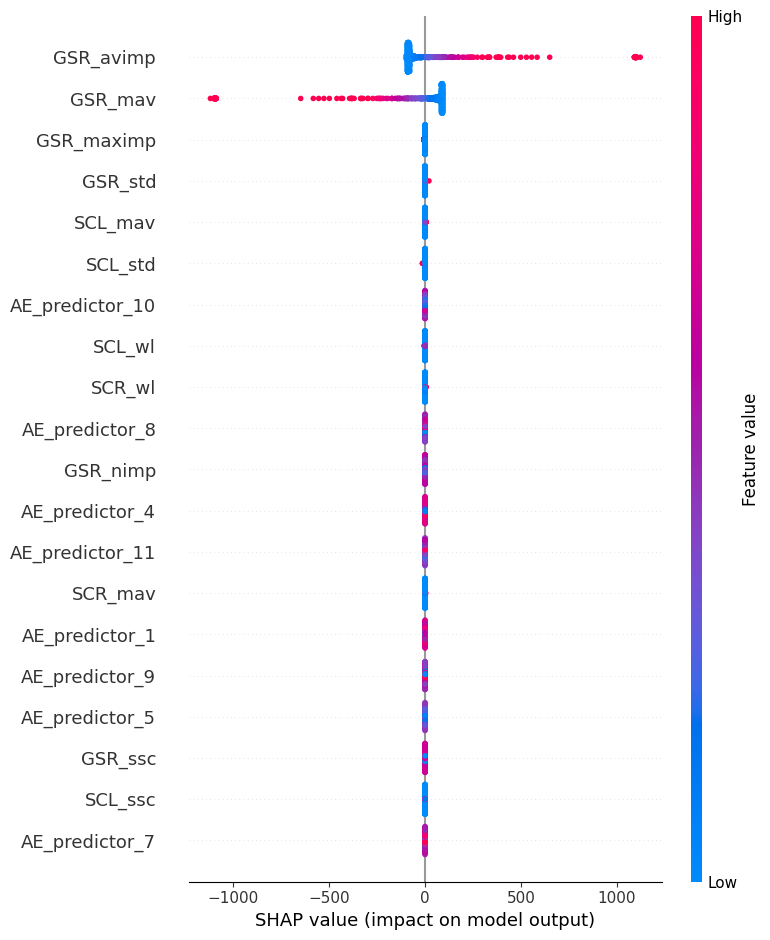


SHAP Summary Plot for Emotion: stressed


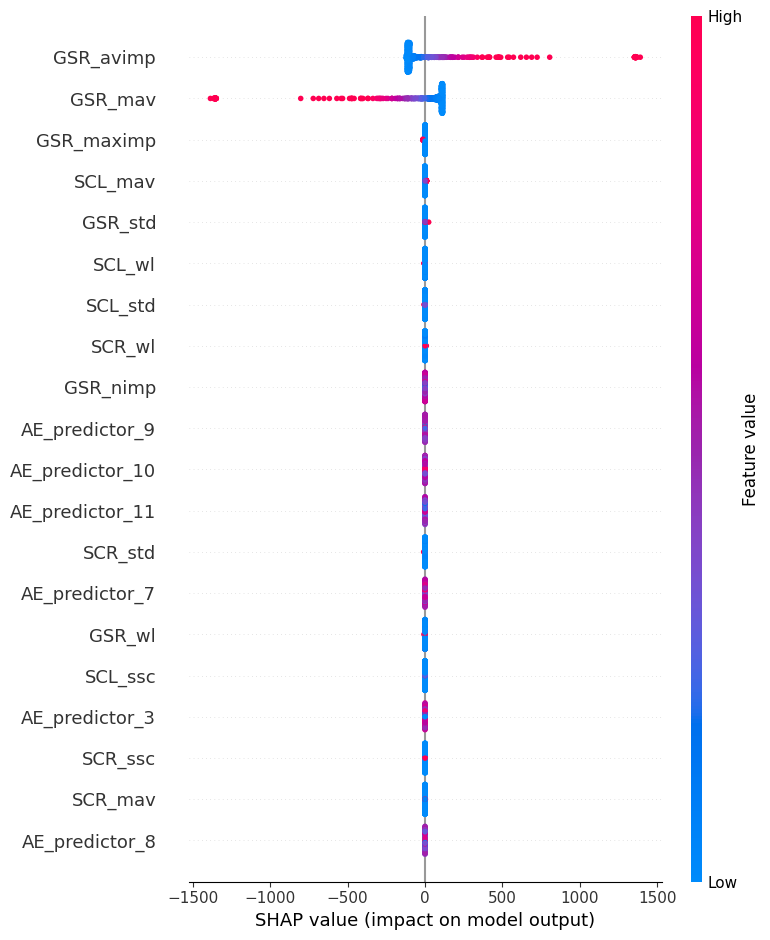

<AxesSubplot:>

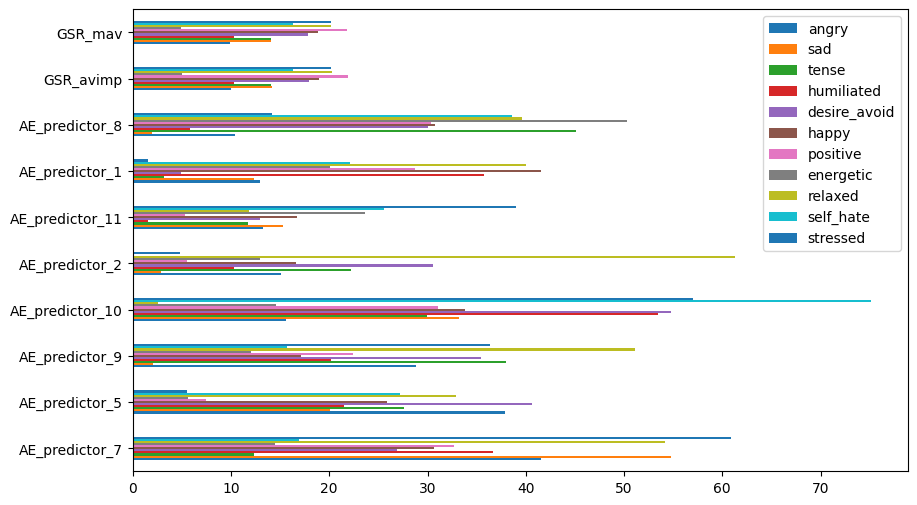

In [39]:
# Initialize dictionaries to store models, metrics, and SHAP values
emotion_models = {}
metrics = {'Emotion': [], 'Mean Squared Error': [], 'R^2 Score': []}
feature_importances = pd.DataFrame(index=X.columns)
shap_values_dict = {}

# Fit and evaluate models for each emotion
for emotion in y_train_val.columns:
    # Initialize a new Linear Regression model for each target
    model = LinearRegression()
    model.fit(X_train_val, y_train_val[emotion])
    emotion_models[emotion] = model
    
    # Hold-out predictions and evaluation metrics
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test[emotion], y_pred)
    r2 = r2_score(y_test[emotion], y_pred)

    # Store evaluation metrics
    metrics['Emotion'].append(emotion)
    metrics['Mean Squared Error'].append(mse)
    metrics['R^2 Score'].append(r2)
    
    # Store feature importances (coefficients)
    feature_importances[emotion] = model.coef_
    
    # SHAP for feature interpretation
    explainer = shap.LinearExplainer(model, X_train_val)
    shap_values = explainer.shap_values(X_test)
    shap_values_dict[emotion] = shap_values  # Store SHAP values for each emotion

# Convert metrics dictionary to a DataFrame for easier viewing
metrics_df = pd.DataFrame(metrics)

# Display evaluation metrics and sorted feature importances
print("Model Evaluation Metrics:\n", metrics_df)
print("\nFeature Importances by Emotion:\n", feature_importances)

# Optionally, plot SHAP summary plots for feature importances
for emotion, shap_vals in shap_values_dict.items():
    print(f"\nSHAP Summary Plot for Emotion: {emotion}")
    shap.summary_plot(shap_vals, X_test, feature_names=X.columns)

# Optionally, plot top feature importances across emotions
feature_importances.abs().nlargest(10, feature_importances.columns).plot(kind='barh', figsize=(10, 6))

### Linear Regression with L1 penalization (LASSO)

Hyperparameter tuning for emotion: angry
Hyperparameter tuning for emotion: sad
Hyperparameter tuning for emotion: tense
Hyperparameter tuning for emotion: humiliated
Hyperparameter tuning for emotion: desire_avoid
Hyperparameter tuning for emotion: happy
Hyperparameter tuning for emotion: positive
Hyperparameter tuning for emotion: energetic
Hyperparameter tuning for emotion: relaxed
Hyperparameter tuning for emotion: self_hate
Hyperparameter tuning for emotion: stressed
Lasso Model Evaluation Metrics:
          Emotion  Mean Squared Error  R^2 Score  Best Alpha
0          angry           14.265332  -0.137598    0.268270
1            sad            9.597785  -0.027173    0.152642
2          tense            7.956554  -0.018192    0.222300
3     humiliated           15.215406  -0.094802    0.222300
4   desire_avoid           11.930764  -0.040619    0.268270
5          happy            6.820332  -0.012225    0.323746
6       positive            7.788388  -0.000192    0.390694
7      ene

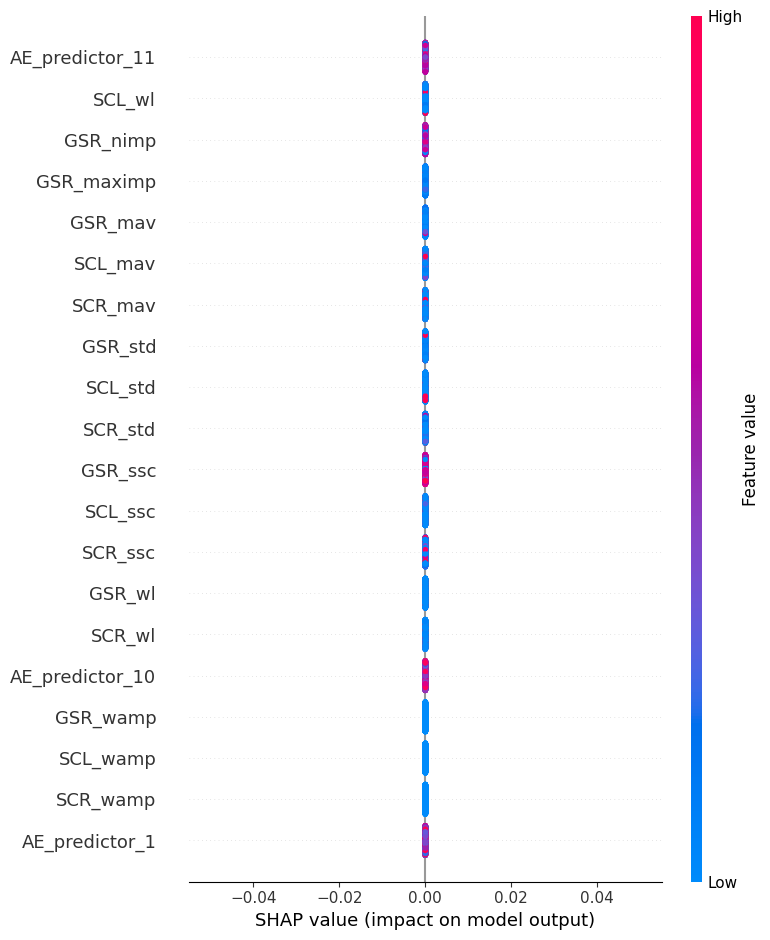


SHAP Summary Plot for Emotion: sad


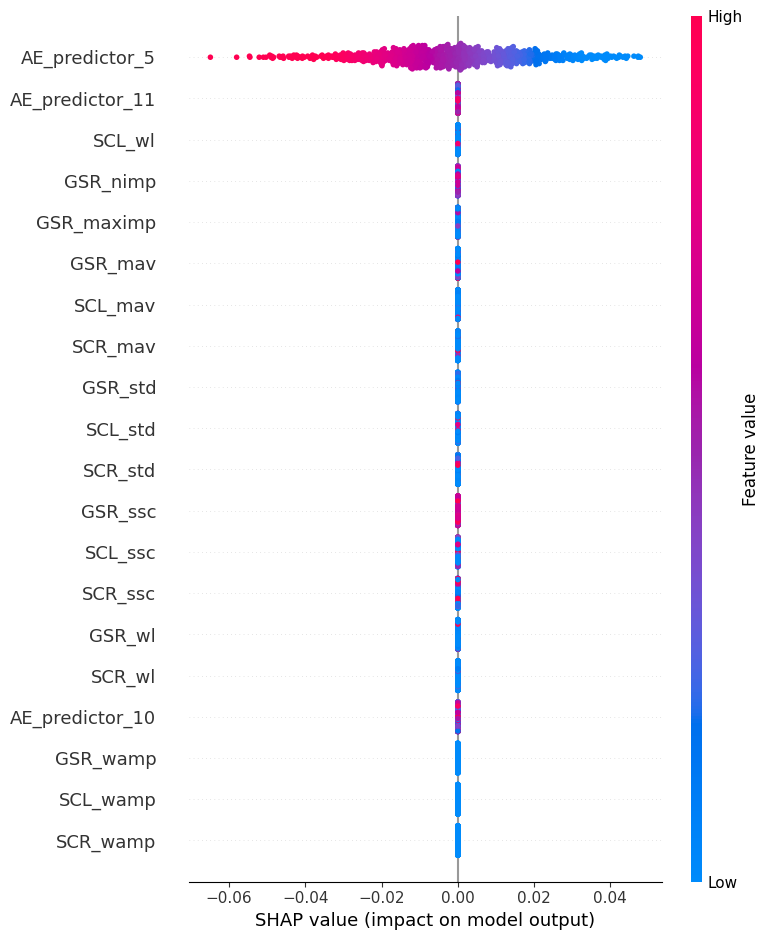


SHAP Summary Plot for Emotion: tense


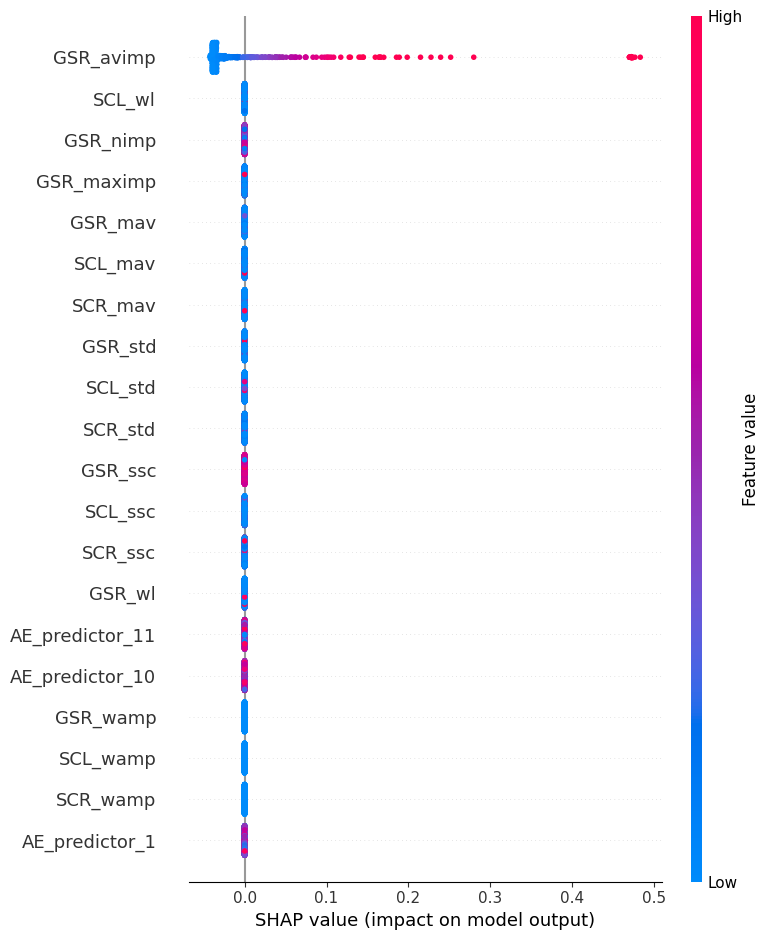


SHAP Summary Plot for Emotion: humiliated


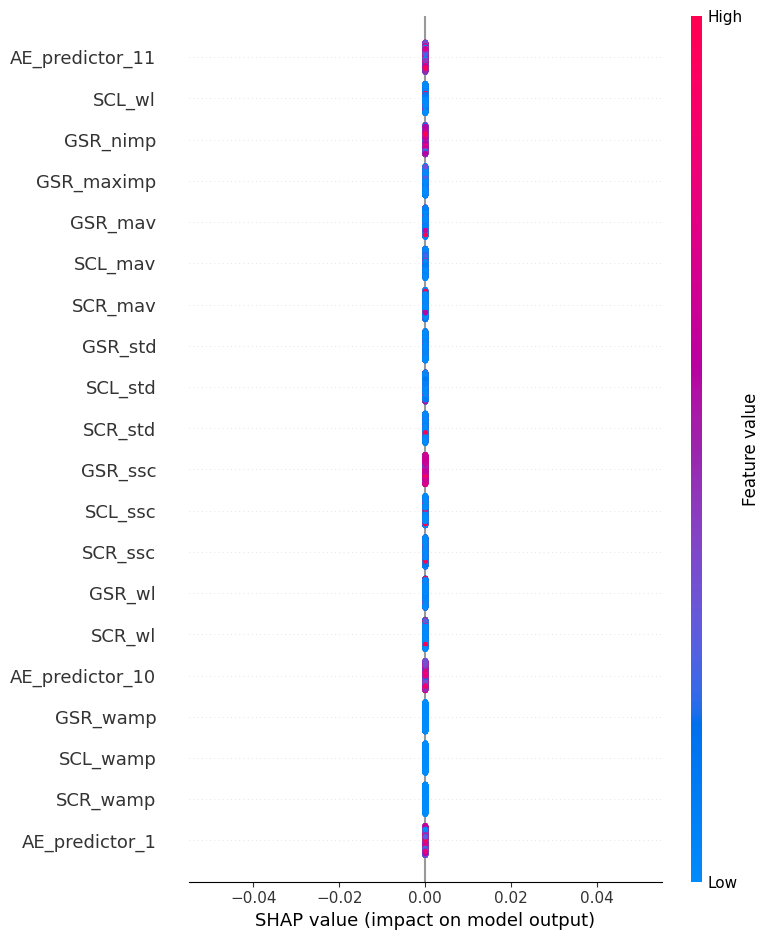


SHAP Summary Plot for Emotion: desire_avoid


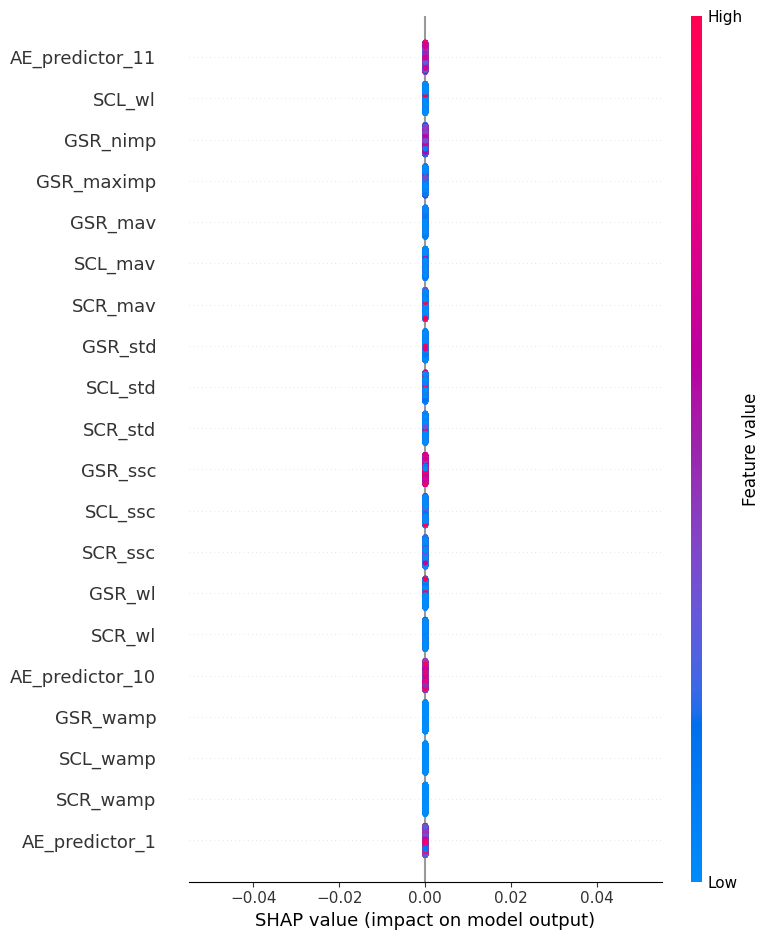


SHAP Summary Plot for Emotion: happy


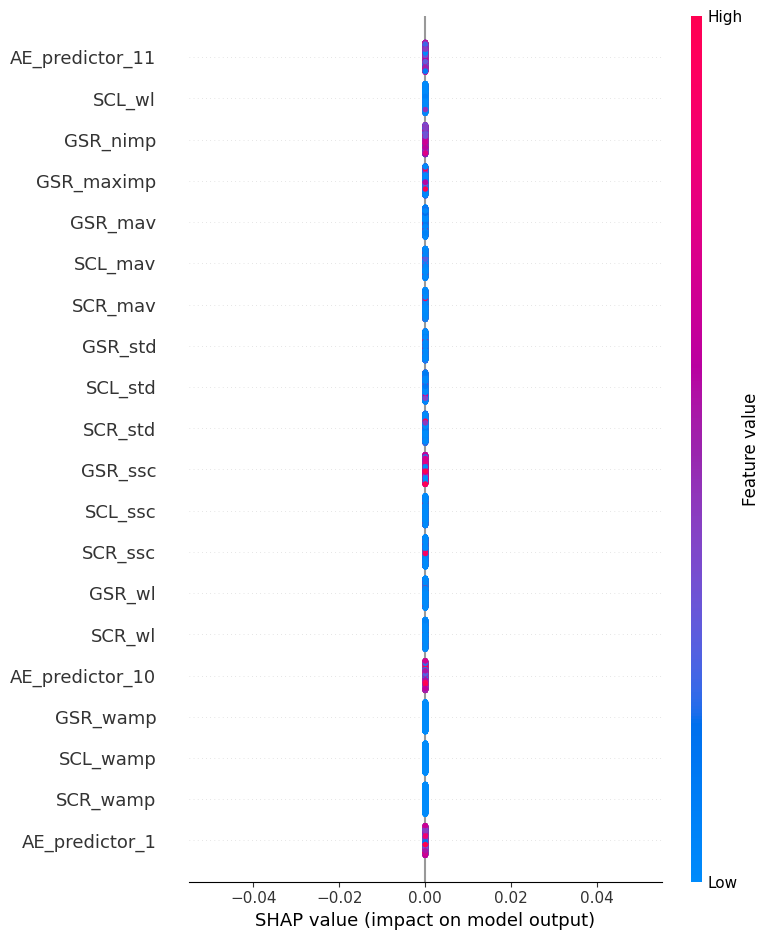


SHAP Summary Plot for Emotion: positive


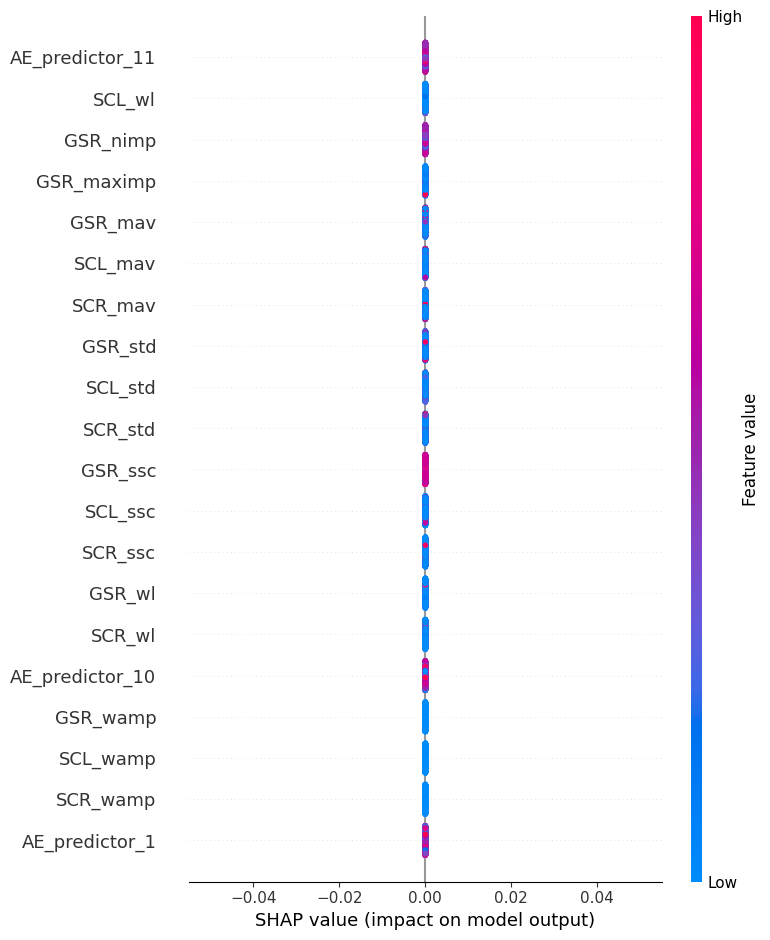


SHAP Summary Plot for Emotion: energetic


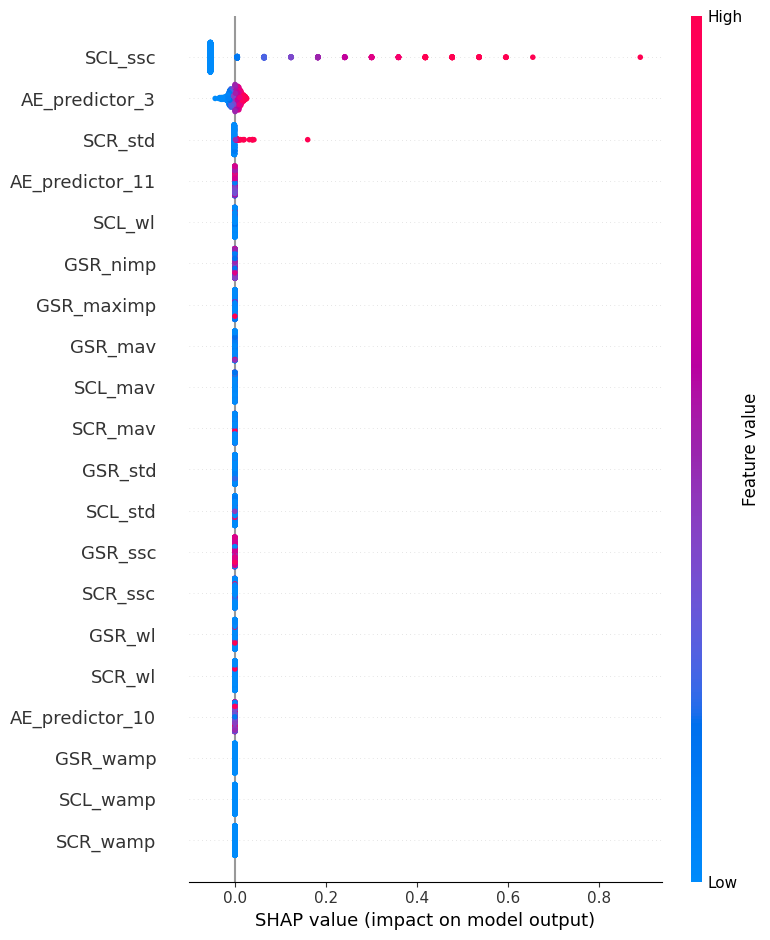


SHAP Summary Plot for Emotion: relaxed


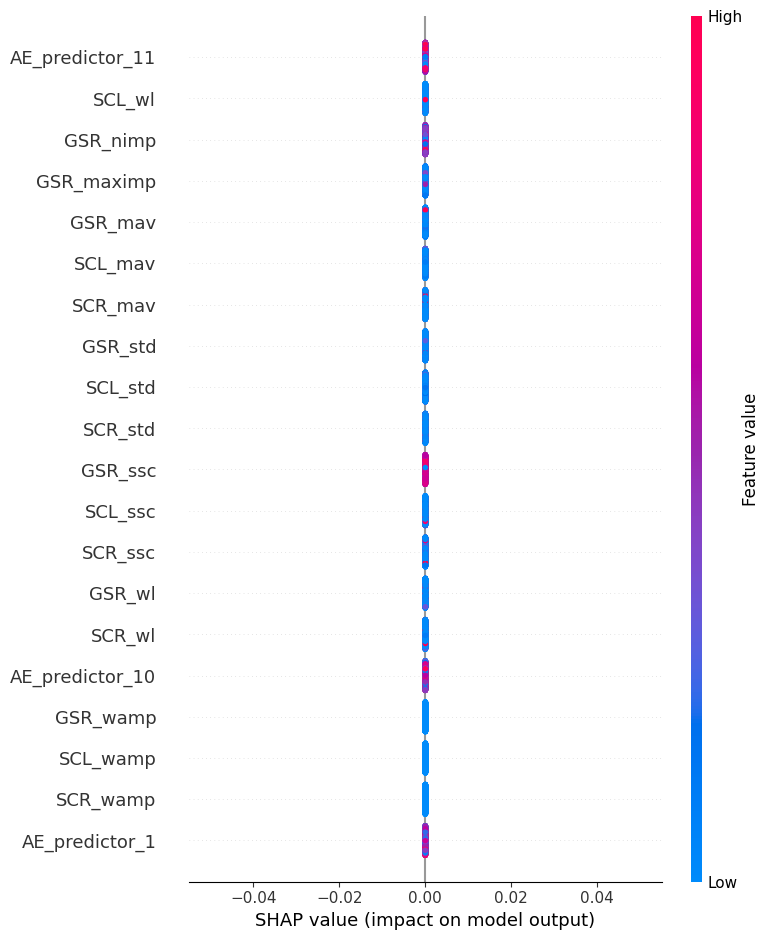


SHAP Summary Plot for Emotion: self_hate


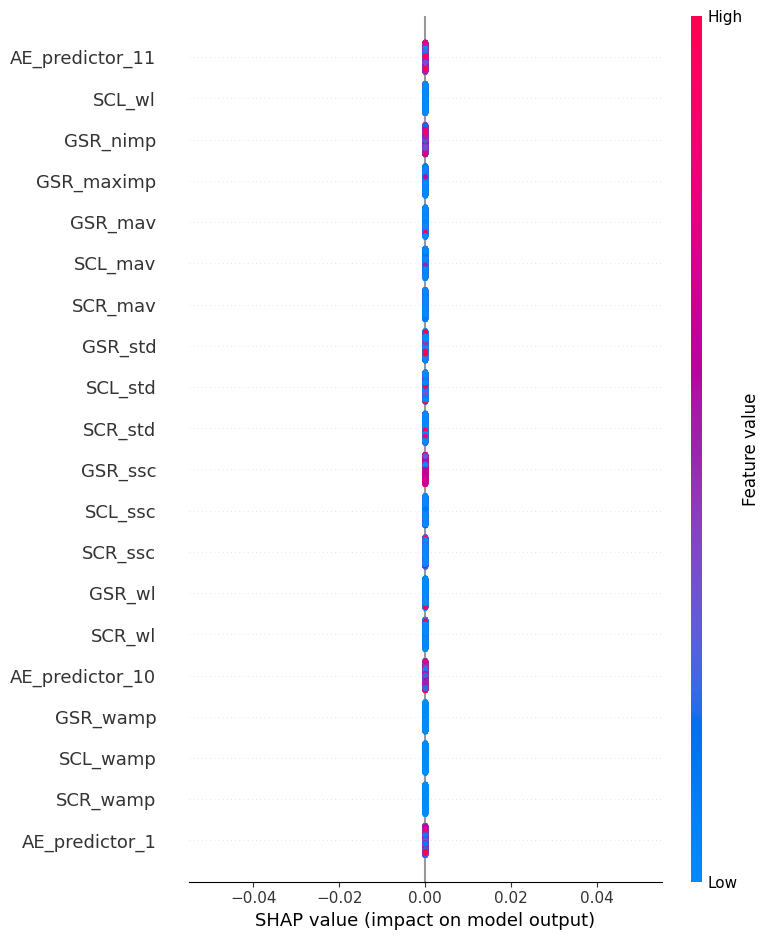


SHAP Summary Plot for Emotion: stressed


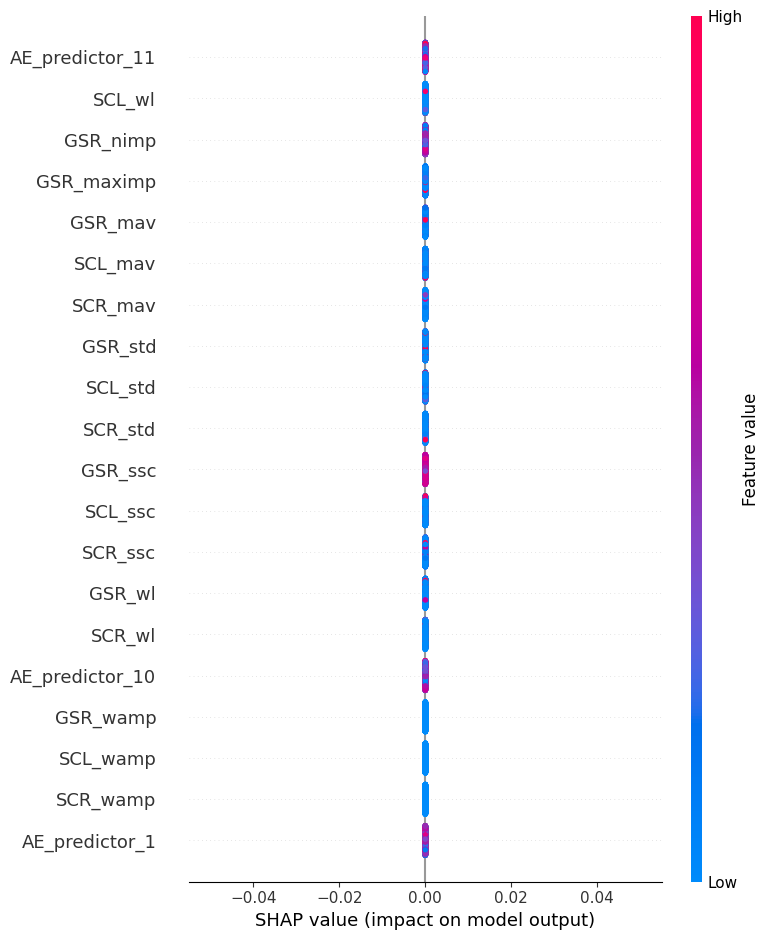

<AxesSubplot:>

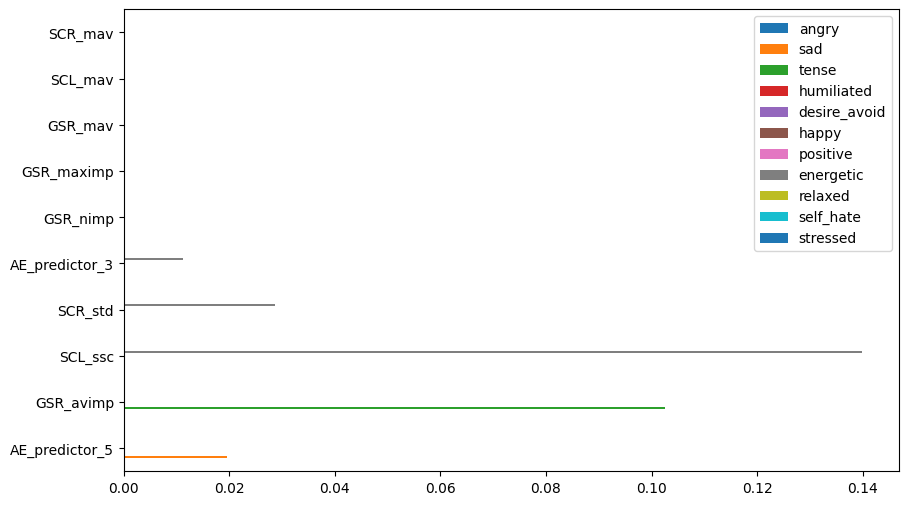

In [40]:
# Standardize the features for Lasso regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_val)
X_test_scaled = scaler.transform(X_test)

# Define range of variables considered for hyperparameter tuning
alpha_search = {'alpha': np.logspace(-4, 0, 50)}  # 50 alpha values from 0.0001 to 1

# Initialize dictionaries to store Lasso models, metrics, and SHAP values
lasso_models = {}
lasso_metrics = {'Emotion': [], 'Mean Squared Error': [], 'R^2 Score': [], 'Best Alpha': []}
lasso_feature_importances = pd.DataFrame(index=X.columns)
shap_values_dict = {}

# Ignore all warnings (for aesthetics)
warnings.filterwarnings("ignore")

# Fit separate Lasso models and evaluate each emotion
for emotion in y_train.columns:
    print(f"Hyperparameter tuning for emotion: {emotion}")

    # Hyperparameter tuning with GridSearchCV
    lasso = Lasso(max_iter=1000) 
    grid_search = GridSearchCV(
        estimator=lasso,
        param_grid=alpha_search,
        scoring='neg_mean_squared_error',
        cv=3 # 3 fold cross-validation 
    )
    grid_search.fit(X_train_scaled, y_train_val[emotion])
    
    # Retrieve the best model and alpha value
    best_alpha = grid_search.best_params_['alpha']
    best_model = grid_search.best_estimator_
    lasso_models[emotion] = best_model
    
    # Predict and evaluate on the test set
    y_pred = best_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test[emotion], y_pred)
    r2 = r2_score(y_test[emotion], y_pred)
    
    # Store evaluation metrics
    lasso_metrics['Emotion'].append(emotion)
    lasso_metrics['Best Alpha'].append(best_alpha)
    lasso_metrics['Mean Squared Error'].append(mse)
    lasso_metrics['R^2 Score'].append(r2)
    
    # Store feature importances (coefficients)
    lasso_feature_importances[emotion] = best_model.coef_
    
    # SHAP for feature interpretation
    explainer = shap.LinearExplainer(best_model, X_train_scaled)
    shap_values = explainer.shap_values(X_test_scaled)
    shap_values_dict[emotion] = shap_values  # Store SHAP values for each emotion

# Convert metrics dictionary to a DataFrame for easier viewing
lasso_metrics_df = pd.DataFrame(lasso_metrics)

# Display evaluation metrics and sorted feature importances
print("Lasso Model Evaluation Metrics:\n", lasso_metrics_df)
print("\nFeature Importances by Emotion (Lasso Coefficients):\n", lasso_feature_importances)

# Plot SHAP summary plots for feature importance
for emotion, shap_vals in shap_values_dict.items():
    print(f"\nSHAP Summary Plot for Emotion: {emotion}")
    shap.summary_plot(shap_vals, X_test_scaled, feature_names=X.columns)

# Plot most important features across emotions
lasso_feature_importances.abs().nlargest(10, lasso_feature_importances.columns).plot(kind='barh', figsize=(10, 6))

### Random Forest

Processing emotion: angry
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.8s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.8s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   2.8s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=5, min

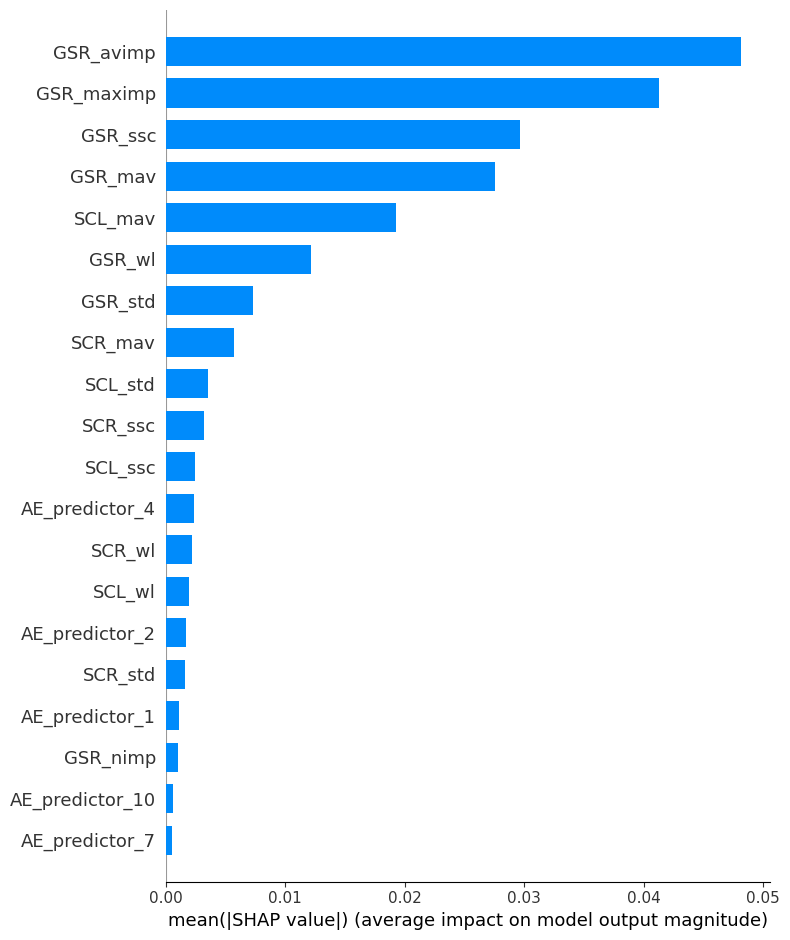


SHAP Summary Plot for Emotion: sad


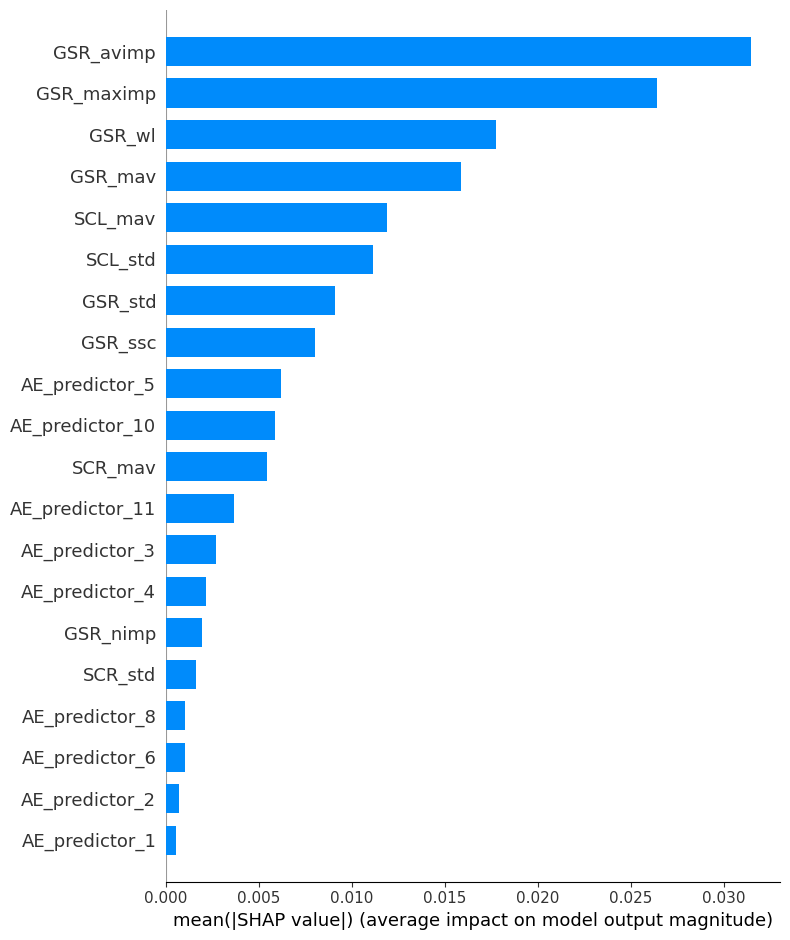


SHAP Summary Plot for Emotion: tense


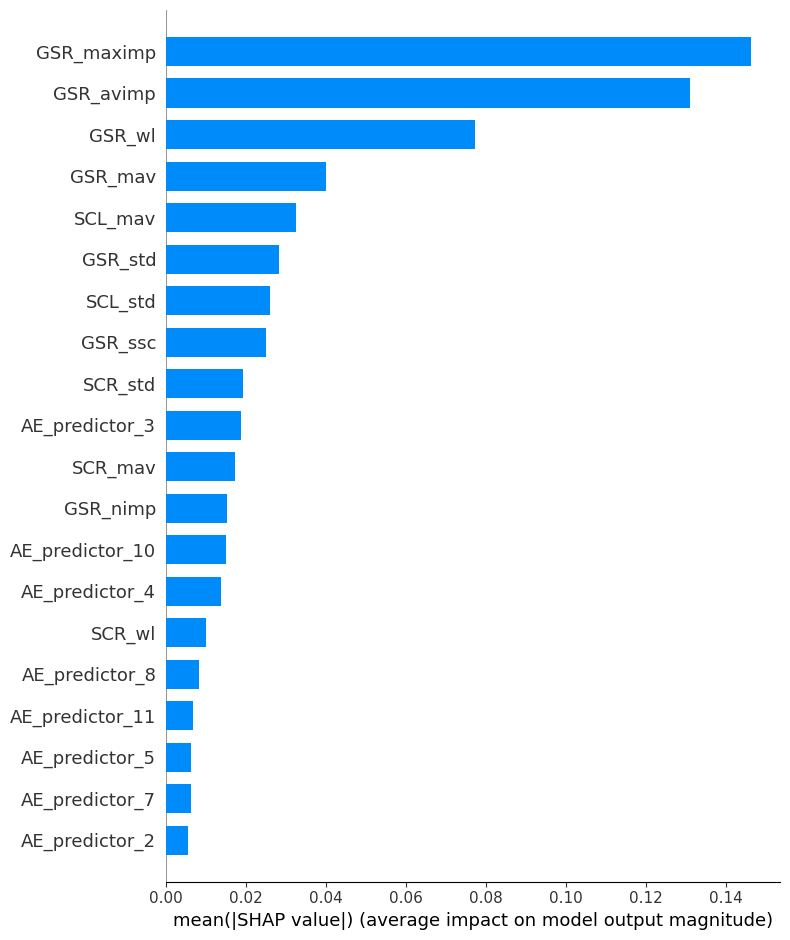


SHAP Summary Plot for Emotion: humiliated


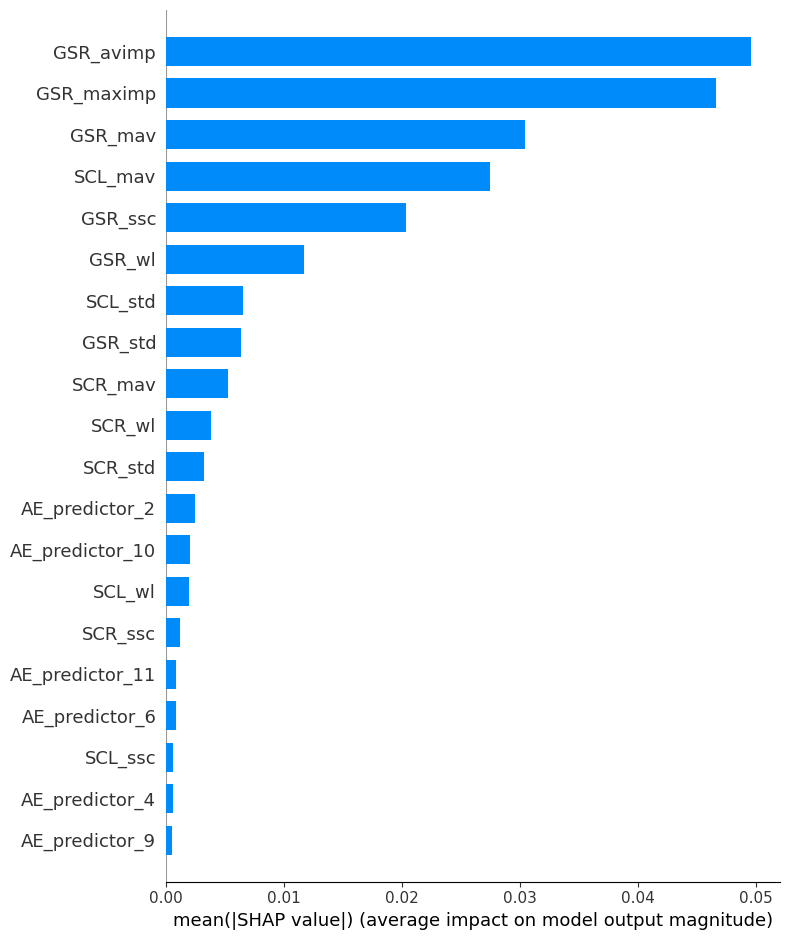


SHAP Summary Plot for Emotion: desire_avoid


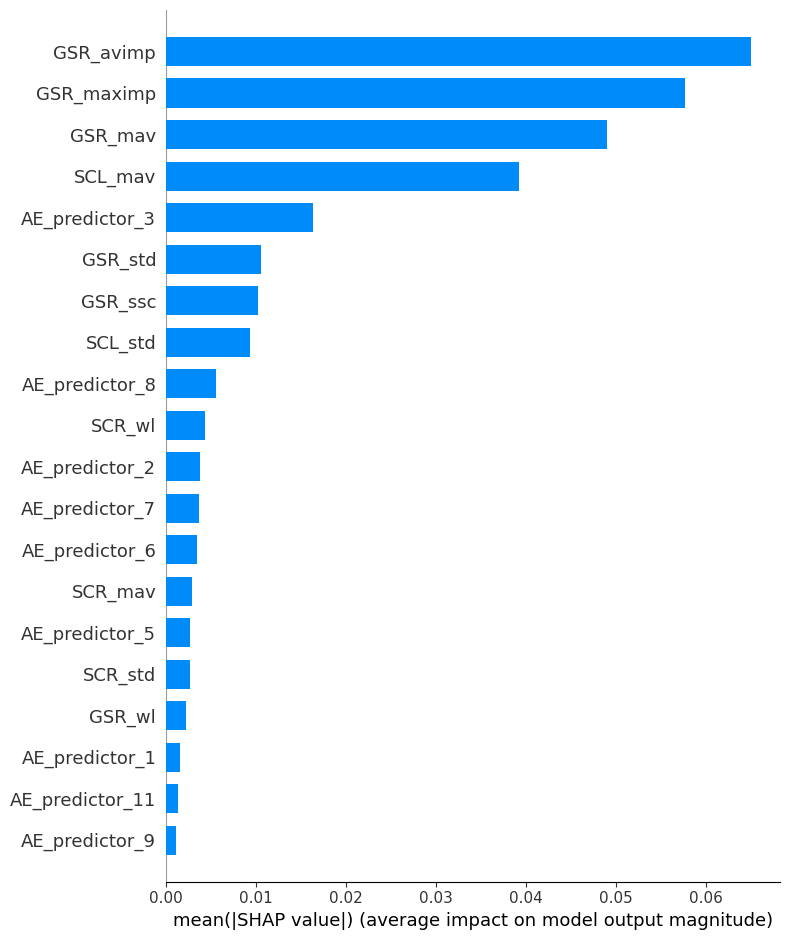


SHAP Summary Plot for Emotion: happy


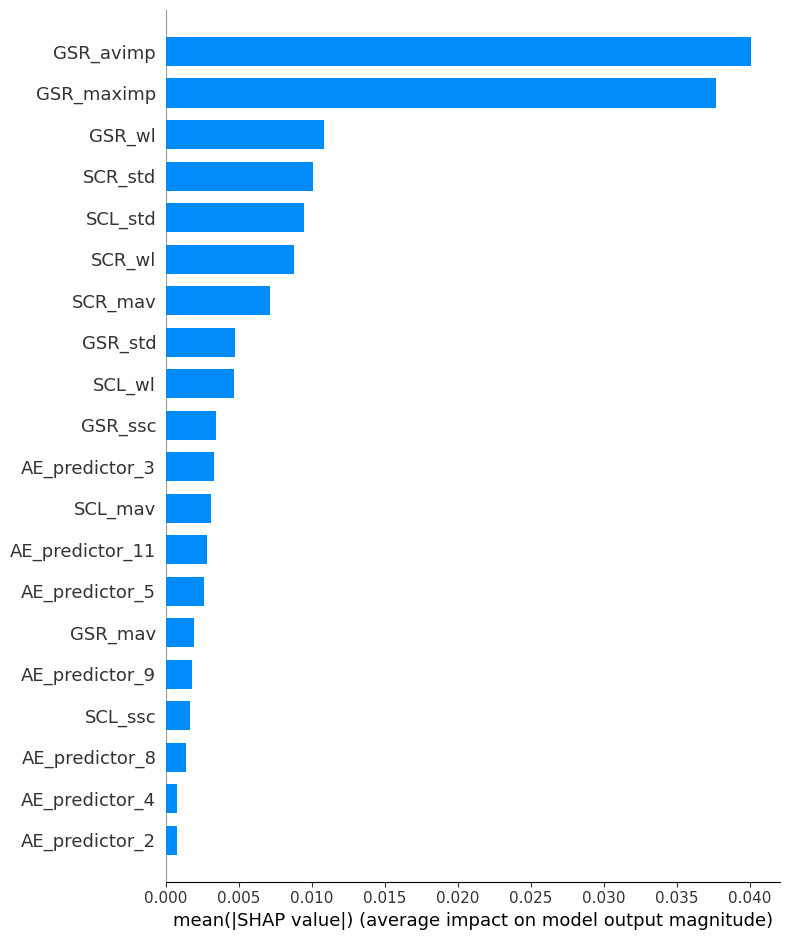


SHAP Summary Plot for Emotion: positive


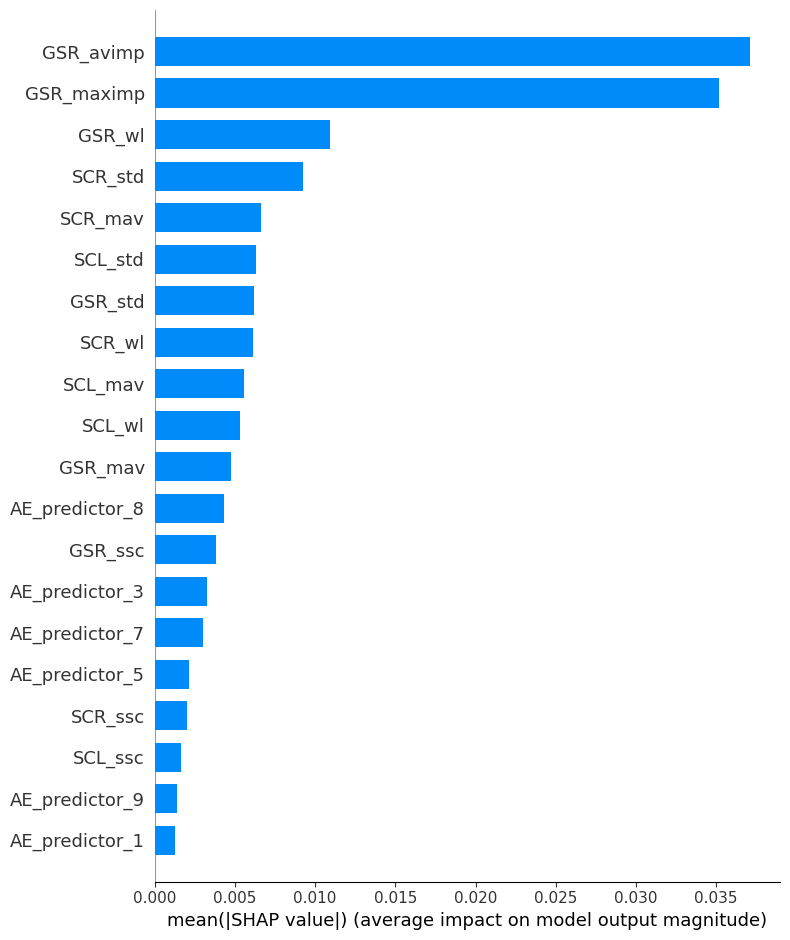


SHAP Summary Plot for Emotion: energetic


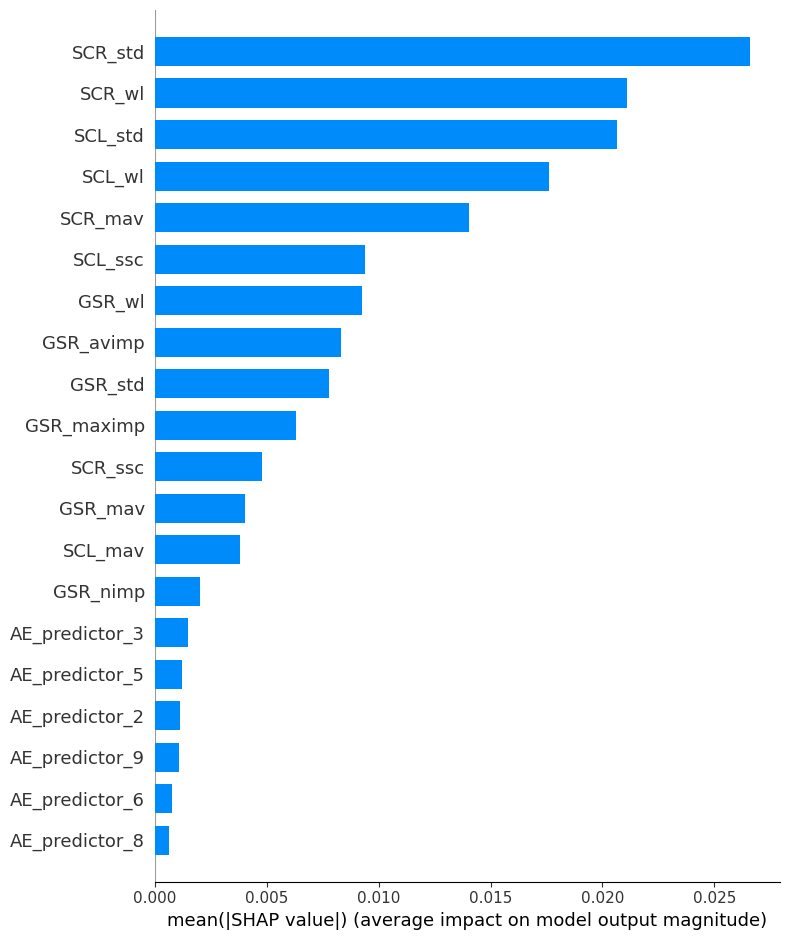


SHAP Summary Plot for Emotion: relaxed


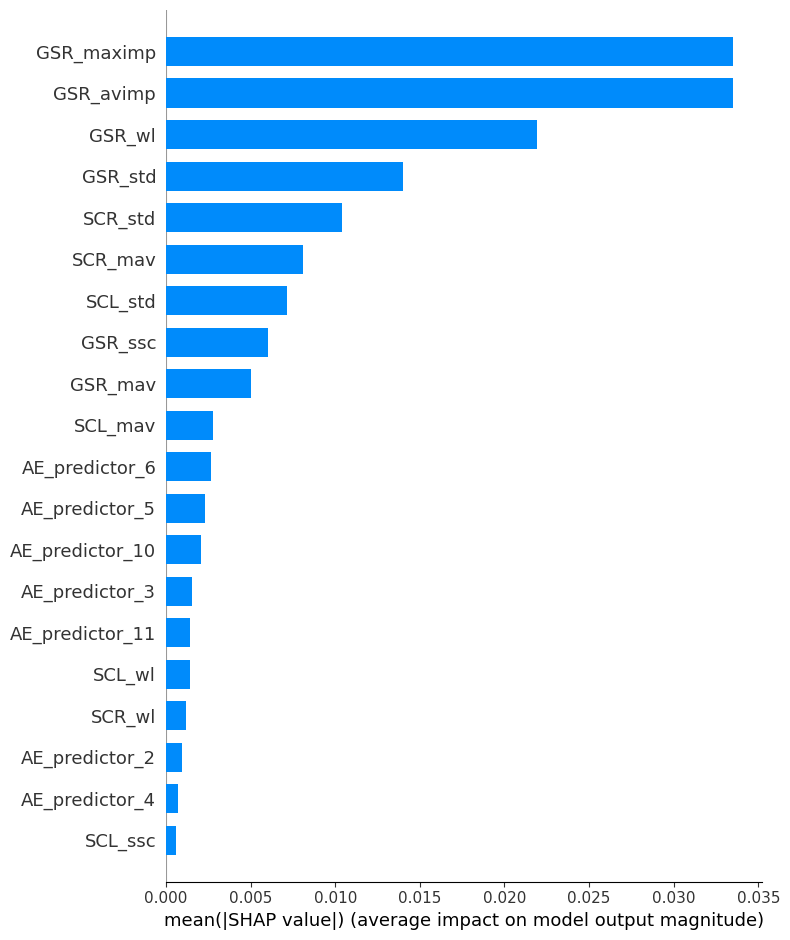


SHAP Summary Plot for Emotion: self_hate


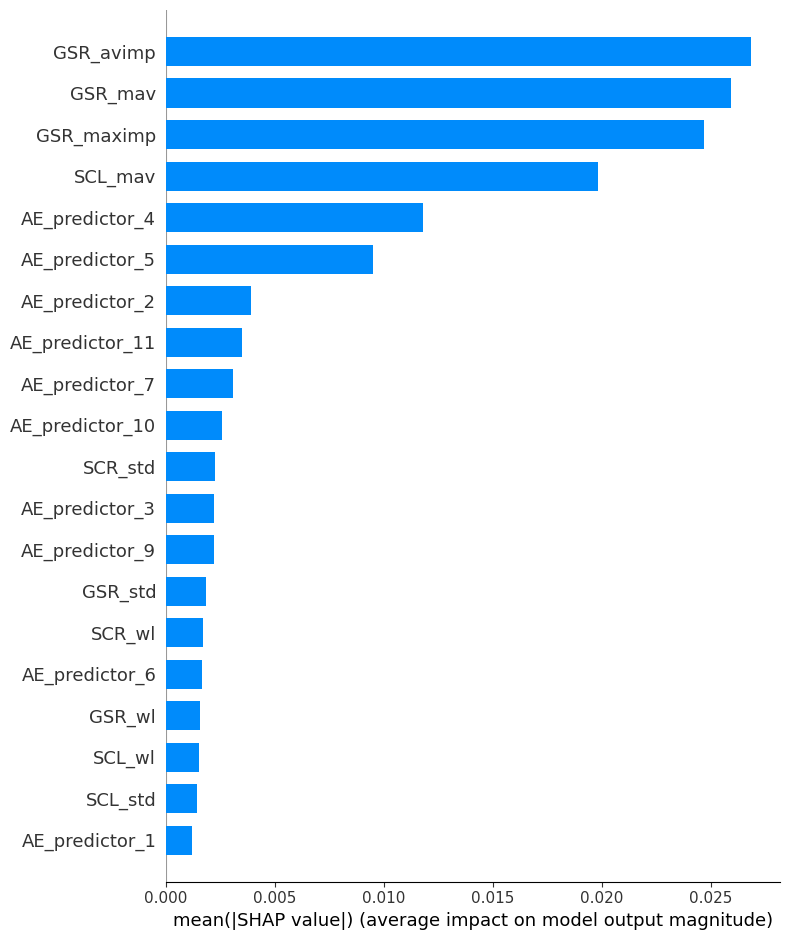


SHAP Summary Plot for Emotion: stressed


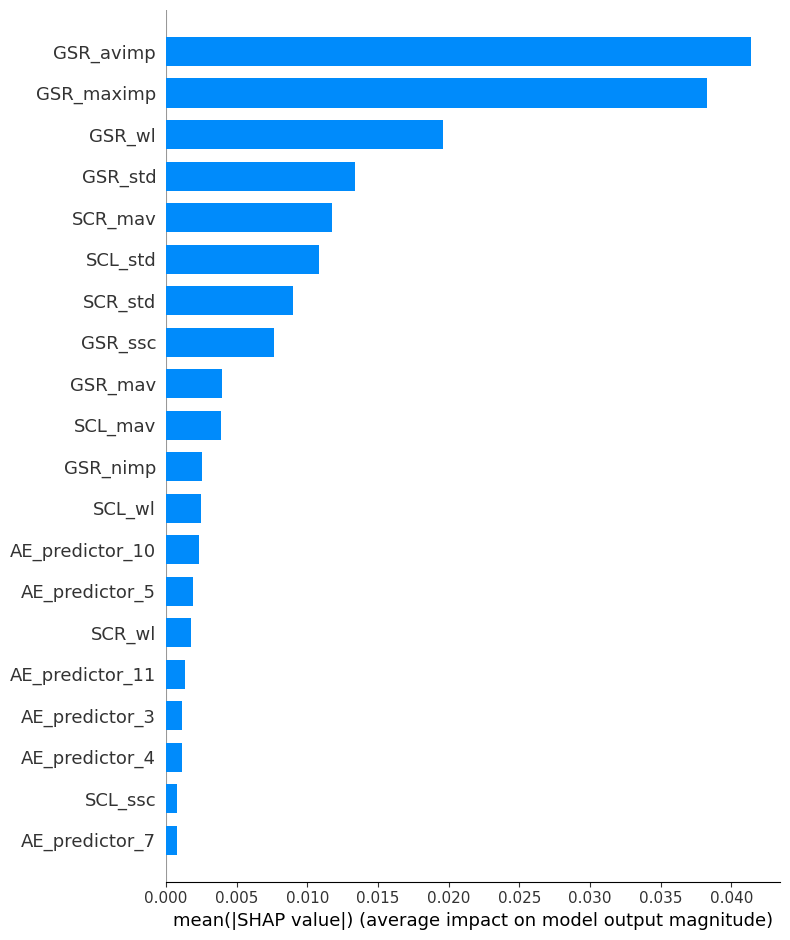

In [41]:
# Dictionary for Random Forest models and evaluation metrics
rf_models = {}
rf_metrics = {'Emotion': [], 'Mean Squared Error': [], 'R^2 Score': []}
shap_values_dict = {}

# Define the hyperparameter space for initial random search
hyperparam_space_rand = {
    'max_depth': list(range(5, 100, 10)) + [None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': range(1, 6),
    'min_samples_split': [2, 5, 10],
    'n_estimators': list(range(100, 1000, 100))
}

# Helper functions for generating hyperparameter ranges
def gen_range(val, num, step, min_val=1):
    """Generates a range centered around `val` with `num` steps of size `step`."""
    dist_floor = floor(num / 2.) * step
    dist_ceil = ceil(num / 2.) * step
    start_val = max(val - dist_floor, min_val)
    end_val = val + dist_ceil
    return range(start_val, end_val, step)

def gen_hyperparam_space(prev_optimal):
    """Generate a hyperparameter space around previous optimal values."""
    return {
        'max_depth': ([None] if prev_optimal['max_depth'] is None 
                      else gen_range(prev_optimal['max_depth'], 4, 3)),
        'max_features': [prev_optimal['max_features']],
        'min_samples_leaf': [prev_optimal['min_samples_leaf']],
        'min_samples_split': gen_range(prev_optimal['min_samples_split'], 3, 2, min_val=2),
        'n_estimators': gen_range(prev_optimal['n_estimators'], 5, 20),
    }

# Fit and evaluate models for each emotion
for emotion in y_train.columns:
    print(f"Processing emotion: {emotion}")

    # 1. Initial Randomized Search
    rf_base = RandomForestRegressor(random_state=710)
    rf_random = RandomizedSearchCV(
        estimator=rf_base,
        param_distributions=hyperparam_space_rand,
        n_iter=50,
        cv=3,
        verbose=2,
        refit=True,
        random_state=710
    )
    rf_random.fit(X_train, y_train[emotion])
    best_random_model = rf_random.best_estimator_

    # Evaluate after RandomizedSearchCV on the validation set
    val_predictions = best_random_model.predict(X_val)
    val_mse = mean_squared_error(y_val[emotion], val_predictions)
    val_r2 = r2_score(y_val[emotion], val_predictions)
    print(f"Validation MSE (RandomizedSearchCV) for {emotion}: {val_mse:.4f}, "
          f"Validation R^2: {val_r2:.4f}")

    # 2. Refine hyperparameters with GridSearchCV
    rf_prev_optimal = rf_random.best_params_
    rf_hyperparam_space_concentrated = gen_hyperparam_space(rf_prev_optimal)

    rf_grid = GridSearchCV(
        estimator=rf_base,
        param_grid=rf_hyperparam_space_concentrated,
        cv=3,
        verbose=2,
        refit=True
    )
    rf_grid.fit(X_train, y_train[emotion])
    best_rf_model = rf_grid.best_estimator_

    # 3. Refit on combined train + validation set
    X_train_final = pd.concat([X_train, X_val])
    y_train_final = pd.concat([y_train[emotion], y_val[emotion]])
    best_rf_model.fit(X_train_final, y_train_final)

    # 4. Evaluate the final model on the test set
    rf_y_pred = best_rf_model.predict(X_test)
    rf_mse = mean_squared_error(y_test[emotion], rf_y_pred)
    rf_r2 = r2_score(y_test[emotion], rf_y_pred)

    # Store evaluation metrics
    rf_metrics['Emotion'].append(emotion)
    rf_metrics['Mean Squared Error'].append(rf_mse)
    rf_metrics['R^2 Score'].append(rf_r2)

    # Calculate and store SHAP values for each emotion
    rf_explainer = shap.TreeExplainer(best_rf_model)
    rf_shap_values = rf_explainer.shap_values(X_test)
    shap_values_dict[emotion] = rf_shap_values

# Convert metrics dictionary to a DataFrame for easier viewing
rf_metrics_df = pd.DataFrame(rf_metrics)

# Display evaluation metrics
print("\nRandom Forest Model Evaluation Metrics:\n", rf_metrics_df)

# Plot SHAP summary plots for feature importances
for emotion, shap_vals in shap_values_dict.items():
    print(f"\nSHAP Summary Plot for Emotion: {emotion}")
    shap.summary_plot(shap_vals, X_test, feature_names=X.columns, plot_type="bar")

In [42]:
# Print best hyperparameters, MSE scores, and chosen model
print("=========================")
print("Hyper-parameters")
print(dict(zip(["rf_random", "rf_grid"], [m.best_params_ for m in [rf_random, rf_grid]])))

# Calculate MSE for both models on the chosen target for comparison
mse_vals = [
    mean_squared_error(y_test[emotion], rf_random.best_estimator_.predict(X_test)),
    mean_squared_error(y_test[emotion], rf_grid.best_estimator_.predict(X_test))
]
best_rf_model_index = np.argmin(mse_vals)  # Find index of best-performing model based on MSE

print("=========================")
print("MSE Scores (Lower is better)")
print(dict(zip(["rf_random", "rf_grid"], mse_vals)))

print("=========================")
print("Chosen Model:")
print(["rf_random", "rf_grid"][best_rf_model_index])

Hyper-parameters
{'rf_random': {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 5}, 'rf_grid': {'max_depth': 1, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 780}}
MSE Scores (Lower is better)
{'rf_random': 7.568907725983747, 'rf_grid': 7.427023641113229}
Chosen Model:
rf_grid


### XGBoost 

Processing emotion: angry
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=1.0; total time=

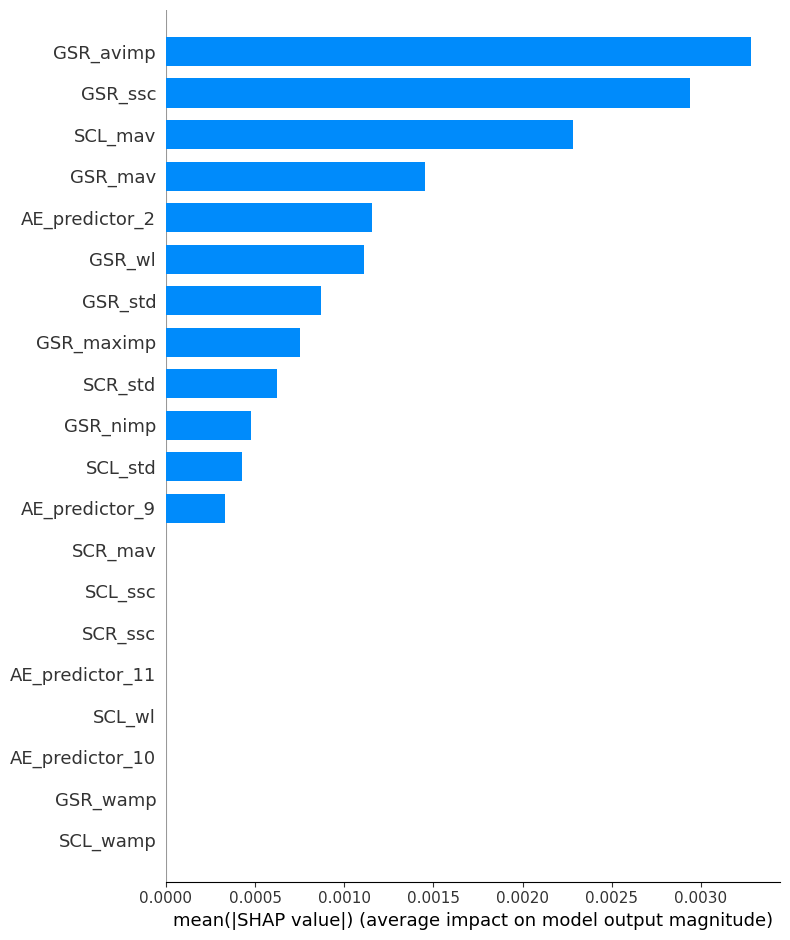


SHAP Summary Plot for Emotion: sad


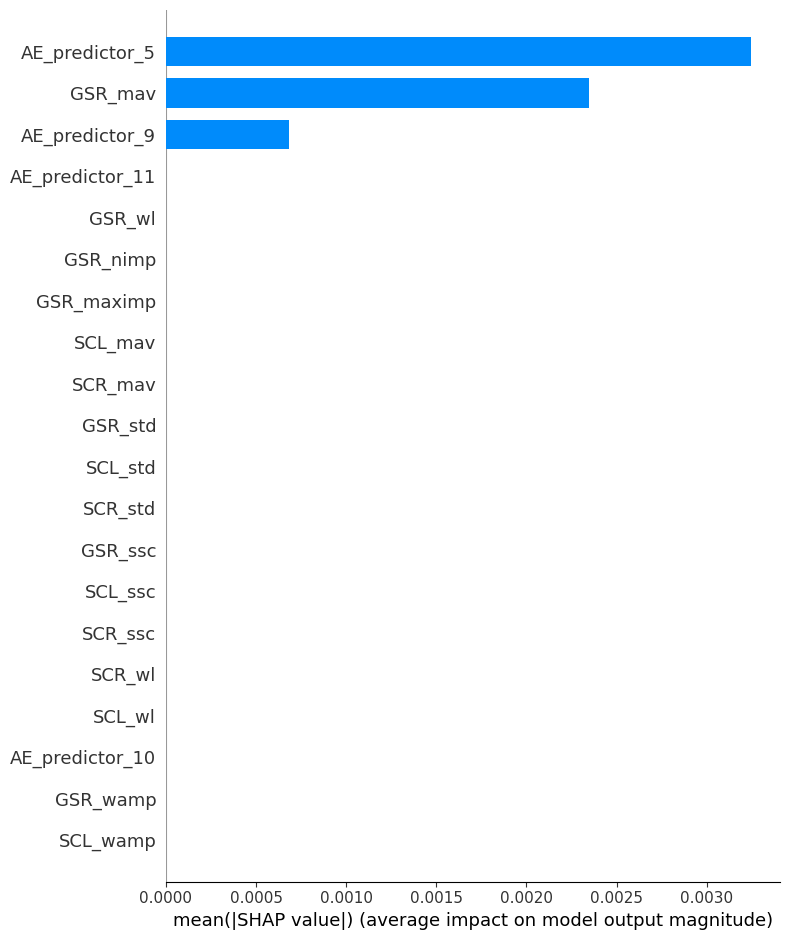


SHAP Summary Plot for Emotion: tense


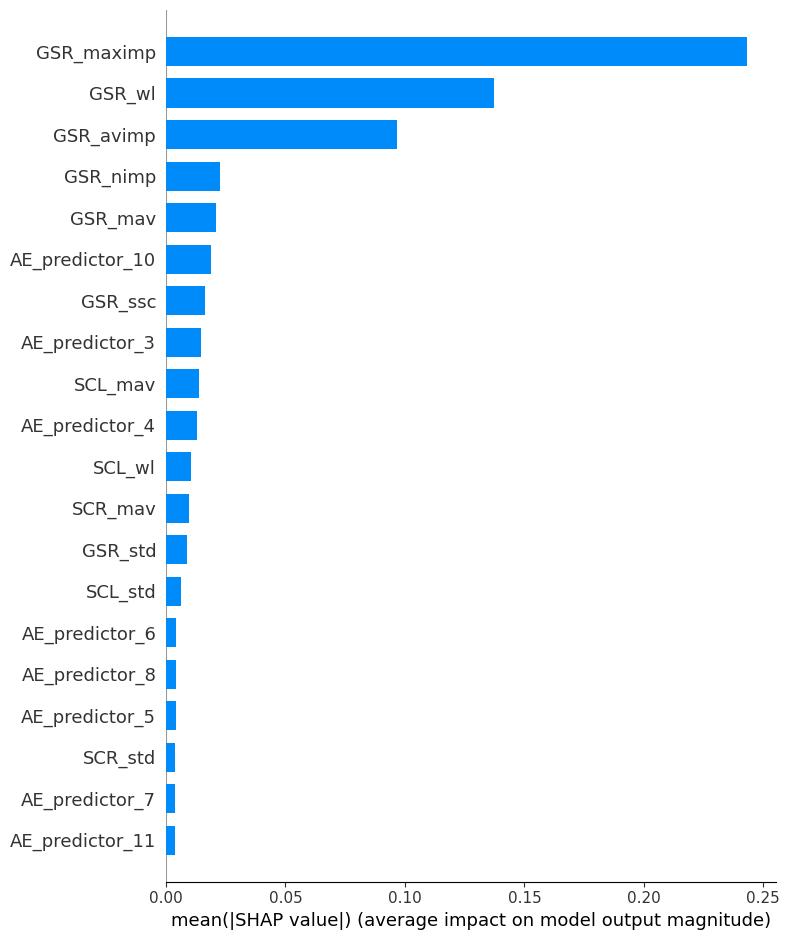


SHAP Summary Plot for Emotion: humiliated


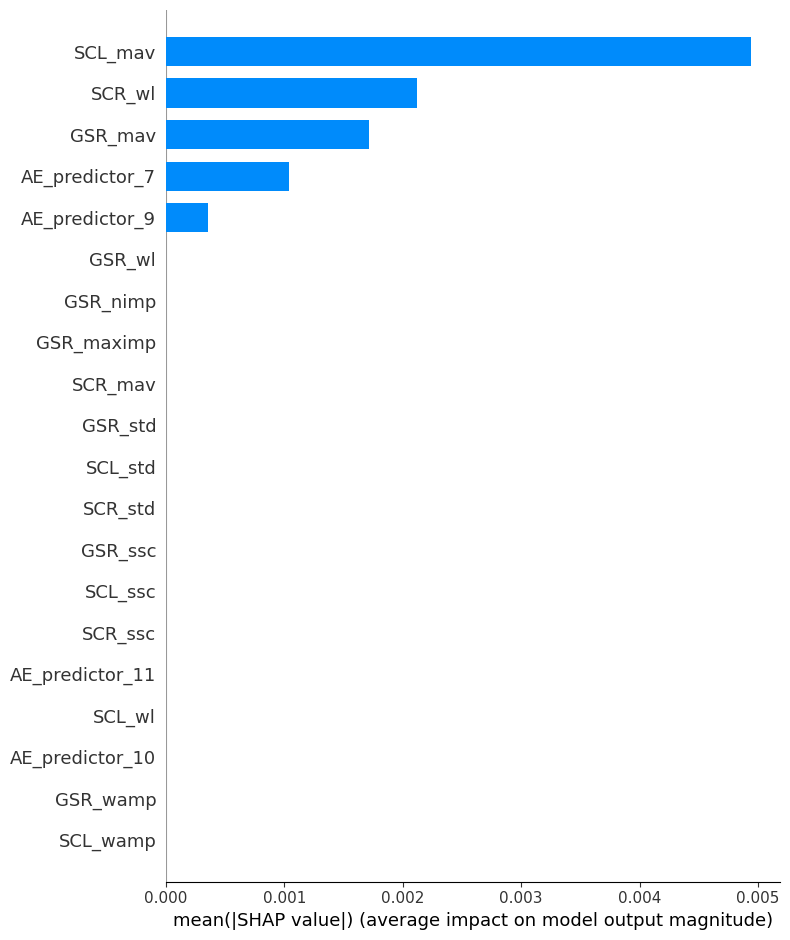


SHAP Summary Plot for Emotion: desire_avoid


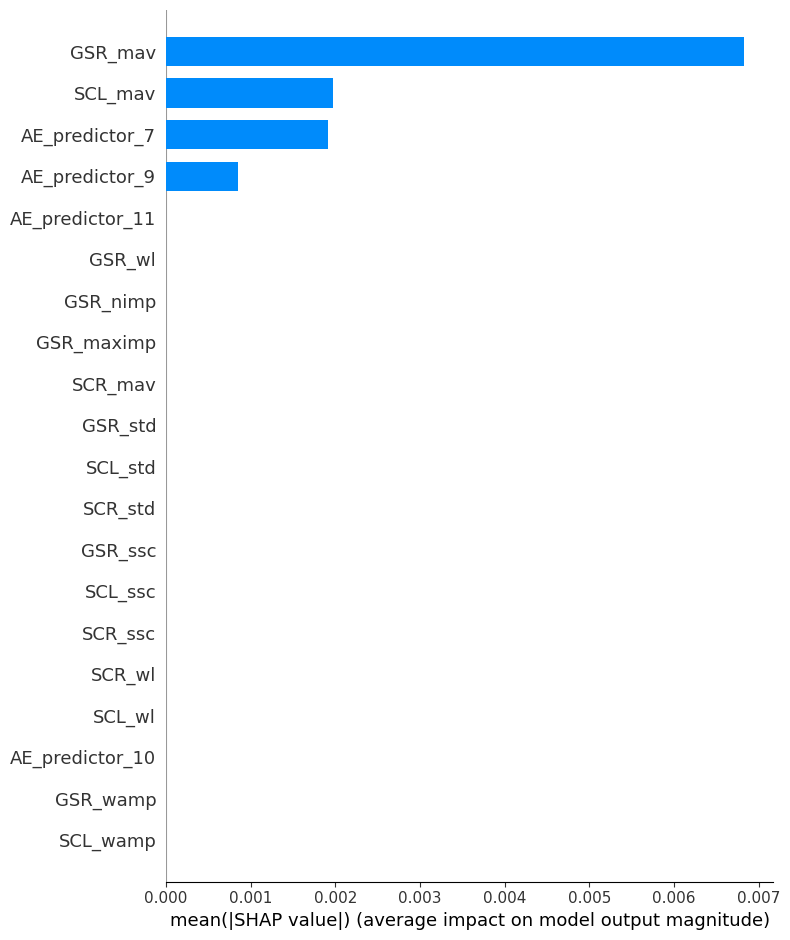


SHAP Summary Plot for Emotion: happy


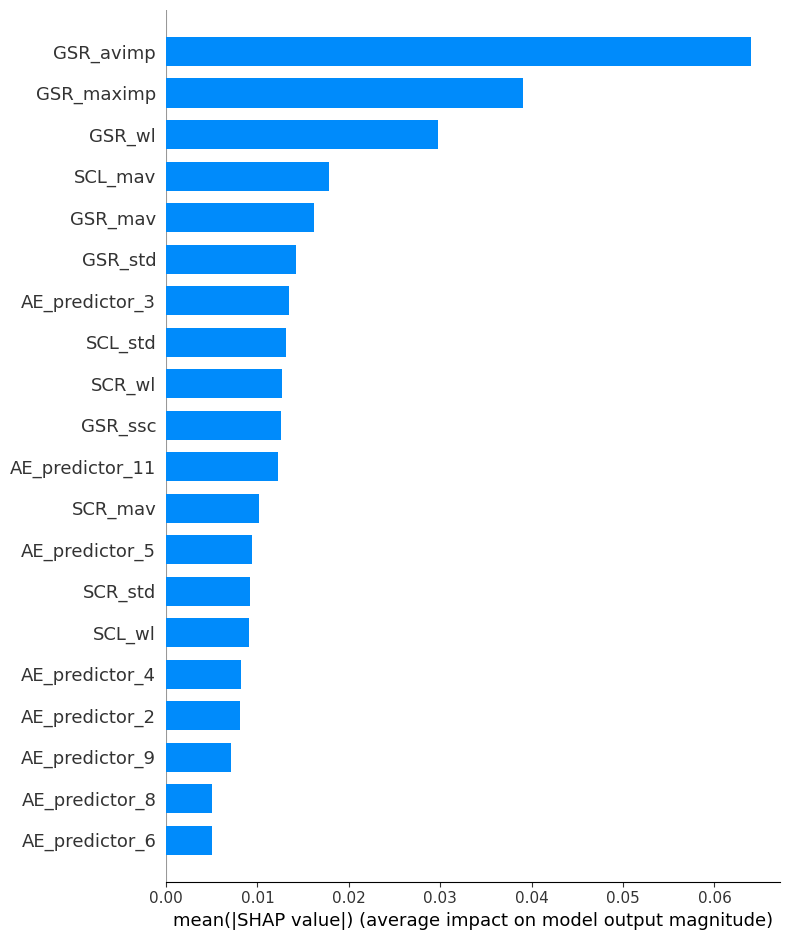


SHAP Summary Plot for Emotion: positive


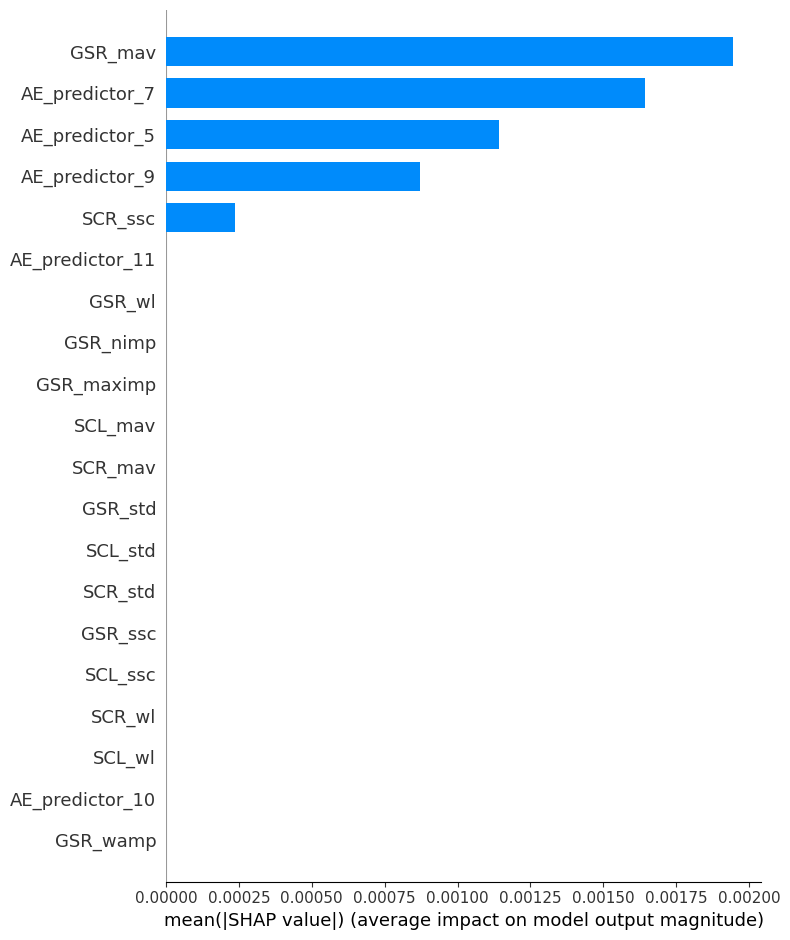


SHAP Summary Plot for Emotion: energetic


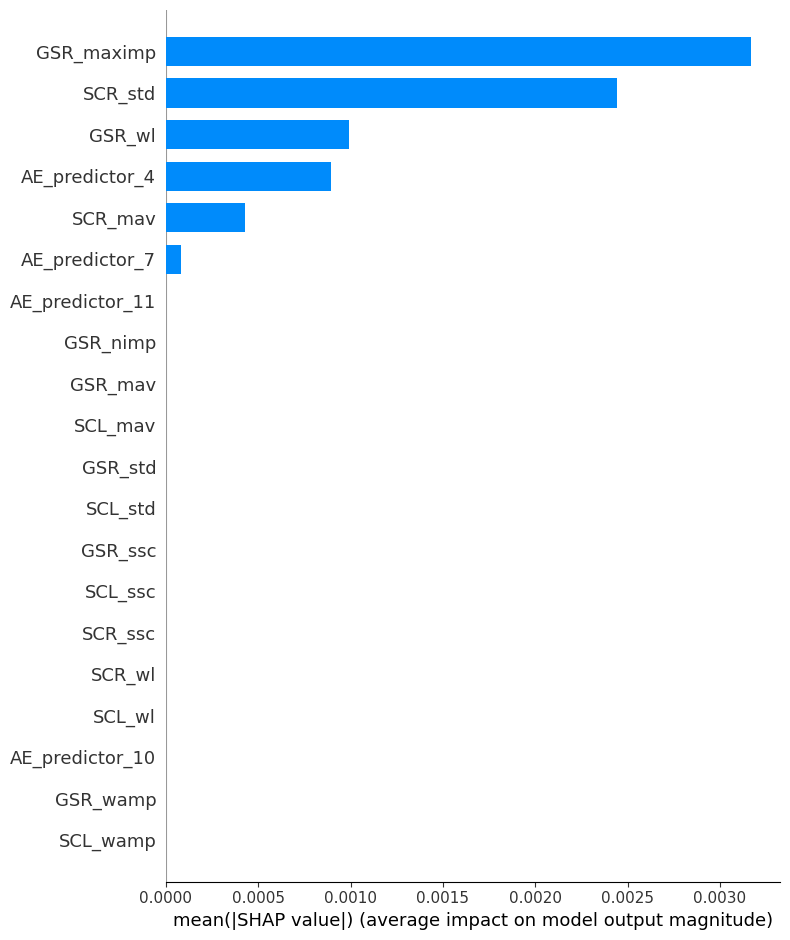


SHAP Summary Plot for Emotion: relaxed


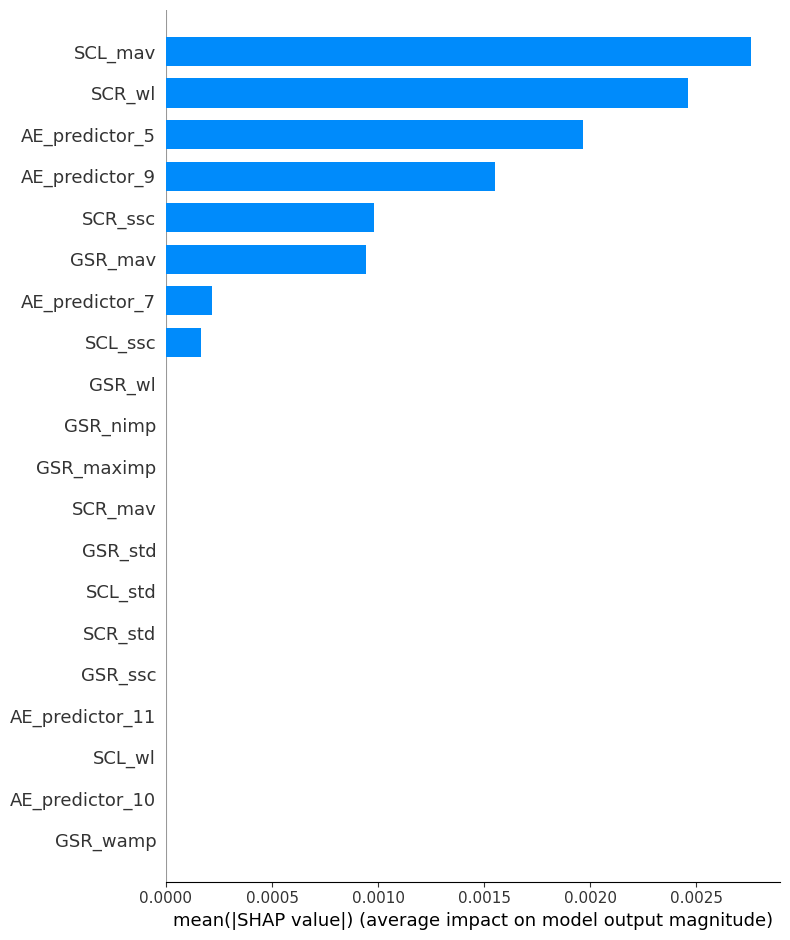


SHAP Summary Plot for Emotion: self_hate


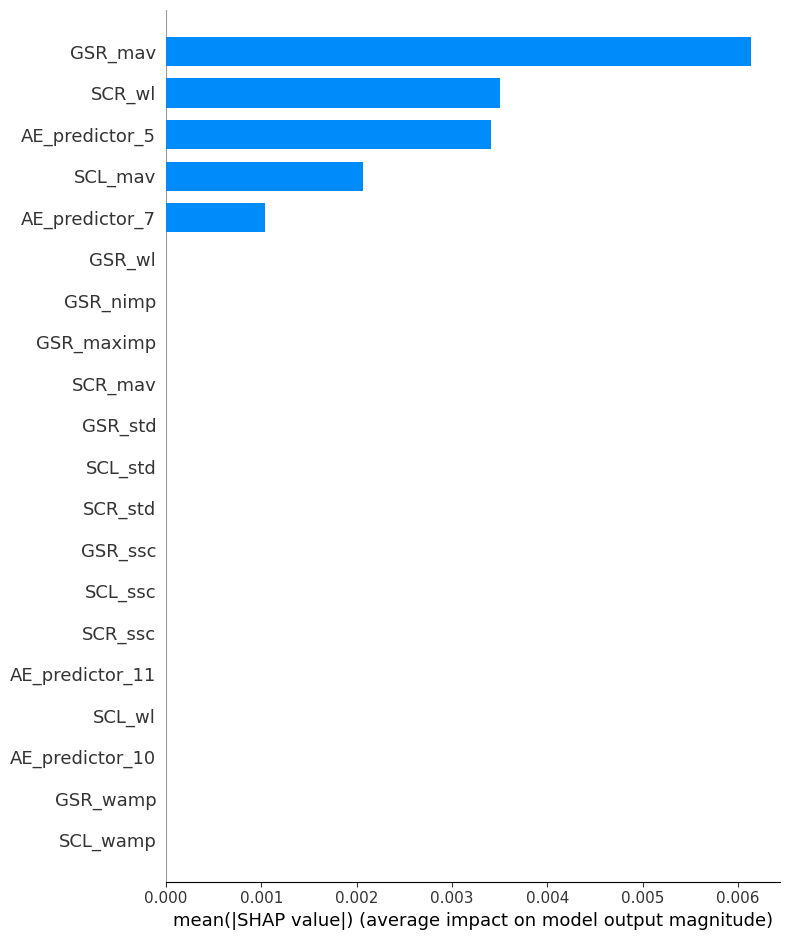


SHAP Summary Plot for Emotion: stressed


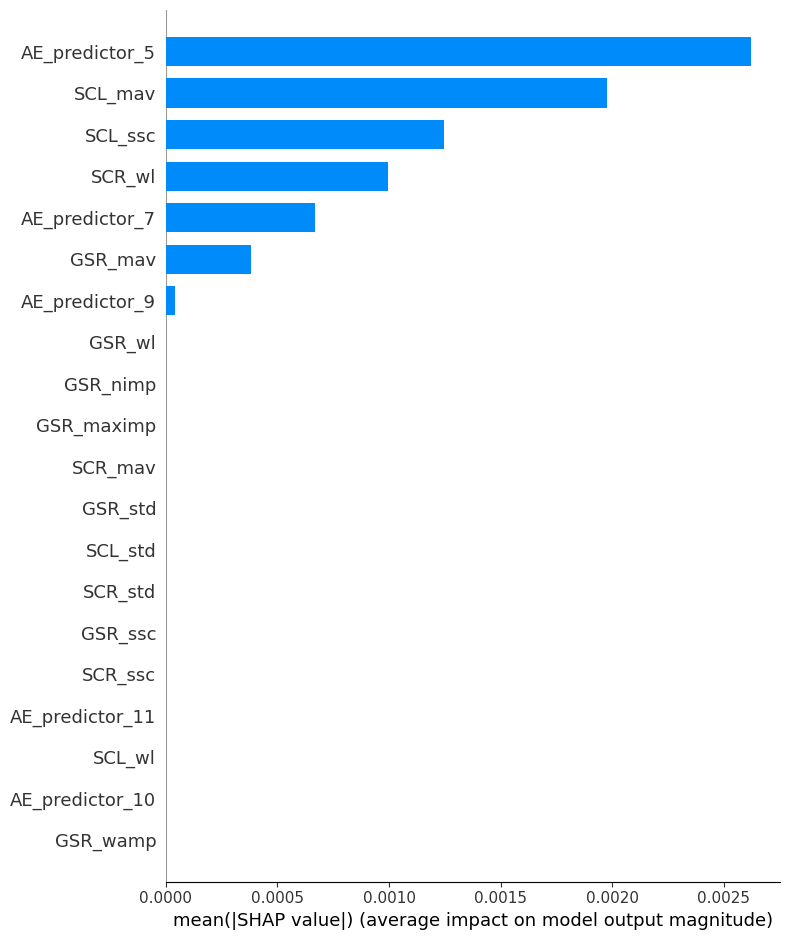

In [43]:
# Initialize dictionaries to store XGBoost models and evaluation metrics
xgb_models = {}
xgb_metrics = {'Emotion': [], 'Mean Squared Error': [], 'R^2 Score': []}
shap_values_dict = {}

# Define the hyperparameter space for initial random search
hyperparam_space_rand = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': list(range(3, 10)),
    'n_estimators': list(range(100, 1100, 100)),
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0]
}

# Helper functions to generate a concentrated hyperparameter space
def gen_range(val, num, step, min_val=1):
    """Generate a range centered around `val` with `num` steps, of size `step`."""
    dist_floor = floor(num / 2.) * step
    dist_ceil = ceil(num / 2.) * step
    start_val = max(val - dist_floor, min_val)
    end_val = val + dist_ceil
    return range(start_val, end_val, step)

def gen_hyperparam_space(prev_optimal):
    """Generate a hyperparameter space around previously found optimal values."""
    return {
        'learning_rate': [prev_optimal['learning_rate']],
        'max_depth': gen_range(prev_optimal['max_depth'], 4, 1, min_val=3),
        'n_estimators': gen_range(prev_optimal['n_estimators'], 5, 100),
        'subsample': [prev_optimal['subsample']],
        'colsample_bytree': [prev_optimal['colsample_bytree']]
    }

# Fit and evaluate models for each emotion
for emotion in y_train.columns:
    print(f"Processing emotion: {emotion}")

    # 1. Randomized Search
    xgb_base = XGBRegressor(random_state=710)
    xgb_random = RandomizedSearchCV(
        estimator=xgb_base,
        param_distributions=hyperparam_space_rand,
        n_iter=50,
        cv=3,
        verbose=2,
        refit=True,
        random_state=710
    )
    xgb_random.fit(X_train, y_train[emotion])
    best_random_model = xgb_random.best_estimator_

    # Evaluate best model from RandomizedSearchCV on validation set
    val_predictions = best_random_model.predict(X_val)
    val_mse = mean_squared_error(y_val[emotion], val_predictions)
    val_r2 = r2_score(y_val[emotion], val_predictions)
    print(f"Validation MSE (RandomizedSearchCV) for {emotion}: {val_mse:.4f}, "
          f"Validation R^2: {val_r2:.4f}")

    # 2. Grid Search
    prev_optimal = xgb_random.best_params_
    hyperparam_space_concentrated = gen_hyperparam_space(prev_optimal)

    xgb_grid = GridSearchCV(
        estimator=xgb_base,
        param_grid=hyperparam_space_concentrated,
        cv=3,
        verbose=2,
        refit=True
    )
    xgb_grid.fit(X_train, y_train[emotion])
    best_xgb_model = xgb_grid.best_estimator_

    # 3. Refit the final model on the combined train + validation set
    X_train_final = pd.concat([X_train, X_val])
    y_train_final = pd.concat([y_train[emotion], y_val[emotion]])
    best_xgb_model.fit(X_train_final, y_train_final)

    # 4. Evaluate the final model on the test set
    y_pred = best_xgb_model.predict(X_test)
    mse = mean_squared_error(y_test[emotion], y_pred)
    r2 = r2_score(y_test[emotion], y_pred)

    # Store evaluation metrics
    xgb_metrics['Emotion'].append(emotion)
    xgb_metrics['Mean Squared Error'].append(mse)
    xgb_metrics['R^2 Score'].append(r2)

    # SHAP feature importance
    explainer = shap.TreeExplainer(best_xgb_model)
    shap_values = explainer.shap_values(X_test)
    shap_values_dict[emotion] = shap_values  # Store SHAP values for each emotion

# Convert metrics dictionary to a DataFrame for easier viewing
xgb_metrics_df = pd.DataFrame(xgb_metrics)

# Display evaluation metrics
print("\nXGBoost Model Evaluation Metrics:\n", xgb_metrics_df)

# Plot SHAP summary plots for feature importances
for emotion, shap_vals in shap_values_dict.items():
    print(f"\nSHAP Summary Plot for Emotion: {emotion}")
    shap.summary_plot(shap_vals, X_test, feature_names=X.columns, plot_type="bar")


In [44]:
print("XGBoost Model Evaluation Metrics:\n", xgb_metrics_df)

XGBoost Model Evaluation Metrics:
          Emotion  Mean Squared Error  R^2 Score
0          angry           14.266098  -0.137659
1            sad            9.603385  -0.027772
2          tense            7.757851   0.007236
3     humiliated           15.202599  -0.093881
4   desire_avoid           11.920856  -0.039755
5          happy            6.674087   0.009479
6       positive            7.787740  -0.000109
7      energetic            7.413021   0.000164
8        relaxed            6.545938  -0.010953
9      self_hate           13.668949  -0.000683
10      stressed            7.547342  -0.000350


In [45]:
# Print best hyperparameters, MSE scores, and chosen model
print("=========================")
print("Hyper-parameters for each search")
print(dict(zip(["xgb_random", "xgb_grid"], [m.best_params_ for m in [xgb_random, xgb_grid]])))

# Calculate MSE for both models on the chosen target for comparison
mse_vals = [
    mean_squared_error(y_test[emotion], xgb_random.best_estimator_.predict(X_test)),
    mean_squared_error(y_test[emotion], xgb_grid.best_estimator_.predict(X_test))
]
best_xgb_model_index = np.argmin(mse_vals)  # Find index of best-performing model based on MSE

print("=========================")
print("MSE Scores (Lower is better)")
print(dict(zip(["xgb_random", "xgb_grid"], mse_vals)))

print("=========================")
print("Chosen Model:")
print(["xgb_random", "xgb_grid"][best_xgb_model_index])

Hyper-parameters for each search
{'xgb_random': {'subsample': 0.5, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.3}, 'xgb_grid': {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1, 'subsample': 0.5}}
MSE Scores (Lower is better)
{'xgb_random': 7.434249400894159, 'xgb_grid': 7.5473417594888925}
Chosen Model:
xgb_random


# Analysis of Rating Magnitude

In [46]:
# Alter the structure of the data to match intended analysis objective
# Define the columns to pivot
columns_to_pivot = ['angry', 'sad', 'tense', 'humiliated', 'desire_avoid', 'happy', 'positive', 'energetic', 'relaxed', 'self_hate', 'stressed']

# Define "positive" variables for classification
Pstv = ['happy', 'positive', 'energetic', 'relaxed']

# Pivot to long format
Magnitude_y = y.melt(value_vars=columns_to_pivot, 
                  var_name='Emotion', value_name='Values')

# Add a 'Valence' column based on whether the 'emotion' is in the "negative" list
Magnitude_y['Valence'] = np.where(Magnitude_y['Emotion'].isin(Pstv), 'Pos', 'Neg')

# Reverse score using if-else logic with apply
Magnitude_y['Values'] = Magnitude_y.apply(
    lambda row: 10 - row['Values'] if row['Valence'] == 'Pos' else row['Values'], 
    axis=1
)
                  
# Stack Y
Magnitude_y = Magnitude_y['Values']

# Repeat each row of X for the number of Y columns
Magnitude_X = X.loc[X.index.repeat(y.shape[1])].reset_index(drop=True)

# ID Number
Magnitude_ID = EMA_EDA_2P['ppt_id'].loc[EMA_EDA_2P['ppt_id'].index.repeat(y.shape[1])].reset_index(drop=True)

In [47]:
# Redo Train-test split for magnitude-based data structure
# Step 1: Split the dataset into 80% training/validation and 20% test (indices-based approach)
mag_train_val_indices, mag_test_indices = train_test_split(
    Magnitude_X.index, test_size=0.2, random_state=710, stratify=Magnitude_ID
)

# Step 2: Split the 80% training/validation set into 87.5% (70% overall) training and 12.5% (10% overall) validation (indices-based approach)
mag_train_indices, mag_val_indices = train_test_split(
    mag_train_val_indices, test_size=0.125, random_state=710, stratify=Magnitude_ID[mag_train_val_indices]
)

# Subset the data based on the train-test indices
X_train_mag = Magnitude_X.loc[mag_train_indices]
X_val_mag = Magnitude_X.loc[mag_val_indices]
X_test_mag = Magnitude_X.loc[mag_test_indices]
y_train_mag = Magnitude_y.loc[mag_train_indices]
y_val_mag = Magnitude_y.loc[mag_val_indices]
y_test_mag = Magnitude_y.loc[mag_test_indices]

# Convert y_train and y_test back into DataFrames for modeling and set column names for X_train and X_test
y_train_mag = pd.DataFrame(y_train_mag)
y_val_mag = pd.DataFrame(y_val_mag)
y_test_mag = pd.DataFrame(y_test_mag)
X_train_mag = pd.DataFrame(X_train_mag)
X_val_mag = pd.DataFrame(X_val_mag)
X_test_mag = pd.DataFrame(X_test_mag)

# Create dataframes specifically for linear models (no hyperparameter tuning)
X_train_val_mag = pd.concat([X_train_mag, X_val_mag], axis=0)
y_train_val_mag = pd.concat([y_train_mag, y_val_mag], axis=0)

Model Evaluation Metrics:
    Mean Squared Error  R^2 Score
0           11.424715   0.014183

Feature Importances:
                          Coef
GSR_avimp        3.905350e+00
GSR_nimp        -4.007859e-03
GSR_maximp       2.764281e-02
GSR_mav         -4.015817e+00
SCL_mav          8.070738e-02
SCR_mav          7.953744e-02
GSR_std          2.345813e-01
SCL_std         -2.469414e-01
SCR_std          4.421224e-02
GSR_ssc         -6.183345e-04
SCL_ssc          2.165135e-02
SCR_ssc          1.638030e-02
GSR_wl          -2.611042e-04
SCL_wl           1.789683e-02
SCR_wl          -3.254883e-02
GSR_wamp        -7.105427e-15
SCL_wamp         1.421085e-14
SCR_wamp         3.552714e-14
AE_predictor_1  -1.012935e+01
AE_predictor_2  -1.264577e+01
AE_predictor_3   1.963014e+01
AE_predictor_4   2.555468e+01
AE_predictor_5   1.293767e+01
AE_predictor_6  -4.050386e+01
AE_predictor_7  -2.546654e+01
AE_predictor_8  -1.443556e+01
AE_predictor_9   5.027682e+01
AE_predictor_10 -1.523524e+01
AE_predictor_1

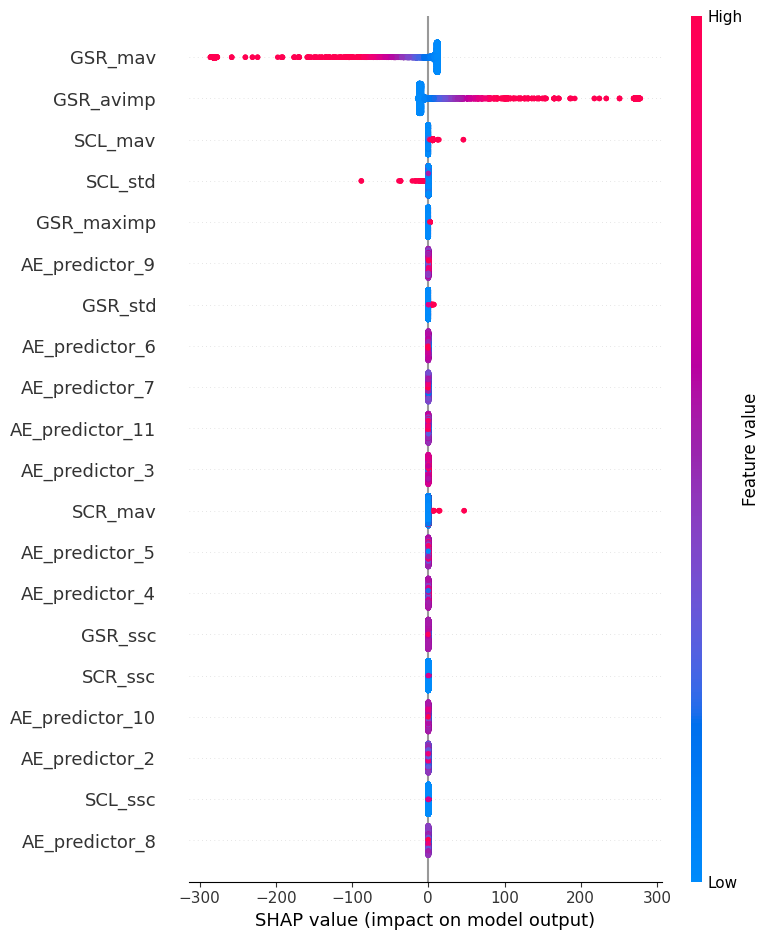

<AxesSubplot:>

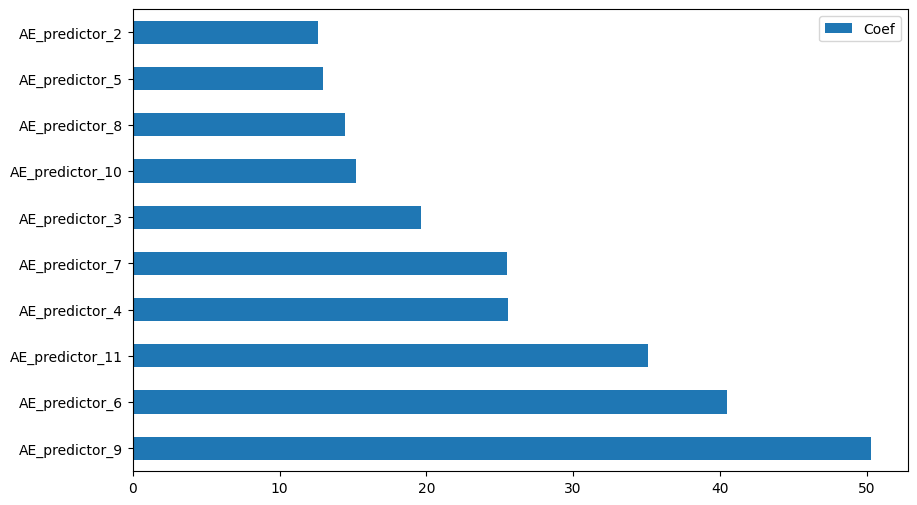

In [48]:
#### Linear Regression ####
# Initialize necessary data structures to hold output
metrics_mag = {'Mean Squared Error': [], 'R^2 Score': []}
feature_importances_mag = pd.DataFrame(index=X_test_mag.columns)

#Initialize model
model_mag = LinearRegression()
model_mag.fit(X_train_mag, y_train_mag)

# Hold-out predictions and evaluation metrics
y_pred_mag = model_mag.predict(X_test_mag)
mse_mag = mean_squared_error(y_test_mag, y_pred_mag)
r2_mag = r2_score(y_test_mag, y_pred_mag)

# Store evaluation metrics
metrics_mag['Mean Squared Error'].append(mse_mag)
metrics_mag['R^2 Score'].append(r2_mag)
    
# Store feature importances (coefficients)
feature_importances_mag['Coef'] = model_mag.coef_.flatten()
    
# SHAP for feature interpretation
explainer_mag = shap.LinearExplainer(model_mag, X_train_mag)
shap_values_mag = explainer_mag.shap_values(X_test_mag)


# Convert metrics dictionary to a DataFrame for easier viewing
metrics_df_mag = pd.DataFrame(metrics_mag)

# Display evaluation metrics and sorted feature importances
print("Model Evaluation Metrics:\n", metrics_df_mag)
print("\nFeature Importances:\n", feature_importances_mag)

# Plot SHAP summary plots for feature importances
print(f"\nSHAP Summary Plot")
shap.summary_plot(shap_values_mag, X_test_mag, feature_names=X_train_mag.columns)

# Plot most important features
feature_importances_mag.abs().nlargest(10, feature_importances_mag.columns).plot(kind='barh', figsize=(10, 6))


Lasso Model Evaluation Metrics:
    Mean Squared Error  R^2 Score  Best Alpha
0           11.472473   0.010062      0.0001

Feature Importances by Emotion (Lasso Coefficients):
 GSR_avimp         -0.335130
GSR_nimp          -0.043459
GSR_maximp         0.428600
GSR_mav           -0.963465
SCL_mav            1.050717
SCR_mav            0.702164
GSR_std            0.227576
SCL_std           -1.592624
SCR_std            0.370344
GSR_ssc           -0.032174
SCL_ssc            0.039205
SCR_ssc            0.097733
GSR_wl             0.005303
SCL_wl            -0.046785
SCR_wl            -0.043434
GSR_wamp           0.000000
SCL_wamp           0.000000
SCR_wamp           0.000000
AE_predictor_1    -0.025808
AE_predictor_2    -0.044042
AE_predictor_3     0.088591
AE_predictor_4     0.083962
AE_predictor_5     0.082139
AE_predictor_6    -0.149679
AE_predictor_7    -0.081055
AE_predictor_8    -0.040490
AE_predictor_9     0.168444
AE_predictor_10   -0.055769
AE_predictor_11   -0.081658
dtype: flo

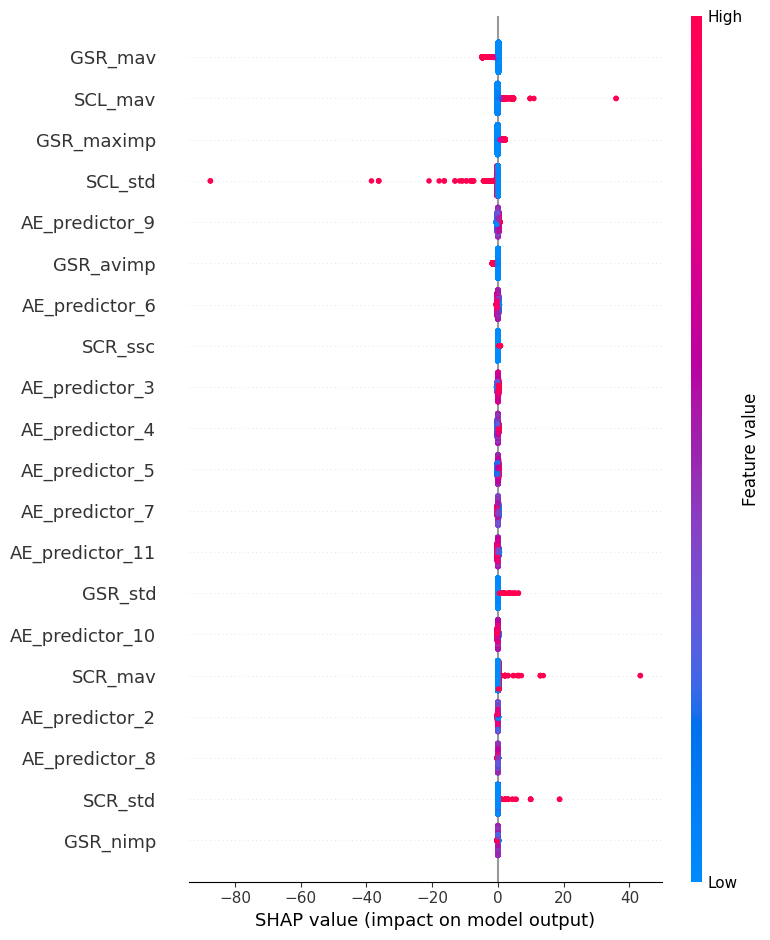

<AxesSubplot:>

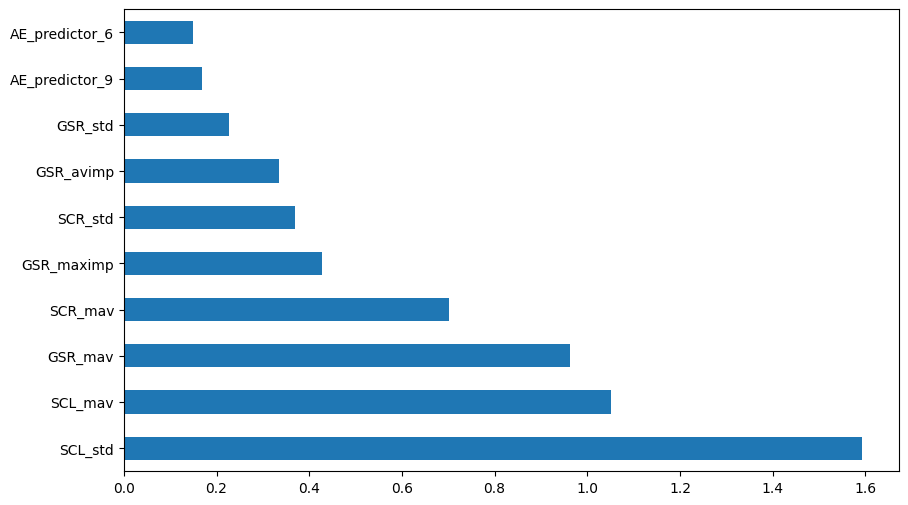

In [49]:
#### Linear Regression (L1) ####
# Standardize the features for Lasso regression
scaler = StandardScaler()
X_train_mag_scaled = scaler.fit_transform(X_train_val_mag)
X_test_mag_scaled = scaler.transform(X_test_mag)

# Define range of variables considered for hyperparameter tuning
alpha_search = {'alpha': np.logspace(-4, 0, 50)}  # 50 alpha values from 0.0001 to 1

# Initialize necessary data structures to hold output
lasso_metrics_mag = {'Mean Squared Error': [], 'R^2 Score': [], 'Best Alpha': []}
lasso_feature_importances_mag = pd.DataFrame(index=X_test_mag.columns)
lasso_shap_values_dict = {}

# Ignore all warnings (for aesthetics)
warnings.filterwarnings("ignore")

# Hyperparameter tuning with GridSearchCV
mag_lasso = Lasso(max_iter=1000) 
mag_grid_search = GridSearchCV(
    estimator=mag_lasso,
    param_grid=alpha_search,
    scoring='neg_mean_squared_error',
    cv=3 # 3 fold cross-validation 
)
mag_grid_search.fit(X_train_mag_scaled, y_train_val_mag)

# Retrieve the best model and alpha value
lasso_mag_best_alpha = mag_grid_search.best_params_['alpha']
lasso_mag_best_model = mag_grid_search.best_estimator_

# Predict and evaluate on the test set
lasso_y_pred_mag = lasso_mag_best_model.predict(X_test_mag_scaled)
mse_mag = mean_squared_error(y_test_mag, lasso_y_pred_mag)
r2_mag = r2_score(y_test_mag, lasso_y_pred_mag)

# Store evaluation metrics
lasso_metrics_mag['Best Alpha'].append(lasso_mag_best_alpha)
lasso_metrics_mag['Mean Squared Error'].append(mse_mag)
lasso_metrics_mag['R^2 Score'].append(r2_mag)

# Store feature importances (coefficients)
lasso_feature_importances_mag = pd.Series(
    lasso_mag_best_model.coef_, index=X_train_mag.columns
)

# SHAP for feature interpretation
lasso_mag_explainer = shap.LinearExplainer(lasso_mag_best_model, X_train_mag_scaled)
lasso_shap_values_mag = lasso_mag_explainer.shap_values(X_test_mag_scaled)


# Convert metrics dictionary to a DataFrame for easier viewing
mag_lasso_metrics_df = pd.DataFrame(lasso_metrics_mag)

# Display evaluation metrics and sorted feature importances
print("Lasso Model Evaluation Metrics:\n", mag_lasso_metrics_df)
print("\nFeature Importances by Emotion (Lasso Coefficients):\n", lasso_feature_importances_mag)

# Plot SHAP summary plots for feature importances
print(f"\nSHAP Summary Plot")
shap.summary_plot(lasso_shap_values_mag, X_test_mag_scaled, feature_names=X_train_mag.columns)

# Plot most important features
lasso_feature_importances_mag.abs().nlargest(10).plot(kind='barh', figsize=(10, 6))

In [50]:
#### RANDOM FOREST ####
# Dictionary for Random Forest models and evaluation metrics
rf_metrics_mag = {'Mean Squared Error': [], 'R^2 Score': []}

# Defines the hyperparameter space for initial random search
hyperparam_space_rand = {
    'max_depth': list(range(5, 100, 10)) + [None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': range(1, 6),
    'min_samples_split': [2, 5, 10],
    'n_estimators': list(range(100, 1000, 100))
}

# Helper functions
def gen_range(val, num, step, min_val=1):
    # Generates a range 
    dist_floor = floor(num / 2.) * step
    dist_ceil = ceil(num / 2.) * step
    return range(max(val - dist_floor, min_val), val + dist_ceil, step)

def gen_hyperparam_space(prev_optimal):
    # Generate a hyperparameter space around previous optimal values
    return {
        'max_depth': [None] if prev_optimal['max_depth'] is None else gen_range(prev_optimal['max_depth'], 4, 3),
        'max_features': [prev_optimal['max_features']],
        'min_samples_leaf': [prev_optimal['min_samples_leaf']],
        'min_samples_split': gen_range(prev_optimal['min_samples_split'], 3, 2, min_val=2),
        'n_estimators': gen_range(prev_optimal['n_estimators'], 5, 20),
    }

# Step 1: Initial search with RandomizedSearchCV
rf_base_mag = RandomForestRegressor(random_state=710)
rf_random_mag = RandomizedSearchCV(
    estimator=rf_base_mag,
    param_distributions=hyperparam_space_rand,
    n_iter=50,
    cv=3,
    verbose=2,
    refit=True,
    random_state=710
)

# Randomized Search
rf_random_mag.fit(X_train_mag, np.array(y_train_mag).reshape(-1, 1).flatten())
best_random_model_mag = rf_random_mag.best_estimator_

# Evaluate the best model on the validation set
val_predictions = best_random_model_mag.predict(X_val_mag)
val_mse = mean_squared_error(y_val_mag, val_predictions)
val_r2 = r2_score(y_val_mag, val_predictions)
print(f"Validation MSE after RandomizedSearchCV: {val_mse}, Validation R^2: {val_r2}")

# Step 2: Further refine with GridSearchCV
rf_prev_optimal_mag = rf_random_mag.best_params_
rf_hyperparam_space_concentrated_mag = gen_hyperparam_space(rf_prev_optimal_mag)

rf_grid_mag = GridSearchCV(
    estimator=rf_base_mag,
    param_grid=rf_hyperparam_space_concentrated_mag,
    cv=3,
    verbose=2,
    refit=True
)
rf_grid_mag.fit(X_train_mag, np.array(y_train_mag).reshape(-1, 1).flatten())
best_rf_model_mag = rf_grid_mag.best_estimator_

# Step 3: Refit the final model on the combined train-validation set
X_train_final_mag = pd.concat([X_train_mag, X_val_mag], axis=0).reset_index(drop=True)
y_train_final_mag = pd.concat([y_train_mag, y_val_mag], axis=0).reset_index(drop=True)
y_train_final_mag = y_train_final_mag.values.ravel()

best_rf_model_mag.fit(X_train_final_mag, y_train_final_mag)

# Evaluate the final model on the test set
rf_y_pred_mag = best_rf_model_mag.predict(X_test_mag)
rf_mse_mag = mean_squared_error(y_test_mag, rf_y_pred_mag)
rf_r2_mag = r2_score(y_test_mag, rf_y_pred_mag)

# Store evaluation metrics
rf_metrics_mag['Mean Squared Error'].append(rf_mse_mag)
rf_metrics_mag['R^2 Score'].append(rf_r2_mag)

# Convert metrics dictionary to a DataFrame for easier viewing
rf_metrics_df_mag = pd.DataFrame(rf_metrics_mag)

# Display evaluation metrics
print("Random Forest Model Evaluation Metrics:\n", rf_metrics_df_mag)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  18.4s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  18.1s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  18.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  11.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  11.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  11.1s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=  33.5s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estim

In [51]:
print("Random Forest Model Evaluation Metrics:\n", rf_metrics_df_mag)

Random Forest Model Evaluation Metrics:
    Mean Squared Error  R^2 Score
0             5.34436   0.538845


In [52]:
# After fitting all models and collecting results

# Print best hyperparameters, MSE scores, and chosen model
print("=========================")
print("Hyper-parameters")
print(dict(zip(["rf_random", "rf_grid"], [m.best_params_ for m in [rf_random_mag, rf_grid_mag]])))

# Calculate MSE for both models on the chosen target for comparison
rf_mse_vals_mag = [
    mean_squared_error(y_test_mag, rf_grid_mag.best_estimator_.predict(X_test_mag)),
    mean_squared_error(y_test_mag, rf_grid_mag.best_estimator_.predict(X_test_mag))
]
best_rf_model_index_mag = np.argmin(rf_mse_vals_mag)  # Find index of best-performing model based on MSE

print("=========================")
print("MSE Scores (Lower is better)")
print(dict(zip(["rf_random", "rf_grid"], rf_mse_vals_mag)))

print("=========================")
print("Chosen Model:")
print(["rf_random", "rf_grid"][best_rf_model_index_mag])


Hyper-parameters
{'rf_random': {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}, 'rf_grid': {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 460}}
MSE Scores (Lower is better)
{'rf_random': 5.344360177451688, 'rf_grid': 5.344360177451688}
Chosen Model:
rf_random


In [53]:
#### XGBOOST ####
# Initialize dictionaries to store XGBoost models and evaluation metrics
xgb_metrics_mag = {'Mean Squared Error': [], 'R^2 Score': []}

# Define the hyperparameter space for initial random search
hyperparam_space_rand = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': list(range(3, 10)),
    'n_estimators': list(range(100, 1100, 100)),
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0]
}

def gen_hyperparam_space(prev_optimal):
    return {
        'learning_rate': [prev_optimal['learning_rate']],
        'max_depth': gen_range(prev_optimal['max_depth'], 4, 1, min_val=3),
        'n_estimators': gen_range(prev_optimal['n_estimators'], 5, 100),
        'subsample': [prev_optimal['subsample']],
        'colsample_bytree': [prev_optimal['colsample_bytree']]
    }

# Fit and evaluate model
# Initial Randomized Search
xgb_base_mag = XGBRegressor(random_state=710)
xgb_random_mag = RandomizedSearchCV(
    estimator=xgb_base_mag,
    param_distributions=hyperparam_space_rand,
    n_iter=50,
    cv=3,
    verbose=2,
    refit=True,
    random_state=710
)

xgb_random_mag.fit(X_train_mag, y_train_mag)
#best_random_model_mag = xgb_random_mag.best_estimator_

# Define concentrated hyperparameter space based on RandomizedSearchCV results
prev_optimal_mag = xgb_random_mag.best_params_
hyperparam_space_concentrated_mag = gen_hyperparam_space(prev_optimal_mag)

# Further refinement with GridSearchCV
xgb_grid_mag = GridSearchCV(
    estimator=xgb_base_mag,
    param_grid=hyperparam_space_concentrated_mag,
    cv=3,
    verbose=2,
    refit=True
)
xgb_grid_mag.fit(X_train_mag, y_train_mag)
best_xgb_model_mag = xgb_grid_mag.best_estimator_
#xgb_models_mag = best_xgb_model_mag

# Predictions and metrics
y_pred_mag = best_xgb_model_mag.predict(X_test_mag)
xgb_mse_mag = mean_squared_error(y_test_mag, y_pred_mag)
xgb_r2_mag = r2_score(y_test_mag, y_pred_mag)

# Store evaluation metrics
xgb_metrics_mag['Mean Squared Error'].append(xgb_mse_mag)
xgb_metrics_mag['R^2 Score'].append(xgb_r2_mag)

# Convert metrics dictionary to a DataFrame for easier viewing
xgb_metrics_df_mag = pd.DataFrame(xgb_metrics_mag)

# Display evaluation metrics
print("XGBoost Model Evaluation Metrics:\n", xgb_metrics_df_mag)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   2.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   2.1s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   2.1s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=1.0; total time=   1.1s
[CV] END colsample

In [54]:
print("XGBoost Model Evaluation Metrics:\n", xgb_metrics_df_mag)

XGBoost Model Evaluation Metrics:
    Mean Squared Error  R^2 Score
0            5.477109   0.527391


In [55]:
# After fitting all models and collecting results for XGBoost

# Print best hyperparameters, MSE scores, and chosen model
print("=========================")
print("Hyper-parameters for each search")
print(dict(zip(["xgb_random", "xgb_grid"], [m.best_params_ for m in [xgb_random_mag, xgb_grid_mag]])))

# Calculate MSE for both models on the chosen target for comparison
xgb_mse_vals_mag = [
    mean_squared_error(y_test_mag, xgb_random_mag.best_estimator_.predict(X_test_mag)),
    mean_squared_error(y_test_mag, xgb_grid_mag.best_estimator_.predict(X_test_mag))
]
best_xgb_model_index_mag = np.argmin(xgb_mse_mag)  # Find index of best-performing model based on MSE

print("=========================")
print("MSE Scores (Lower is better)")
print(dict(zip(["xgb_random", "xgb_grid"], xgb_mse_vals_mag)))

print("=========================")
print("Chosen Model:")
print(["xgb_random", "xgb_grid"][best_xgb_model_index_mag])

Hyper-parameters for each search
{'xgb_random': {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.2, 'colsample_bytree': 0.7}, 'xgb_grid': {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 201, 'subsample': 1.0}}
MSE Scores (Lower is better)
{'xgb_random': 5.453289118027886, 'xgb_grid': 5.4771091933824705}
Chosen Model:
xgb_random


# Supplementary Analysis (Positive Valence Magnitude)

In [56]:
# Alter the structure of the data to match intended analysis objective
# Define the columns to pivot
columns_to_pivot = ['angry', 'sad', 'tense', 'humiliated', 'desire_avoid', 'happy', 'positive', 'energetic', 'relaxed', 'self_hate', 'stressed']

# Define "positive" variables for classification
Ngtv = ['angry', 'sad', 'tense', 'humiliated', 'desire_avoid', 'self_hate', 'stressed']

# Pivot to long format
Magnitude_y_pos = y.melt(value_vars=columns_to_pivot, 
                  var_name='Emotion', value_name='Values')

# Add a 'Valence' column based on whether the 'emotion' is in the "negative" list
Magnitude_y_pos['Valence'] = np.where(Magnitude_y_pos['Emotion'].isin(Ngtv), 'Neg', 'Pos')

# Reverse score using if-else logic with apply
Magnitude_y_pos['Values'] = Magnitude_y_pos.apply(
    lambda row: 10 - row['Values'] if row['Valence'] == 'Neg' else row['Values'], 
    axis=1
)
                  
# Stack Y
Magnitude_y_pos = Magnitude_y_pos['Values']

# Repeat each row of X for the number of Y columns
Magnitude_X = X.loc[X.index.repeat(y.shape[1])].reset_index(drop=True)

# ID Number
Magnitude_ID = EMA_EDA_2P['ppt_id'].loc[EMA_EDA_2P['ppt_id'].index.repeat(y.shape[1])].reset_index(drop=True)

In [57]:
# Redo Train-test split for magnitude-based data structure
# Step 1: Split the dataset into 80% training/validation and 20% test (indices-based approach)
mag_train_val_indices, mag_test_indices = train_test_split(
    Magnitude_X.index, test_size=0.2, random_state=710, stratify=Magnitude_ID
)

# Step 2: Split the 80% training/validation set into 87.5% (70% overall) training and 12.5% (10% overall) validation (indices-based approach)
mag_train_indices, mag_val_indices = train_test_split(
    mag_train_val_indices, test_size=0.125, random_state=710, stratify=Magnitude_ID[mag_train_val_indices]
)

# Subset the data based on the train-test indices
X_train_mag = Magnitude_X.loc[mag_train_indices]
X_val_mag = Magnitude_X.loc[mag_val_indices]
X_test_mag = Magnitude_X.loc[mag_test_indices]
y_train_mag_pos = Magnitude_y_pos.loc[mag_train_indices]
y_val_mag_pos = Magnitude_y_pos.loc[mag_val_indices]
y_test_mag_pos = Magnitude_y_pos.loc[mag_test_indices]

# Convert y_train and y_test back into DataFrames for modeling and set column names for X_train and X_test
y_train_mag_pos = pd.DataFrame(y_train_mag_pos)
y_val_mag_pos = pd.DataFrame(y_val_mag_pos)
y_test_mag_pos = pd.DataFrame(y_test_mag_pos)
X_train_mag = pd.DataFrame(X_train_mag)
X_val_mag = pd.DataFrame(X_val_mag)
X_test_mag = pd.DataFrame(X_test_mag)

# Create dataframes specifically for linear models (no hyperparameter tuning)
X_train_val_mag = pd.concat([X_train_mag, X_val_mag], axis=0)
y_train_val_mag_pos = pd.concat([y_train_mag_pos, y_val_mag_pos], axis=0)

In [58]:
#### Linear Regression ####
# Initialize necessary data structures to hold output
metrics_mag_pos = {'Mean Squared Error': [], 'R^2 Score': []}
feature_importances_mag_pos = pd.DataFrame(index=X_test_mag.columns)

#Initialize model
model_mag_pos = LinearRegression()
model_mag_pos.fit(X_train_mag, y_train_mag_pos)

# Hold-out predictions and evaluation metrics
y_pred_mag_pos = model_mag_pos.predict(X_test_mag)
mse_mag_pos = mean_squared_error(y_test_mag_pos, y_pred_mag_pos)
r2_mag_pos = r2_score(y_test_mag_pos, y_pred_mag_pos)

# Store evaluation metrics
metrics_mag_pos['Mean Squared Error'].append(mse_mag_pos)
metrics_mag_pos['R^2 Score'].append(r2_mag_pos)
    
# Store feature importances (coefficients)
feature_importances_mag_pos['Coef'] = model_mag_pos.coef_.flatten()

# Convert metrics dictionary to a DataFrame for easier viewing
metrics_df_mag_pos = pd.DataFrame(metrics_mag_pos)

# Display evaluation metrics and sorted feature importances
print("Model Evaluation Metrics:\n", metrics_df_mag_pos)
print("\nFeature Importances:\n", feature_importances_mag_pos)

Model Evaluation Metrics:
    Mean Squared Error  R^2 Score
0           11.424715   0.014183

Feature Importances:
                          Coef
GSR_avimp       -3.905350e+00
GSR_nimp         4.007859e-03
GSR_maximp      -2.764281e-02
GSR_mav          4.015817e+00
SCL_mav         -8.070738e-02
SCR_mav         -7.953744e-02
GSR_std         -2.345813e-01
SCL_std          2.469414e-01
SCR_std         -4.421224e-02
GSR_ssc          6.183345e-04
SCL_ssc         -2.165135e-02
SCR_ssc         -1.638030e-02
GSR_wl           2.611042e-04
SCL_wl          -1.789683e-02
SCR_wl           3.254883e-02
GSR_wamp         7.105427e-15
SCL_wamp        -7.105427e-15
SCR_wamp        -2.131628e-14
AE_predictor_1   1.012935e+01
AE_predictor_2   1.264577e+01
AE_predictor_3  -1.963014e+01
AE_predictor_4  -2.555468e+01
AE_predictor_5  -1.293767e+01
AE_predictor_6   4.050386e+01
AE_predictor_7   2.546654e+01
AE_predictor_8   1.443556e+01
AE_predictor_9  -5.027682e+01
AE_predictor_10  1.523524e+01
AE_predictor_1

In [59]:
#### Linear Regression (L1) ####
# Standardize the features for Lasso regression
scaler = StandardScaler()
X_train_mag_scaled = scaler.fit_transform(X_train_val_mag)
X_test_mag_scaled = scaler.transform(X_test_mag)

# Define range of variables considered for hyperparameter tuning
alpha_search = {'alpha': np.logspace(-4, 0, 50)}  # 50 alpha values from 0.0001 to 1

# Initialize necessary data structures to hold output
lasso_metrics_mag_pos = {'Mean Squared Error': [], 'R^2 Score': [], 'Best Alpha': []}
lasso_feature_importances_mag_pos = pd.DataFrame(index=X_test_mag.columns)
lasso_shap_values_dict_pos = {}

# Ignore all warnings (for aesthetics)
warnings.filterwarnings("ignore")

# Hyperparameter tuning with GridSearchCV
mag_lasso_pos = Lasso(max_iter=1000) 
mag_grid_search_pos = GridSearchCV(
    estimator=mag_lasso_pos,
    param_grid=alpha_search,
    scoring='neg_mean_squared_error',
    cv=3 # 3 fold cross-validation 
)
mag_grid_search_pos.fit(X_train_mag_scaled, y_train_val_mag_pos)

# Retrieve the best alpha value
lasso_mag_best_alpha_pos = mag_grid_search_pos.best_params_['alpha']
lasso_mag_best_model_pos = mag_grid_search_pos.best_estimator_

# Predict and evaluate on the test set
lasso_y_pred_mag_pos = lasso_mag_best_model_pos.predict(X_test_mag_scaled)
mse_mag_pos = mean_squared_error(y_test_mag_pos, lasso_y_pred_mag_pos)
r2_mag_pos = r2_score(y_test_mag_pos, lasso_y_pred_mag_pos)

# Store evaluation metrics
lasso_metrics_mag_pos['Best Alpha'].append(lasso_mag_best_alpha_pos)
lasso_metrics_mag_pos['Mean Squared Error'].append(mse_mag_pos)
lasso_metrics_mag_pos['R^2 Score'].append(r2_mag_pos)

# Store feature importances (coefficients)
lasso_feature_importances_mag_pos = pd.Series(
    lasso_mag_best_model_pos.coef_, index=X_train_mag.columns
)

# Convert metrics dictionary to a DataFrame for easier viewing
mag_lasso_metrics_df_pos = pd.DataFrame(lasso_metrics_mag_pos)

# Display evaluation metrics and sorted feature importances
print("Lasso Model Evaluation Metrics:\n", mag_lasso_metrics_df_pos)
print("\nFeature Importances by Emotion (Lasso Coefficients):\n", lasso_feature_importances_mag_pos)

Lasso Model Evaluation Metrics:
    Mean Squared Error  R^2 Score  Best Alpha
0           11.472473   0.010062      0.0001

Feature Importances by Emotion (Lasso Coefficients):
 GSR_avimp          0.335130
GSR_nimp           0.043459
GSR_maximp        -0.428600
GSR_mav            0.963465
SCL_mav           -1.050717
SCR_mav           -0.702164
GSR_std           -0.227576
SCL_std            1.592624
SCR_std           -0.370344
GSR_ssc            0.032174
SCL_ssc           -0.039205
SCR_ssc           -0.097733
GSR_wl            -0.005303
SCL_wl             0.046785
SCR_wl             0.043434
GSR_wamp           0.000000
SCL_wamp           0.000000
SCR_wamp           0.000000
AE_predictor_1     0.025808
AE_predictor_2     0.044042
AE_predictor_3    -0.088591
AE_predictor_4    -0.083962
AE_predictor_5    -0.082139
AE_predictor_6     0.149679
AE_predictor_7     0.081055
AE_predictor_8     0.040490
AE_predictor_9    -0.168444
AE_predictor_10    0.055769
AE_predictor_11    0.081658
dtype: flo

In [60]:
#### RANDOM FOREST ####
# Dictionary for Random Forest models and evaluation metrics
rf_metrics_mag_pos = {'Mean Squared Error': [], 'R^2 Score': []}

# Defines the hyperparameter space for initial random search
hyperparam_space_rand = {
    'max_depth': list(range(5, 100, 10)) + [None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': range(1, 6),
    'min_samples_split': [2, 5, 10],
    'n_estimators': list(range(100, 1000, 100))
}

# Helper functions
def gen_range(val, num, step, min_val=1):
    # Generates a range 
    dist_floor = floor(num / 2.) * step
    dist_ceil = ceil(num / 2.) * step
    return range(max(val - dist_floor, min_val), val + dist_ceil, step)

def gen_hyperparam_space(prev_optimal):
    # Generate a hyperparameter space around previous optimal values
    return {
        'max_depth': [None] if prev_optimal['max_depth'] is None else gen_range(prev_optimal['max_depth'], 4, 3),
        'max_features': [prev_optimal['max_features']],
        'min_samples_leaf': [prev_optimal['min_samples_leaf']],
        'min_samples_split': gen_range(prev_optimal['min_samples_split'], 3, 2, min_val=2),
        'n_estimators': gen_range(prev_optimal['n_estimators'], 5, 20),
    }

# Step 1: Initial search with RandomizedSearchCV
rf_base_mag_pos = RandomForestRegressor(random_state=710)
rf_random_mag_pos = RandomizedSearchCV(
    estimator=rf_base_mag_pos,
    param_distributions=hyperparam_space_rand,
    n_iter=50,
    cv=3,
    verbose=2,
    refit=True,
    random_state=710
)

# Randomized Search
rf_random_mag_pos.fit(X_train_mag, np.array(y_train_mag_pos).reshape(-1, 1).flatten())
best_random_model_mag_pos = rf_random_mag_pos.best_estimator_

# Evaluate the best model on the validation set
val_predictions_pos = best_random_model_mag_pos.predict(X_val_mag)
val_mse_pos = mean_squared_error(y_val_mag_pos, val_predictions_pos)
val_r2_pos = r2_score(y_val_mag_pos, val_predictions_pos)
print(f"Validation MSE after RandomizedSearchCV: {val_mse_pos}, Validation R^2: {val_r2_pos}")

# Step 2: Further refine with GridSearchCV
rf_prev_optimal_mag_pos = rf_random_mag_pos.best_params_
rf_hyperparam_space_concentrated_mag_pos = gen_hyperparam_space(rf_prev_optimal_mag_pos)

rf_grid_mag_pos = GridSearchCV(
    estimator=rf_base_mag_pos,
    param_grid=rf_hyperparam_space_concentrated_mag_pos,
    cv=3,
    verbose=2,
    refit=True
)
rf_grid_mag_pos.fit(X_train_mag, np.array(y_train_mag_pos).reshape(-1, 1).flatten())
best_rf_model_mag_pos = rf_grid_mag_pos.best_estimator_

# Step 3: Refit the final model on the combined train-validation set
X_train_final_mag = pd.concat([X_train_mag, X_val_mag], axis=0).reset_index(drop=True)
y_train_final_mag_pos = pd.concat([y_train_mag_pos, y_val_mag_pos], axis=0).reset_index(drop=True)
y_train_final_mag_pos = y_train_final_mag_pos.values.ravel()
best_rf_model_mag_pos.fit(X_train_final_mag, y_train_final_mag_pos)

# Evaluate the final model on the test set
rf_y_pred_mag_pos = best_rf_model_mag_pos.predict(X_test_mag)
rf_mse_mag_pos = mean_squared_error(y_test_mag_pos, rf_y_pred_mag_pos)
rf_r2_mag_pos = r2_score(y_test_mag_pos, rf_y_pred_mag_pos)

# Store evaluation metrics
rf_metrics_mag_pos['Mean Squared Error'].append(rf_mse_mag_pos)
rf_metrics_mag_pos['R^2 Score'].append(rf_r2_mag_pos)

# Convert metrics dictionary to a DataFrame for easier viewing
rf_metrics_df_mag_pos = pd.DataFrame(rf_metrics_mag_pos)

# Display evaluation metrics
print("Random Forest Model Evaluation Metrics:\n", rf_metrics_df_mag_pos)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  18.2s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  18.0s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  17.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  11.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  10.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  11.0s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=  33.0s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estim

In [61]:
# Print best hyperparameters, MSE scores, and chosen model
print("=========================")
print("Hyper-parameters")
print(dict(zip(["rf_random", "rf_grid"], [m.best_params_ for m in [rf_random_mag_pos, rf_grid_mag_pos]])))

# Calculate MSE for both models on the chosen target for comparison
rf_mse_vals_mag_pos = [
    mean_squared_error(y_test_mag_pos, rf_grid_mag_pos.best_estimator_.predict(X_test_mag)),
    mean_squared_error(y_test_mag_pos, rf_grid_mag_pos.best_estimator_.predict(X_test_mag))
]
best_rf_model_index_mag_pos = np.argmin(rf_mse_vals_mag_pos)  # Find index of best-performing model based on MSE

print("=========================")
print("MSE Scores (Lower is better)")
print(dict(zip(["rf_random", "rf_grid"], rf_mse_vals_mag_pos)))

print("=========================")
print("Chosen Model:")
print(["rf_random", "rf_grid"][best_rf_model_index_mag_pos])

Hyper-parameters
{'rf_random': {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}, 'rf_grid': {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 460}}
MSE Scores (Lower is better)
{'rf_random': 5.346259817507337, 'rf_grid': 5.346259817507337}
Chosen Model:
rf_random


In [62]:
#### XGBOOST ####
# Initialize dictionaries to store XGBoost models and evaluation metrics
xgb_metrics_mag_pos = {'Mean Squared Error': [], 'R^2 Score': []}

# Define the hyperparameter space for initial random search
hyperparam_space_rand = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': list(range(3, 10)),
    'n_estimators': list(range(100, 1100, 100)),
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0]
}

def gen_hyperparam_space(prev_optimal):
    return {
        'learning_rate': [prev_optimal['learning_rate']],
        'max_depth': gen_range(prev_optimal['max_depth'], 4, 1, min_val=3),
        'n_estimators': gen_range(prev_optimal['n_estimators'], 5, 100),
        'subsample': [prev_optimal['subsample']],
        'colsample_bytree': [prev_optimal['colsample_bytree']]
    }

# Fit and evaluate model
# Initial Randomized Search
xgb_base_mag_pos = XGBRegressor(random_state=710)
xgb_random_mag_pos = RandomizedSearchCV(
    estimator=xgb_base_mag_pos,
    param_distributions=hyperparam_space_rand,
    n_iter=50,
    cv=3,
    verbose=2,
    refit=True,
    random_state=710
)
xgb_random_mag_pos.fit(X_train_mag, np.array(y_train_mag_pos).reshape(-1, 1).flatten())

# Define concentrated hyperparameter space based on RandomizedSearchCV results
prev_optimal_mag_pos = xgb_random_mag_pos.best_params_
hyperparam_space_concentrated_mag_pos = gen_hyperparam_space(prev_optimal_mag_pos)

# Further refinement with GridSearchCV
xgb_grid_mag_pos = GridSearchCV(
    estimator=xgb_base_mag_pos,
    param_grid=hyperparam_space_concentrated_mag_pos,
    cv=3,
    verbose=2,
    refit=True
)
xgb_grid_mag_pos.fit(X_train_mag, np.array(y_train_mag_pos).reshape(-1, 1).flatten())
best_xgb_model_mag_pos = xgb_grid_mag_pos.best_estimator_

# Predictions and metrics
y_pred_mag_pos = best_xgb_model_mag_pos.predict(X_test_mag)
xgb_mse_mag_pos = mean_squared_error(y_test_mag_pos, y_pred_mag_pos)
xgb_r2_mag_pos = r2_score(y_test_mag_pos, y_pred_mag_pos)

# Store evaluation metrics
xgb_metrics_mag_pos['Mean Squared Error'].append(xgb_mse_mag_pos)
xgb_metrics_mag_pos['R^2 Score'].append(xgb_r2_mag_pos)

# Convert metrics dictionary to a DataFrame for easier viewing
xgb_metrics_df_mag_pos = pd.DataFrame(xgb_metrics_mag_pos)

# Display evaluation metrics
print("XGBoost Model Evaluation Metrics:\n", xgb_metrics_df_mag_pos)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   2.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   2.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   2.0s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=1.0; total time=   1.1s
[CV] END colsample

In [63]:
# Print best hyperparameters, MSE scores, and chosen model
print("=========================")
print("Hyper-parameters for each search")
print(dict(zip(["xgb_random", "xgb_grid"], [m.best_params_ for m in [xgb_random_mag_pos, xgb_grid_mag_pos]])))

# Calculate MSE for both models on the chosen target for comparison
xgb_mse_vals_mag_pos = [
    mean_squared_error(y_test_mag_pos, xgb_random_mag_pos.best_estimator_.predict(X_test_mag)),
    mean_squared_error(y_test_mag_pos, xgb_grid_mag_pos.best_estimator_.predict(X_test_mag))
]
best_xgb_model_index_mag_pos = np.argmin(xgb_mse_mag_pos)  # Find index of best-performing model based on MSE

print("=========================")
print("MSE Scores (Lower is better)")
print(dict(zip(["xgb_random", "xgb_grid"], xgb_mse_vals_mag_pos)))

print("=========================")
print("Chosen Model:")
print(["xgb_random", "xgb_grid"][best_xgb_model_index_mag_pos])

Hyper-parameters for each search
{'xgb_random': {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.2, 'colsample_bytree': 0.7}, 'xgb_grid': {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 201, 'subsample': 1.0}}
MSE Scores (Lower is better)
{'xgb_random': 5.453289259747823, 'xgb_grid': 5.477109122205553}
Chosen Model:
xgb_random


# Supplementary Analysis (Only Negative Magnitude)

In [64]:
# Alter the structure of the data to match intended analysis objective
# Define the columns to pivot
columns_to_pivot = ['angry', 'sad', 'tense', 'humiliated', 'desire_avoid', 'happy', 'positive', 'energetic', 'relaxed', 'self_hate', 'stressed']

# Define "positive" variables for classification
Ngtv = ['angry', 'sad', 'tense', 'humiliated', 'desire_avoid', 'self_hate', 'stressed']

# Pivot to long format
Magnitude_y_onlyneg = y.melt(value_vars=columns_to_pivot, 
                  var_name='Emotion', value_name='Values')

# Filter rows where 'Emotion' is in the negative list
Magnitude_y_onlyneg = Magnitude_y_onlyneg[Magnitude_y_onlyneg['Emotion'].isin(Ngtv)].reset_index(drop=True)
                  
# Stack Y
Magnitude_y_onlyneg = Magnitude_y_onlyneg['Values']

# Repeat each row of X to match the length of the filtered y
Magnitude_X = X.loc[X.index.repeat(len(Ngtv))].reset_index(drop=True)

# Repeat IDs to match the length of the filtered y
Magnitude_ID = EMA_EDA_2P['ppt_id'].loc[EMA_EDA_2P['ppt_id'].index.repeat(len(Ngtv))].reset_index(drop=True)

In [65]:
# Redo Train-test split for magnitude-based data structure
# Step 1: Split the dataset into 80% training/validation and 20% test (indices-based approach)
mag_train_val_indices, mag_test_indices = train_test_split(
    Magnitude_X.index, test_size=0.2, random_state=710, stratify=Magnitude_ID
)

# Step 2: Split the 80% training/validation set into 87.5% (70% overall) training and 12.5% (10% overall) validation (indices-based approach)
mag_train_indices, mag_val_indices = train_test_split(
    mag_train_val_indices, test_size=0.125, random_state=710, stratify=Magnitude_ID[mag_train_val_indices]
)

# Subset the data based on the train-test indices
X_train_mag = Magnitude_X.loc[mag_train_indices]
X_val_mag = Magnitude_X.loc[mag_val_indices]
X_test_mag = Magnitude_X.loc[mag_test_indices]
y_train_mag_onlyneg = Magnitude_y_onlyneg.loc[mag_train_indices]
y_val_mag_onlyneg = Magnitude_y_onlyneg.loc[mag_val_indices]
y_test_mag_onlyneg = Magnitude_y_onlyneg.loc[mag_test_indices]

# Convert y_train and y_test back into DataFrames for modeling and set column names for X_train and X_test
y_train_mag_onlyneg = pd.DataFrame(y_train_mag_onlyneg)
y_val_mag_onlyneg = pd.DataFrame(y_val_mag_onlyneg)
y_test_mag_onlyneg = pd.DataFrame(y_test_mag_onlyneg)
X_train_mag = pd.DataFrame(X_train_mag)
X_val_mag = pd.DataFrame(X_val_mag)
X_test_mag = pd.DataFrame(X_test_mag)

# Create dataframes specifically for linear models (no hyperparameter tuning)
X_train_val_mag = pd.concat([X_train_mag, X_val_mag], axis=0)
y_train_val_mag_onlyneg = pd.concat([y_train_mag_onlyneg, y_val_mag_onlyneg], axis=0)

In [66]:
#### Linear Regression ####
# Initialize necessary data structures to hold output
metrics_mag_onlyneg = {'Mean Squared Error': [], 'R^2 Score': []}
feature_importances_mag_onlyneg = pd.DataFrame(index=X_test_mag.columns)

#Initialize model
model_mag_onlyneg = LinearRegression()
model_mag_onlyneg.fit(X_train_mag, y_train_mag_onlyneg)

# Hold-out predictions and evaluation metrics
y_pred_mag_onlyneg = model_mag_onlyneg.predict(X_test_mag)
mse_mag_onlyneg = mean_squared_error(y_test_mag_onlyneg, y_pred_mag_onlyneg)
r2_mag_onlyneg = r2_score(y_test_mag_onlyneg, y_pred_mag_onlyneg)

# Store evaluation metrics
metrics_mag_onlyneg['Mean Squared Error'].append(mse_mag_onlyneg)
metrics_mag_onlyneg['R^2 Score'].append(r2_mag_onlyneg)
    
# Store feature importances (coefficients)
feature_importances_mag_onlyneg['Coef'] = model_mag_onlyneg.coef_.flatten()

# Convert metrics dictionary to a DataFrame for easier viewing
metrics_df_mag_onlyneg = pd.DataFrame(metrics_mag_onlyneg)

# Display evaluation metrics and sorted feature importances
print("Model Evaluation Metrics:\n", metrics_df_mag_onlyneg)
print("\nFeature Importances:\n", feature_importances_mag_onlyneg)

Model Evaluation Metrics:
    Mean Squared Error  R^2 Score
0           11.941544    0.00165

Feature Importances:
                          Coef
GSR_avimp        1.724815e+00
GSR_nimp         1.278073e-02
GSR_maximp       8.799834e-02
GSR_mav         -1.732770e+00
SCL_mav         -7.972068e-02
SCR_mav          9.631379e-02
GSR_std         -8.475482e-02
SCL_std         -4.886713e-02
SCR_std          6.233193e-02
GSR_ssc         -6.344589e-04
SCL_ssc         -1.242170e-02
SCR_ssc          8.039318e-03
GSR_wl          -1.354428e-04
SCL_wl           1.684694e-01
SCR_wl          -2.328747e-01
GSR_wamp        -1.421085e-14
SCL_wamp         1.776357e-15
SCR_wamp         5.329071e-15
AE_predictor_1   2.112100e+00
AE_predictor_2   8.297344e+00
AE_predictor_3  -1.466411e+01
AE_predictor_4  -2.447180e+01
AE_predictor_5  -3.453730e+00
AE_predictor_6  -7.038318e+00
AE_predictor_7  -1.981858e+01
AE_predictor_8  -3.634443e+01
AE_predictor_9  -5.518083e-01
AE_predictor_10 -4.063758e+00
AE_predictor_1

In [67]:
#### Linear Regression (L1) ####
# Standardize the features for Lasso regression
scaler = StandardScaler()
X_train_mag_scaled = scaler.fit_transform(X_train_val_mag)
X_test_mag_scaled = scaler.transform(X_test_mag)

# Define range of variables considered for hyperparameter tuning
alpha_search = {'alpha': np.logspace(-4, 0, 50)}  # 50 alpha values from 0.0001 to 1

# Initialize necessary data structures to hold output
lasso_metrics_mag_onlyneg = {'Mean Squared Error': [], 'R^2 Score': [], 'Best Alpha': []}
lasso_feature_importances_mag_onlyneg = pd.DataFrame(index=X_test_mag.columns)
lasso_shap_values_dict_onlyneg = {}

# Ignore all warnings (for aesthetics)
warnings.filterwarnings("ignore")

# Hyperparameter tuning with GridSearchCV
mag_lasso_onlyneg = Lasso(max_iter=1000) 
mag_grid_search_onlyneg = GridSearchCV(
    estimator=mag_lasso_onlyneg,
    param_grid=alpha_search,
    scoring='neg_mean_squared_error',
    cv=3 # 3 fold cross-validation 
)
mag_grid_search_onlyneg.fit(X_train_mag_scaled, y_train_val_mag_onlyneg)

# Retrieve the best alpha value
lasso_mag_best_alpha_onlyneg = mag_grid_search_onlyneg.best_params_['alpha']
lasso_mag_best_model_onlyneg = mag_grid_search_onlyneg.best_estimator_

# Predict and evaluate on the test set
lasso_y_pred_mag_onlyneg = lasso_mag_best_model_onlyneg.predict(X_test_mag_scaled)
mse_mag_onlyneg = mean_squared_error(y_test_mag_onlyneg, lasso_y_pred_mag_onlyneg)
r2_mag_onlyneg = r2_score(y_test_mag_onlyneg, lasso_y_pred_mag_onlyneg)

# Store evaluation metrics
lasso_metrics_mag_onlyneg['Best Alpha'].append(lasso_mag_best_alpha_onlyneg)
lasso_metrics_mag_onlyneg['Mean Squared Error'].append(mse_mag_onlyneg)
lasso_metrics_mag_onlyneg['R^2 Score'].append(r2_mag_onlyneg)

# Store feature importances (coefficients)
lasso_feature_importances_mag_onlyneg = pd.Series(
    lasso_mag_best_model_onlyneg.coef_, index=X_train_mag.columns
)

# Convert metrics dictionary to a DataFrame for easier viewing
mag_lasso_metrics_df_onlyneg = pd.DataFrame(lasso_metrics_mag_onlyneg)

# Display evaluation metrics and sorted feature importances
print("Lasso Model Evaluation Metrics:\n", mag_lasso_metrics_df_onlyneg)
print("\nFeature Importances by Emotion (Lasso Coefficients):\n", lasso_feature_importances_mag_onlyneg)

Lasso Model Evaluation Metrics:
    Mean Squared Error  R^2 Score  Best Alpha
0           11.936741   0.002052    0.001389

Feature Importances by Emotion (Lasso Coefficients):
 GSR_avimp          0.403871
GSR_nimp           0.063686
GSR_maximp         0.000000
GSR_mav            0.000000
SCL_mav           -0.462322
SCR_mav            0.240100
GSR_std            0.082578
SCL_std           -0.000000
SCR_std            0.000000
GSR_ssc           -0.090233
SCL_ssc            0.027627
SCR_ssc            0.062654
GSR_wl            -0.061292
SCL_wl            -0.000000
SCR_wl            -0.037658
GSR_wamp           0.000000
SCL_wamp           0.000000
SCR_wamp           0.000000
AE_predictor_1     0.005793
AE_predictor_2     0.010451
AE_predictor_3    -0.033871
AE_predictor_4    -0.064690
AE_predictor_5     0.010953
AE_predictor_6    -0.039931
AE_predictor_7    -0.071312
AE_predictor_8    -0.104661
AE_predictor_9     0.003371
AE_predictor_10   -0.004318
AE_predictor_11   -0.093150
dtype: flo

In [68]:
#### RANDOM FOREST ####
# Dictionary for Random Forest models and evaluation metrics
rf_metrics_mag_onlyneg = {'Mean Squared Error': [], 'R^2 Score': []}

# Defines the hyperparameter space for initial random search
hyperparam_space_rand = {
    'max_depth': list(range(5, 100, 10)) + [None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': range(1, 6),
    'min_samples_split': [2, 5, 10],
    'n_estimators': list(range(100, 1000, 100))
}

# Helper functions
def gen_range(val, num, step, min_val=1):
    # Generates a range 
    dist_floor = floor(num / 2.) * step
    dist_ceil = ceil(num / 2.) * step
    return range(max(val - dist_floor, min_val), val + dist_ceil, step)

def gen_hyperparam_space(prev_optimal):
    # Generate a hyperparameter space around previous optimal values
    return {
        'max_depth': [None] if prev_optimal['max_depth'] is None else gen_range(prev_optimal['max_depth'], 4, 3),
        'max_features': [prev_optimal['max_features']],
        'min_samples_leaf': [prev_optimal['min_samples_leaf']],
        'min_samples_split': gen_range(prev_optimal['min_samples_split'], 3, 2, min_val=2),
        'n_estimators': gen_range(prev_optimal['n_estimators'], 5, 20),
    }

# Step 1: Initial search with RandomizedSearchCV
rf_base_mag_onlyneg = RandomForestRegressor(random_state=710)
rf_random_mag_onlyneg = RandomizedSearchCV(
    estimator=rf_base_mag_onlyneg,
    param_distributions=hyperparam_space_rand,
    n_iter=50,
    cv=3,
    verbose=2,
    refit=True,
    random_state=710
)

# Randomized Search
rf_random_mag_onlyneg.fit(X_train_mag, np.array(y_train_mag_onlyneg).reshape(-1, 1).flatten())
best_random_model_mag_onlyneg = rf_random_mag_onlyneg.best_estimator_

# Evaluate the best model on the validation set
val_predictions_onlyneg = best_random_model_mag_onlyneg.predict(X_val_mag)
val_mse_onlyneg = mean_squared_error(y_val_mag_onlyneg, val_predictions_onlyneg)
val_r2_onlyneg = r2_score(y_val_mag_onlyneg, val_predictions_onlyneg)
print(f"Validation MSE after RandomizedSearchCV: {val_mse_onlyneg}, Validation R^2: {val_r2_onlyneg}")

# Step 2: Further refine with GridSearchCV
rf_prev_optimal_mag_onlyneg = rf_random_mag_onlyneg.best_params_
rf_hyperparam_space_concentrated_mag_onlyneg = gen_hyperparam_space(rf_prev_optimal_mag_onlyneg)

rf_grid_mag_onlyneg = GridSearchCV(
    estimator=rf_base_mag_onlyneg,
    param_grid=rf_hyperparam_space_concentrated_mag_onlyneg,
    cv=3,
    verbose=2,
    refit=True
)
rf_grid_mag_onlyneg.fit(X_train_mag, np.array(y_train_mag_onlyneg).reshape(-1, 1).flatten())
best_rf_model_mag_onlyneg = rf_grid_mag_onlyneg.best_estimator_

# Step 3: Refit the final model on the combined train-validation set
X_train_final_mag = pd.concat([X_train_mag, X_val_mag], axis=0).reset_index(drop=True)
y_train_final_mag_onlyneg = pd.concat([y_train_mag_onlyneg, y_val_mag_onlyneg], axis=0).reset_index(drop=True)
y_train_final_mag_onlyneg = y_train_final_mag_onlyneg.values.ravel()
best_rf_model_mag_onlyneg.fit(X_train_final_mag, y_train_final_mag_onlyneg)

# Evaluate the final model on the test set
rf_y_pred_mag_onlyneg = best_rf_model_mag_onlyneg.predict(X_test_mag)
rf_mse_mag_onlyneg = mean_squared_error(y_test_mag_onlyneg, rf_y_pred_mag_onlyneg)
rf_r2_mag_onlyneg = r2_score(y_test_mag_onlyneg, rf_y_pred_mag_onlyneg)

# Store evaluation metrics
rf_metrics_mag_onlyneg['Mean Squared Error'].append(rf_mse_mag_onlyneg)
rf_metrics_mag_onlyneg['R^2 Score'].append(rf_r2_mag_onlyneg)

# Convert metrics dictionary to a DataFrame for easier viewing
rf_metrics_df_mag_onlyneg = pd.DataFrame(rf_metrics_mag_onlyneg)

# Display evaluation metrics
print("Random Forest Model Evaluation Metrics:\n", rf_metrics_df_mag_onlyneg)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  12.1s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  12.1s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  12.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   7.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   7.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   7.4s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=  20.5s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estim

In [69]:
# Print best hyperparameters, MSE scores, and chosen model
print("=========================")
print("Hyper-parameters")
print(dict(zip(["rf_random", "rf_grid"], [m.best_params_ for m in [rf_random_mag_onlyneg, rf_grid_mag_onlyneg]])))

# Calculate MSE for both models on the chosen target for comparison
rf_mse_vals_mag_onlyneg = [
    mean_squared_error(y_test_mag_onlyneg, rf_grid_mag_onlyneg.best_estimator_.predict(X_test_mag)),
    mean_squared_error(y_test_mag_onlyneg, rf_grid_mag_onlyneg.best_estimator_.predict(X_test_mag))
]
best_rf_model_index_mag_onlyneg = np.argmin(rf_mse_vals_mag_onlyneg)  # Find index of best-performing model based on MSE

print("=========================")
print("MSE Scores (Lower is better)")
print(dict(zip(["rf_random", "rf_grid"], rf_mse_vals_mag_onlyneg)))

print("=========================")
print("Chosen Model:")
print(["rf_random", "rf_grid"][best_rf_model_index_mag_onlyneg])

Hyper-parameters
{'rf_random': {'n_estimators': 900, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 45}, 'rf_grid': {'max_depth': 39, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 920}}
MSE Scores (Lower is better)
{'rf_random': 5.699600594964177, 'rf_grid': 5.699600594964177}
Chosen Model:
rf_random


In [70]:
#### XGBOOST ####
# Initialize dictionaries to store XGBoost models and evaluation metrics
xgb_metrics_mag_onlyneg = {'Mean Squared Error': [], 'R^2 Score': []}

# Define the hyperparameter space for initial random search
hyperparam_space_rand = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': list(range(3, 10)),
    'n_estimators': list(range(100, 1100, 100)),
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0]
}

def gen_hyperparam_space(prev_optimal):
    return {
        'learning_rate': [prev_optimal['learning_rate']],
        'max_depth': gen_range(prev_optimal['max_depth'], 4, 1, min_val=3),
        'n_estimators': gen_range(prev_optimal['n_estimators'], 5, 100),
        'subsample': [prev_optimal['subsample']],
        'colsample_bytree': [prev_optimal['colsample_bytree']]
    }

# Fit and evaluate model
# Initial Randomized Search
xgb_base_mag_onlyneg = XGBRegressor(random_state=710)
xgb_random_mag_onlyneg = RandomizedSearchCV(
    estimator=xgb_base_mag_onlyneg,
    param_distributions=hyperparam_space_rand,
    n_iter=50,
    cv=3,
    verbose=2,
    refit=True,
    random_state=710
)
xgb_random_mag_onlyneg.fit(X_train_mag, np.array(y_train_mag_onlyneg).reshape(-1, 1).flatten())

# Define concentrated hyperparameter space based on RandomizedSearchCV results
prev_optimal_mag_onlyneg = xgb_random_mag_onlyneg.best_params_
hyperparam_space_concentrated_mag_onlyneg = gen_hyperparam_space(prev_optimal_mag_onlyneg)

# Further refinement with GridSearchCV
xgb_grid_mag_onlyneg = GridSearchCV(
    estimator=xgb_base_mag_onlyneg,
    param_grid=hyperparam_space_concentrated_mag_onlyneg,
    cv=3,
    verbose=2,
    refit=True
)
xgb_grid_mag_onlyneg.fit(X_train_mag, np.array(y_train_mag_onlyneg).reshape(-1, 1).flatten())
best_xgb_model_mag_onlyneg = xgb_grid_mag_onlyneg.best_estimator_

# Predictions and metrics
y_pred_mag_onlyneg = best_xgb_model_mag_onlyneg.predict(X_test_mag)
xgb_mse_mag_onlyneg = mean_squared_error(y_test_mag_onlyneg, y_pred_mag_onlyneg)
xgb_r2_mag_onlyneg = r2_score(y_test_mag_onlyneg, y_pred_mag_onlyneg)

# Store evaluation metrics
xgb_metrics_mag_onlyneg['Mean Squared Error'].append(xgb_mse_mag_onlyneg)
xgb_metrics_mag_onlyneg['R^2 Score'].append(xgb_r2_mag_onlyneg)

# Convert metrics dictionary to a DataFrame for easier viewing
xgb_metrics_df_mag_onlyneg = pd.DataFrame(xgb_metrics_mag_onlyneg)

# Display evaluation metrics
print("XGBoost Model Evaluation Metrics:\n", xgb_metrics_df_mag_onlyneg)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   2.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   1.9s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   2.0s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=1.0; total time=   1.0s
[CV] END colsample

In [71]:
# Print best hyperparameters, MSE scores, and chosen model
print("=========================")
print("Hyper-parameters for each search")
print(dict(zip(["xgb_random", "xgb_grid"], [m.best_params_ for m in [xgb_random_mag_onlyneg, xgb_grid_mag_onlyneg]])))

# Calculate MSE for both models on the chosen target for comparison
xgb_mse_vals_mag_onlyneg = [
    mean_squared_error(y_test_mag_onlyneg, xgb_random_mag_onlyneg.best_estimator_.predict(X_test_mag)),
    mean_squared_error(y_test_mag_onlyneg, xgb_grid_mag_onlyneg.best_estimator_.predict(X_test_mag))
]
best_xgb_model_index_mag_onlyneg = np.argmin(xgb_mse_mag_onlyneg)  # Find index of best-performing model based on MSE

print("=========================")
print("MSE Scores (Lower is better)")
print(dict(zip(["xgb_random", "xgb_grid"], xgb_mse_vals_mag_onlyneg)))

print("=========================")
print("Chosen Model:")
print(["xgb_random", "xgb_grid"][best_xgb_model_index_mag_onlyneg])

Hyper-parameters for each search
{'xgb_random': {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.3, 'colsample_bytree': 1.0}, 'xgb_grid': {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 101, 'subsample': 1.0}}
MSE Scores (Lower is better)
{'xgb_random': 6.014389278939533, 'xgb_grid': 5.908532134981796}
Chosen Model:
xgb_random


# Supplementary Analysis (Only Positive Magnitude)

In [72]:
# Alter the structure of the data to match intended analysis objective
# Define the columns to pivot
columns_to_pivot = ['angry', 'sad', 'tense', 'humiliated', 'desire_avoid', 'happy', 'positive', 'energetic', 'relaxed', 'self_hate', 'stressed']

# Define "positive" variables for classification
Pstv = ['happy', 'positive', 'energetic', 'relaxed']

# Pivot to long format
Magnitude_y_onlypos = y.melt(value_vars=columns_to_pivot, 
                  var_name='Emotion', value_name='Values')

# Filter rows where 'Emotion' is in the negative list
Magnitude_y_onlypos = Magnitude_y_onlypos[Magnitude_y_onlypos['Emotion'].isin(Pstv)].reset_index(drop=True)
    
# Stack Y
Magnitude_y_onlypos = Magnitude_y_onlypos['Values']

# Repeat each row of X for the number of Y columns
Magnitude_X = X.loc[X.index.repeat(len(Pstv))].reset_index(drop=True)

# ID Number
Magnitude_ID = EMA_EDA_2P['ppt_id'].loc[EMA_EDA_2P['ppt_id'].index.repeat(len(Pstv))].reset_index(drop=True)

In [73]:
# Redo Train-test split for magnitude-based data structure
# Step 1: Split the dataset into 80% training/validation and 20% test (indices-based approach)
mag_train_val_indices, mag_test_indices = train_test_split(
    Magnitude_X.index, test_size=0.2, random_state=710, stratify=Magnitude_ID
)

# Step 2: Split the 80% training/validation set into 87.5% (70% overall) training and 12.5% (10% overall) validation (indices-based approach)
mag_train_indices, mag_val_indices = train_test_split(
    mag_train_val_indices, test_size=0.125, random_state=710, stratify=Magnitude_ID[mag_train_val_indices]
)

# Subset the data based on the train-test indices
X_train_mag = Magnitude_X.loc[mag_train_indices]
X_val_mag = Magnitude_X.loc[mag_val_indices]
X_test_mag = Magnitude_X.loc[mag_test_indices]
y_train_mag_onlypos = Magnitude_y_onlypos.loc[mag_train_indices]
y_val_mag_onlypos = Magnitude_y_onlypos.loc[mag_val_indices]
y_test_mag_onlypos = Magnitude_y_onlypos.loc[mag_test_indices]

# Convert y_train and y_test back into DataFrames for modeling and set column names for X_train and X_test
y_train_mag_onlypos = pd.DataFrame(y_train_mag_onlypos)
y_val_mag_onlypos = pd.DataFrame(y_val_mag_onlypos)
y_test_mag_onlypos = pd.DataFrame(y_test_mag_onlypos)
X_train_mag = pd.DataFrame(X_train_mag)
X_val_mag = pd.DataFrame(X_val_mag)
X_test_mag = pd.DataFrame(X_test_mag)

# Create dataframes specifically for linear models (no hyperparameter tuning)
X_train_val_mag = pd.concat([X_train_mag, X_val_mag], axis=0)
y_train_val_mag_onlypos = pd.concat([y_train_mag_onlypos, y_val_mag_onlypos], axis=0)

In [74]:
#### Linear Regression ####
# Initialize necessary data structures to hold output
metrics_mag_onlypos = {'Mean Squared Error': [], 'R^2 Score': []}
feature_importances_mag_onlypos = pd.DataFrame(index=X_test_mag.columns)

#Initialize model
model_mag_onlypos = LinearRegression()
model_mag_onlypos.fit(X_train_mag, y_train_mag_onlypos)

# Hold-out predictions and evaluation metrics
y_pred_mag_onlypos = model_mag_onlypos.predict(X_test_mag)
mse_mag_onlypos = mean_squared_error(y_test_mag_onlypos, y_pred_mag_onlypos)
r2_mag_onlypos = r2_score(y_test_mag_onlypos, y_pred_mag_onlypos)

# Store evaluation metrics
metrics_mag_onlypos['Mean Squared Error'].append(mse_mag_onlypos)
metrics_mag_onlypos['R^2 Score'].append(r2_mag_onlypos)
    
# Store feature importances (coefficients)
feature_importances_mag_onlypos['Coef'] = model_mag_onlypos.coef_.flatten()

# Convert metrics dictionary to a DataFrame for easier viewing
metrics_df_mag_onlypos = pd.DataFrame(metrics_mag_onlypos)

# Display evaluation metrics and sorted feature importances
print("Model Evaluation Metrics:\n", metrics_df_mag_onlypos)
print("\nFeature Importances:\n", feature_importances_mag_onlypos)

Model Evaluation Metrics:
    Mean Squared Error  R^2 Score
0            8.873449   0.002841

Feature Importances:
                          Coef
GSR_avimp       -5.677182e+00
GSR_nimp        -1.148611e-03
GSR_maximp       1.080303e-01
GSR_mav          5.606035e+00
SCL_mav         -4.360166e-02
SCR_mav          2.536746e-02
GSR_std         -4.563521e-01
SCL_std          1.309371e-02
SCR_std          1.332492e-01
GSR_ssc         -3.327079e-04
SCL_ssc         -8.664262e-03
SCR_ssc          1.992852e-03
GSR_wl           8.673502e-03
SCL_wl           6.340194e-01
SCR_wl          -8.588832e-01
GSR_wamp         0.000000e+00
SCL_wamp        -3.552714e-15
SCR_wamp         1.776357e-14
AE_predictor_1  -1.376381e+01
AE_predictor_2   1.056700e+01
AE_predictor_3  -1.473338e+01
AE_predictor_4  -4.353576e+01
AE_predictor_5  -4.212679e+00
AE_predictor_6   6.733323e+00
AE_predictor_7   2.866626e+01
AE_predictor_8   1.809926e+01
AE_predictor_9  -4.710989e+00
AE_predictor_10  1.808986e+01
AE_predictor_1

In [75]:
#### Linear Regression (L1) ####
# Standardize the features for Lasso regression
scaler = StandardScaler()
X_train_mag_scaled = scaler.fit_transform(X_train_val_mag)
X_test_mag_scaled = scaler.transform(X_test_mag)

# Define range of variables considered for hyperparameter tuning
alpha_search = {'alpha': np.logspace(-4, 0, 50)}  # 50 alpha values from 0.0001 to 1

# Initialize necessary data structures to hold output
lasso_metrics_mag_onlypos = {'Mean Squared Error': [], 'R^2 Score': [], 'Best Alpha': []}
lasso_feature_importances_mag_onlypos = pd.DataFrame(index=X_test_mag.columns)
lasso_shap_values_dict_onlypos = {}

# Ignore all warnings (for aesthetics)
warnings.filterwarnings("ignore")

# Hyperparameter tuning with GridSearchCV
mag_lasso_onlypos = Lasso(max_iter=1000) 
mag_grid_search_onlypos = GridSearchCV(
    estimator=mag_lasso_onlypos,
    param_grid=alpha_search,
    scoring='neg_mean_squared_error',
    cv=3 # 3 fold cross-validation 
)
mag_grid_search_onlypos.fit(X_train_mag_scaled, y_train_val_mag_onlypos)

# Retrieve the best alpha value
lasso_mag_best_alpha_onlypos = mag_grid_search_onlypos.best_params_['alpha']
lasso_mag_best_model_onlypos = mag_grid_search_onlypos.best_estimator_

# Predict and evaluate on the test set
lasso_y_pred_mag_onlypos = lasso_mag_best_model_onlypos.predict(X_test_mag_scaled)
mse_mag_onlypos = mean_squared_error(y_test_mag_onlypos, lasso_y_pred_mag_onlypos)
r2_mag_onlypos = r2_score(y_test_mag_onlypos, lasso_y_pred_mag_onlypos)

# Store evaluation metrics
lasso_metrics_mag_onlypos['Best Alpha'].append(lasso_mag_best_alpha_onlypos)
lasso_metrics_mag_onlypos['Mean Squared Error'].append(mse_mag_onlypos)
lasso_metrics_mag_onlypos['R^2 Score'].append(r2_mag_onlypos)

# Store feature importances (coefficients)
lasso_feature_importances_mag_onlypos = pd.Series(
    lasso_mag_best_model_onlypos.coef_, index=X_train_mag.columns
)

# Convert metrics dictionary to a DataFrame for easier viewing
mag_lasso_metrics_df_onlypos = pd.DataFrame(lasso_metrics_mag_onlypos)

# Display evaluation metrics and sorted feature importances
print("Lasso Model Evaluation Metrics:\n", mag_lasso_metrics_df_onlypos)
print("\nFeature Importances by Emotion (Lasso Coefficients):\n", lasso_feature_importances_mag_onlypos)

Lasso Model Evaluation Metrics:
    Mean Squared Error  R^2 Score  Best Alpha
0            8.874938   0.002674    0.007543

Feature Importances by Emotion (Lasso Coefficients):
 GSR_avimp         -0.026920
GSR_nimp           0.010424
GSR_maximp        -0.091228
GSR_mav           -0.000000
SCL_mav           -0.000000
SCR_mav           -0.000000
GSR_std           -0.104683
SCL_std           -0.000000
SCR_std           -0.003506
GSR_ssc           -0.086744
SCL_ssc            0.000000
SCR_ssc           -0.000000
GSR_wl             0.086712
SCL_wl             0.068675
SCR_wl             0.000000
GSR_wamp           0.000000
SCL_wamp           0.000000
SCR_wamp           0.000000
AE_predictor_1     0.000000
AE_predictor_2     0.042959
AE_predictor_3    -0.044881
AE_predictor_4    -0.087221
AE_predictor_5    -0.000000
AE_predictor_6     0.007287
AE_predictor_7     0.112164
AE_predictor_8     0.020722
AE_predictor_9    -0.000000
AE_predictor_10    0.041554
AE_predictor_11    0.036650
dtype: flo

In [76]:
#### RANDOM FOREST ####
# Dictionary for Random Forest models and evaluation metrics
rf_metrics_mag_onlypos = {'Mean Squared Error': [], 'R^2 Score': []}

# Defines the hyperparameter space for initial random search
hyperparam_space_rand = {
    'max_depth': list(range(5, 100, 10)) + [None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': range(1, 6),
    'min_samples_split': [2, 5, 10],
    'n_estimators': list(range(100, 1000, 100))
}

# Helper functions
def gen_range(val, num, step, min_val=1):
    # Generates a range 
    dist_floor = floor(num / 2.) * step
    dist_ceil = ceil(num / 2.) * step
    return range(max(val - dist_floor, min_val), val + dist_ceil, step)

def gen_hyperparam_space(prev_optimal):
    # Generate a hyperparameter space around previous optimal values
    return {
        'max_depth': [None] if prev_optimal['max_depth'] is None else gen_range(prev_optimal['max_depth'], 4, 3),
        'max_features': [prev_optimal['max_features']],
        'min_samples_leaf': [prev_optimal['min_samples_leaf']],
        'min_samples_split': gen_range(prev_optimal['min_samples_split'], 3, 2, min_val=2),
        'n_estimators': gen_range(prev_optimal['n_estimators'], 5, 20),
    }

# Step 1: Initial search with RandomizedSearchCV
rf_base_mag_onlypos = RandomForestRegressor(random_state=710)
rf_random_mag_onlypos = RandomizedSearchCV(
    estimator=rf_base_mag_onlypos,
    param_distributions=hyperparam_space_rand,
    n_iter=50,
    cv=3,
    verbose=2,
    refit=True,
    random_state=710
)

# Randomized Search
rf_random_mag_onlypos.fit(X_train_mag, np.array(y_train_mag_onlypos).reshape(-1, 1).flatten())
best_random_model_mag_onlypos = rf_random_mag_onlypos.best_estimator_

# Evaluate the best model on the validation set
val_predictions_onlypos = best_random_model_mag_onlypos.predict(X_val_mag)
val_mse_onlypos = mean_squared_error(y_val_mag_onlypos, val_predictions_onlypos)
val_r2_onlypos = r2_score(y_val_mag_onlypos, val_predictions_onlypos)
print(f"Validation MSE after RandomizedSearchCV: {val_mse_onlypos}, Validation R^2: {val_r2_onlypos}")

# Step 2: Further refine with GridSearchCV
rf_prev_optimal_mag_onlypos = rf_random_mag_onlypos.best_params_
rf_hyperparam_space_concentrated_mag_onlypos = gen_hyperparam_space(rf_prev_optimal_mag_onlypos)

rf_grid_mag_onlypos = GridSearchCV(
    estimator=rf_base_mag_onlypos,
    param_grid=rf_hyperparam_space_concentrated_mag_onlypos,
    cv=3,
    verbose=2,
    refit=True
)
rf_grid_mag_onlypos.fit(X_train_mag, np.array(y_train_mag_onlypos).reshape(-1, 1).flatten())
best_rf_model_mag_onlypos = rf_grid_mag_onlypos.best_estimator_

# Step 3: Refit the final model on the combined train-validation set
X_train_final_mag = pd.concat([X_train_mag, X_val_mag], axis=0).reset_index(drop=True)
y_train_final_mag_onlypos = pd.concat([y_train_mag_onlypos, y_val_mag_onlypos], axis=0).reset_index(drop=True)
y_train_final_mag_onlypos = y_train_final_mag_onlypos.values.ravel()
best_rf_model_mag_onlypos.fit(X_train_final_mag, y_train_final_mag_onlypos)

# Evaluate the final model on the test set
rf_y_pred_mag_onlypos = best_rf_model_mag_onlypos.predict(X_test_mag)
rf_mse_mag_onlypos = mean_squared_error(y_test_mag_onlypos, rf_y_pred_mag_onlypos)
rf_r2_mag_onlypos = r2_score(y_test_mag_onlypos, rf_y_pred_mag_onlypos)

# Store evaluation metrics
rf_metrics_mag_onlypos['Mean Squared Error'].append(rf_mse_mag_onlypos)
rf_metrics_mag_onlypos['R^2 Score'].append(rf_r2_mag_onlypos)

# Convert metrics dictionary to a DataFrame for easier viewing
rf_metrics_df_mag_onlypos = pd.DataFrame(rf_metrics_mag_onlypos)

# Display evaluation metrics
print("Random Forest Model Evaluation Metrics:\n", rf_metrics_df_mag_onlypos)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   8.7s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   8.4s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   8.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   5.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   5.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   5.2s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=  15.0s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estim

In [77]:
# Print best hyperparameters, MSE scores, and chosen model
print("=========================")
print("Hyper-parameters")
print(dict(zip(["rf_random", "rf_grid"], [m.best_params_ for m in [rf_random_mag_onlypos, rf_grid_mag_onlypos]])))

# Calculate MSE for both models on the chosen target for comparison
rf_mse_vals_mag_onlypos = [
    mean_squared_error(y_test_mag_onlypos, rf_grid_mag_onlypos.best_estimator_.predict(X_test_mag)),
    mean_squared_error(y_test_mag_onlypos, rf_grid_mag_onlypos.best_estimator_.predict(X_test_mag))
]
best_rf_model_index_mag_onlypos = np.argmin(rf_mse_vals_mag_onlypos)  # Find index of best-performing model based on MSE

print("=========================")
print("MSE Scores (Lower is better)")
print(dict(zip(["rf_random", "rf_grid"], rf_mse_vals_mag_onlypos)))

print("=========================")
print("Chosen Model:")
print(["rf_random", "rf_grid"][best_rf_model_index_mag_onlypos])

Hyper-parameters
{'rf_random': {'n_estimators': 900, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 45}, 'rf_grid': {'max_depth': 48, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 940}}
MSE Scores (Lower is better)
{'rf_random': 5.750582374086517, 'rf_grid': 5.750582374086517}
Chosen Model:
rf_random


In [78]:
#### XGBOOST ####
# Initialize dictionaries to store XGBoost models and evaluation metrics
xgb_metrics_mag_onlypos = {'Mean Squared Error': [], 'R^2 Score': []}

# Define the hyperparameter space for initial random search
hyperparam_space_rand = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': list(range(3, 10)),
    'n_estimators': list(range(100, 1100, 100)),
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0]
}

def gen_hyperparam_space(prev_optimal):
    return {
        'learning_rate': [prev_optimal['learning_rate']],
        'max_depth': gen_range(prev_optimal['max_depth'], 4, 1, min_val=3),
        'n_estimators': gen_range(prev_optimal['n_estimators'], 5, 100),
        'subsample': [prev_optimal['subsample']],
        'colsample_bytree': [prev_optimal['colsample_bytree']]
    }

# Fit and evaluate model
# Initial Randomized Search
xgb_base_mag_onlypos = XGBRegressor(random_state=710)
xgb_random_mag_onlypos = RandomizedSearchCV(
    estimator=xgb_base_mag_onlypos,
    param_distributions=hyperparam_space_rand,
    n_iter=50,
    cv=3,
    verbose=2,
    refit=True,
    random_state=710
)
xgb_random_mag_onlypos.fit(X_train_mag, np.array(y_train_mag_onlypos).reshape(-1, 1).flatten())

# Define concentrated hyperparameter space based on RandomizedSearchCV results
prev_optimal_mag_onlypos = xgb_random_mag_onlypos.best_params_
hyperparam_space_concentrated_mag_onlypos = gen_hyperparam_space(prev_optimal_mag_onlypos)

# Further refinement with GridSearchCV
xgb_grid_mag_onlypos = GridSearchCV(
    estimator=xgb_base_mag_onlypos,
    param_grid=hyperparam_space_concentrated_mag_onlypos,
    cv=3,
    verbose=2,
    refit=True
)
xgb_grid_mag_onlypos.fit(X_train_mag, np.array(y_train_mag_onlypos).reshape(-1, 1).flatten())
best_xgb_model_mag_onlypos = xgb_grid_mag_onlypos.best_estimator_

# Predictions and metrics
y_pred_mag_onlypos = best_xgb_model_mag_onlypos.predict(X_test_mag)
xgb_mse_mag_onlypos = mean_squared_error(y_test_mag_onlypos, y_pred_mag_onlypos)
xgb_r2_mag_onlypos = r2_score(y_test_mag_onlypos, y_pred_mag_onlypos)

# Store evaluation metrics
xgb_metrics_mag_onlypos['Mean Squared Error'].append(xgb_mse_mag_onlypos)
xgb_metrics_mag_onlypos['R^2 Score'].append(xgb_r2_mag_onlypos)

# Convert metrics dictionary to a DataFrame for easier viewing
xgb_metrics_df_mag_onlypos = pd.DataFrame(xgb_metrics_mag_onlypos)

# Display evaluation metrics
print("XGBoost Model Evaluation Metrics:\n", xgb_metrics_df_mag_onlypos)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   1.9s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   1.9s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   1.9s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=1.0; total time=   0.9s
[CV] END colsample

In [79]:
# Print best hyperparameters, MSE scores, and chosen model
print("=========================")
print("Hyper-parameters for each search")
print(dict(zip(["xgb_random", "xgb_grid"], [m.best_params_ for m in [xgb_random_mag_onlypos, xgb_grid_mag_onlypos]])))

# Calculate MSE for both models on the chosen target for comparison
xgb_mse_vals_mag_onlypos = [
    mean_squared_error(y_test_mag_onlypos, xgb_random_mag_onlypos.best_estimator_.predict(X_test_mag)),
    mean_squared_error(y_test_mag_onlypos, xgb_grid_mag_onlypos.best_estimator_.predict(X_test_mag))
]
best_xgb_model_index_mag_onlypos = np.argmin(xgb_mse_mag_onlypos)  # Find index of best-performing model based on MSE

print("=========================")
print("MSE Scores (Lower is better)")
print(dict(zip(["xgb_random", "xgb_grid"], xgb_mse_vals_mag_onlypos)))

print("=========================")
print("Chosen Model:")
print(["xgb_random", "xgb_grid"][best_xgb_model_index_mag_onlypos])

Hyper-parameters for each search
{'xgb_random': {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.7}, 'xgb_grid': {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 201, 'subsample': 1.0}}
MSE Scores (Lower is better)
{'xgb_random': 6.126437286754525, 'xgb_grid': 6.124793134782617}
Chosen Model:
xgb_random


# Supplementary Analysis (Subsampled Negative)

In [80]:
# Define columns to pivot
columns_to_pivot = ['angry', 'sad', 'tense', 'humiliated', 'desire_avoid', 
                    'happy', 'positive', 'energetic', 'relaxed', 
                    'self_hate', 'stressed']

# Define "negative" and "positive" variables
Ngtv = ['angry', 'sad', 'tense', 'humiliated', 'desire_avoid', 'self_hate', 'stressed']
Pstv = ['happy', 'positive', 'energetic', 'relaxed']

### --- Step 1: Melt Positive Data and Count Trials --- ###
# Melt positive data into long format
Magnitude_y_pos = y.melt(value_vars=Pstv, var_name='Emotion', value_name='Values')

# Filter positive trials (non-NA values)
Magnitude_y_pos = Magnitude_y_pos[~Magnitude_y_pos['Values'].isna()]  # Drop NAs
num_positive_trials = len(Magnitude_y_pos)  # Count non-NA trials in melted format

### --- Step 2: Melt Negative Data and Filter --- ###
# Melt negative data into long format
Magnitude_y_neg = y.melt(value_vars=Ngtv, var_name='Emotion', value_name='Values')

# Filter negative trials (non-NA values)
Magnitude_y_neg = Magnitude_y_neg[~Magnitude_y_neg['Values'].isna()]  # Drop NAs

### --- Step 3: Subsample Negative Data to Match Positive Trials --- ###
np.random.seed(710)  # Reproducibility

# Reset indices before sampling to avoid mismatches
Magnitude_y_neg = Magnitude_y_neg.reset_index(drop=True)

# Randomly sample negative trials to match the number of positive trials
Magnitude_y_neg_subsample = Magnitude_y_neg.sample(n=num_positive_trials, random_state=710)

### --- Step 4: Align X and Participant IDs --- ###
# Use indices from the subsampled negative trials
subsample_indices = Magnitude_y_neg_subsample.index // len(Ngtv)  # Map back to original row indices (pre-melt)

# Reset indices for X and EMA_EDA_2P
X = X.reset_index(drop=True)
EMA_EDA_2P = EMA_EDA_2P.reset_index(drop=True)

# Subsample corresponding X and participant IDs
X_negative_subsample = X.loc[subsample_indices].reset_index(drop=True)
EMA_negative_subsample = EMA_EDA_2P.loc[subsample_indices].reset_index(drop=True)

# Reset indices for Y
Magnitude_y_neg_subsample = Magnitude_y_neg_subsample.reset_index(drop=True)['Values']

### --- Step 5: Repeat X and IDs to Match Long Format --- ###
Magnitude_X = X_negative_subsample.reset_index(drop=True)
Magnitude_ID = EMA_negative_subsample['ppt_id'].reset_index(drop=True)

In [81]:
# Train-test split for magnitude-based data structure
mag_train_val_indices, mag_test_indices = train_test_split(
    Magnitude_X.index, test_size=0.2, random_state=710, stratify=Magnitude_ID
)

mag_train_indices, mag_val_indices = train_test_split(
    mag_train_val_indices, test_size=0.125, random_state=710, stratify=Magnitude_ID[mag_train_val_indices]
)

# Subset data based on split indices
X_train_mag = Magnitude_X.loc[mag_train_indices]
X_val_mag = Magnitude_X.loc[mag_val_indices]
X_test_mag = Magnitude_X.loc[mag_test_indices]

y_train_mag_subneg = Magnitude_y_neg_subsample.loc[mag_train_indices]
y_val_mag_subneg = Magnitude_y_neg_subsample.loc[mag_val_indices]
y_test_mag_subneg = Magnitude_y_neg_subsample.loc[mag_test_indices]

# Convert y and X into DataFrames
y_train_mag_subneg = pd.DataFrame(y_train_mag_subneg)
y_val_mag_subneg = pd.DataFrame(y_val_mag_subneg)
y_test_mag_subneg = pd.DataFrame(y_test_mag_subneg)

X_train_mag = pd.DataFrame(X_train_mag)
X_val_mag = pd.DataFrame(X_val_mag)
X_test_mag = pd.DataFrame(X_test_mag)

# Combine training and validation sets for linear modeling
X_train_val_mag = pd.concat([X_train_mag, X_val_mag], axis=0)
y_train_val_mag_subneg = pd.concat([y_train_mag_subneg, y_val_mag_subneg], axis=0)

In [82]:
#### Linear Regression ####
# Initialize necessary data structures to hold output
metrics_mag_subneg = {'Mean Squared Error': [], 'R^2 Score': []}
feature_importances_mag_subneg = pd.DataFrame(index=X_test_mag.columns)

#Initialize model
model_mag_subneg = LinearRegression()
model_mag_subneg.fit(X_train_mag, y_train_mag_subneg)

# Hold-out predictions and evaluation metrics
y_pred_mag_subneg = model_mag_subneg.predict(X_test_mag)
mse_mag_subneg = mean_squared_error(y_test_mag_subneg, y_pred_mag_subneg)
r2_mag_subneg = r2_score(y_test_mag_subneg, y_pred_mag_subneg)

# Store evaluation metrics
metrics_mag_subneg['Mean Squared Error'].append(mse_mag_subneg)
metrics_mag_subneg['R^2 Score'].append(r2_mag_subneg)
    
# Store feature importances (coefficients)
feature_importances_mag_subneg['Coef'] = model_mag_subneg.coef_.flatten()

# Convert metrics dictionary to a DataFrame for easier viewing
metrics_df_mag_subneg = pd.DataFrame(metrics_mag_subneg)

# Display evaluation metrics and sorted feature importances
print("Model Evaluation Metrics:\n", metrics_df_mag_subneg)
print("\nFeature Importances:\n", feature_importances_mag_subneg)

Model Evaluation Metrics:
    Mean Squared Error  R^2 Score
0           11.847464   0.006068

Feature Importances:
                          Coef
GSR_avimp        1.418031e+00
GSR_nimp         1.650526e-02
GSR_maximp       7.335397e-02
GSR_mav         -1.427694e+00
SCL_mav         -6.085492e-02
SCR_mav          7.222658e-02
GSR_std         -1.176813e-01
SCL_std          1.097924e-03
SCR_std          3.461165e-02
GSR_ssc         -5.274255e-04
SCL_ssc          3.628807e-02
SCR_ssc         -3.714692e-03
GSR_wl          -6.791482e-05
SCL_wl           2.186996e-01
SCR_wl          -3.029014e-01
GSR_wamp        -7.105427e-15
SCL_wamp        -1.776357e-14
SCR_wamp         1.421085e-14
AE_predictor_1   9.828671e+00
AE_predictor_2  -5.010725e+00
AE_predictor_3  -7.181826e+00
AE_predictor_4  -3.609523e+01
AE_predictor_5   4.761606e+00
AE_predictor_6  -7.743569e+00
AE_predictor_7  -8.663840e+00
AE_predictor_8  -5.306116e+01
AE_predictor_9   1.785549e+01
AE_predictor_10  2.002475e+01
AE_predictor_1

In [83]:
#### Linear Regression (L1) ####
# Standardize the features for Lasso regression
scaler = StandardScaler()
X_train_mag_scaled = scaler.fit_transform(X_train_val_mag)
X_test_mag_scaled = scaler.transform(X_test_mag)

# Define range of variables considered for hyperparameter tuning
alpha_search = {'alpha': np.logspace(-4, 0, 50)}  # 50 alpha values from 0.0001 to 1

# Initialize necessary data structures to hold output
lasso_metrics_mag_subneg = {'Mean Squared Error': [], 'R^2 Score': [], 'Best Alpha': []}
lasso_feature_importances_mag_subneg = pd.DataFrame(index=X_test_mag.columns)
lasso_shap_values_dict_subneg = {}

# Ignore all warnings (for aesthetics)
warnings.filterwarnings("ignore")

# Hyperparameter tuning with GridSearchCV
mag_lasso_subneg = Lasso(max_iter=1000) 
mag_grid_search_subneg = GridSearchCV(
    estimator=mag_lasso_subneg,
    param_grid=alpha_search,
    scoring='neg_mean_squared_error',
    cv=3 # 3 fold cross-validation 
)
mag_grid_search_subneg.fit(X_train_mag_scaled, y_train_val_mag_subneg)

# Retrieve the best alpha value
lasso_mag_best_alpha_subneg = mag_grid_search_subneg.best_params_['alpha']
lasso_mag_best_model_subneg = mag_grid_search_subneg.best_estimator_

# Predict and evaluate on the test set
lasso_y_pred_mag_subneg = lasso_mag_best_model_subneg.predict(X_test_mag_scaled)
mse_mag_subneg = mean_squared_error(y_test_mag_subneg, lasso_y_pred_mag_subneg)
r2_mag_subneg = r2_score(y_test_mag_subneg, lasso_y_pred_mag_subneg)

# Store evaluation metrics
lasso_metrics_mag_subneg['Best Alpha'].append(lasso_mag_best_alpha_subneg)
lasso_metrics_mag_subneg['Mean Squared Error'].append(mse_mag_subneg)
lasso_metrics_mag_subneg['R^2 Score'].append(r2_mag_subneg)

# Store feature importances (coefficients)
lasso_feature_importances_mag_subneg = pd.Series(
    lasso_mag_best_model_subneg.coef_, index=X_train_mag.columns
)

# Convert metrics dictionary to a DataFrame for easier viewing
mag_lasso_metrics_df_subneg = pd.DataFrame(lasso_metrics_mag_subneg)

# Display evaluation metrics and sorted feature importances
print("Lasso Model Evaluation Metrics:\n", mag_lasso_metrics_df_subneg)
print("\nFeature Importances by Emotion (Lasso Coefficients):\n", lasso_feature_importances_mag_subneg)

Lasso Model Evaluation Metrics:
    Mean Squared Error  R^2 Score  Best Alpha
0           11.847984   0.006025    0.010985

Feature Importances by Emotion (Lasso Coefficients):
 GSR_avimp          0.051162
GSR_nimp           0.018743
GSR_maximp         0.000000
GSR_mav            0.000000
SCL_mav           -0.000000
SCR_mav           -0.000000
GSR_std            0.007918
SCL_std           -0.000000
SCR_std           -0.000000
GSR_ssc           -0.045797
SCL_ssc            0.075176
SCR_ssc            0.056931
GSR_wl            -0.000000
SCL_wl            -0.000000
SCR_wl            -0.025748
GSR_wamp           0.000000
SCL_wamp           0.000000
SCR_wamp           0.000000
AE_predictor_1     0.025382
AE_predictor_2     0.000000
AE_predictor_3    -0.026379
AE_predictor_4    -0.057256
AE_predictor_5     0.000000
AE_predictor_6    -0.000000
AE_predictor_7    -0.026576
AE_predictor_8    -0.145711
AE_predictor_9     0.056938
AE_predictor_10    0.033963
AE_predictor_11   -0.069876
dtype: flo

In [84]:
#### RANDOM FOREST ####
# Dictionary for Random Forest models and evaluation metrics
rf_metrics_mag_subneg = {'Mean Squared Error': [], 'R^2 Score': []}

# Defines the hyperparameter space for initial random search
hyperparam_space_rand = {
    'max_depth': list(range(5, 100, 10)) + [None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': range(1, 6),
    'min_samples_split': [2, 5, 10],
    'n_estimators': list(range(100, 1000, 100))
}

# Helper functions
def gen_range(val, num, step, min_val=1):
    # Generates a range 
    dist_floor = floor(num / 2.) * step
    dist_ceil = ceil(num / 2.) * step
    return range(max(val - dist_floor, min_val), val + dist_ceil, step)

def gen_hyperparam_space(prev_optimal):
    # Generate a hyperparameter space around previous optimal values
    return {
        'max_depth': [None] if prev_optimal['max_depth'] is None else gen_range(prev_optimal['max_depth'], 4, 3),
        'max_features': [prev_optimal['max_features']],
        'min_samples_leaf': [prev_optimal['min_samples_leaf']],
        'min_samples_split': gen_range(prev_optimal['min_samples_split'], 3, 2, min_val=2),
        'n_estimators': gen_range(prev_optimal['n_estimators'], 5, 20),
    }

# Step 1: Initial search with RandomizedSearchCV
rf_base_mag_subneg = RandomForestRegressor(random_state=710)
rf_random_mag_subneg = RandomizedSearchCV(
    estimator=rf_base_mag_subneg,
    param_distributions=hyperparam_space_rand,
    n_iter=50,
    cv=3,
    verbose=2,
    refit=True,
    random_state=710
)

# Randomized Search
rf_random_mag_subneg.fit(X_train_mag, np.array(y_train_mag_subneg).reshape(-1, 1).flatten())
best_random_model_mag_subneg = rf_random_mag_subneg.best_estimator_

# Evaluate the best model on the validation set
val_predictions_subneg = best_random_model_mag_subneg.predict(X_val_mag)
val_mse_subneg = mean_squared_error(y_val_mag_subneg, val_predictions_subneg)
val_r2_subneg = r2_score(y_val_mag_subneg, val_predictions_subneg)
print(f"Validation MSE after RandomizedSearchCV: {val_mse_subneg}, Validation R^2: {val_r2_subneg}")

# Step 2: Further refine with GridSearchCV
rf_prev_optimal_mag_subneg = rf_random_mag_subneg.best_params_
rf_hyperparam_space_concentrated_mag_subneg = gen_hyperparam_space(rf_prev_optimal_mag_subneg)

rf_grid_mag_subneg = GridSearchCV(
    estimator=rf_base_mag_subneg,
    param_grid=rf_hyperparam_space_concentrated_mag_subneg,
    cv=3,
    verbose=2,
    refit=True
)
rf_grid_mag_subneg.fit(X_train_mag, np.array(y_train_mag_subneg).reshape(-1, 1).flatten())
best_rf_model_mag_subneg = rf_grid_mag_subneg.best_estimator_

# Step 3: Refit the final model on the combined train-validation set
X_train_final_mag = pd.concat([X_train_mag, X_val_mag], axis=0).reset_index(drop=True)
y_train_final_mag_subneg = pd.concat([y_train_mag_subneg, y_val_mag_subneg], axis=0).reset_index(drop=True)
y_train_final_mag_subneg = y_train_final_mag_subneg.values.ravel()
best_rf_model_mag_subneg.fit(X_train_final_mag, y_train_final_mag_subneg)

# Evaluate the final model on the test set
rf_y_pred_mag_subneg = best_rf_model_mag_subneg.predict(X_test_mag)
rf_mse_mag_subneg = mean_squared_error(y_test_mag_subneg, rf_y_pred_mag_subneg)
rf_r2_mag_subneg = r2_score(y_test_mag_subneg, rf_y_pred_mag_subneg)

# Store evaluation metrics
rf_metrics_mag_subneg['Mean Squared Error'].append(rf_mse_mag_subneg)
rf_metrics_mag_subneg['R^2 Score'].append(rf_r2_mag_subneg)

# Convert metrics dictionary to a DataFrame for easier viewing
rf_metrics_df_mag_subneg = pd.DataFrame(rf_metrics_mag_subneg)

# Display evaluation metrics
print("Random Forest Model Evaluation Metrics:\n", rf_metrics_df_mag_subneg)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   7.2s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   7.4s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   7.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   4.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   4.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   4.3s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=  12.0s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estim

In [85]:
# Print best hyperparameters, MSE scores, and chosen model
print("=========================")
print("Hyper-parameters")
print(dict(zip(["rf_random", "rf_grid"], [m.best_params_ for m in [rf_random_mag_subneg, rf_grid_mag_subneg]])))

# Calculate MSE for both models on the chosen target for comparison
rf_mse_vals_mag_subneg = [
    mean_squared_error(y_test_mag_subneg, rf_grid_mag_subneg.best_estimator_.predict(X_test_mag)),
    mean_squared_error(y_test_mag_subneg, rf_grid_mag_subneg.best_estimator_.predict(X_test_mag))
]
best_rf_model_index_mag_subneg = np.argmin(rf_mse_vals_mag_subneg)  # Find index of best-performing model based on MSE

print("=========================")
print("MSE Scores (Lower is better)")
print(dict(zip(["rf_random", "rf_grid"], rf_mse_vals_mag_subneg)))

print("=========================")
print("Chosen Model:")
print(["rf_random", "rf_grid"][best_rf_model_index_mag_subneg])

Hyper-parameters
{'rf_random': {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 85}, 'rf_grid': {'max_depth': 79, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 420}}
MSE Scores (Lower is better)
{'rf_random': 5.88147122331636, 'rf_grid': 5.88147122331636}
Chosen Model:
rf_random


In [86]:
#### XGBOOST ####
# Initialize dictionaries to store XGBoost models and evaluation metrics
xgb_metrics_mag_subneg = {'Mean Squared Error': [], 'R^2 Score': []}

# Define the hyperparameter space for initial random search
hyperparam_space_rand = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': list(range(3, 10)),
    'n_estimators': list(range(100, 1100, 100)),
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0]
}

def gen_hyperparam_space(prev_optimal):
    return {
        'learning_rate': [prev_optimal['learning_rate']],
        'max_depth': gen_range(prev_optimal['max_depth'], 4, 1, min_val=3),
        'n_estimators': gen_range(prev_optimal['n_estimators'], 5, 100),
        'subsample': [prev_optimal['subsample']],
        'colsample_bytree': [prev_optimal['colsample_bytree']]
    }

# Fit and evaluate model
# Initial Randomized Search
xgb_base_mag_subneg = XGBRegressor(random_state=710)
xgb_random_mag_subneg = RandomizedSearchCV(
    estimator=xgb_base_mag_subneg,
    param_distributions=hyperparam_space_rand,
    n_iter=50,
    cv=3,
    verbose=2,
    refit=True,
    random_state=710
)
xgb_random_mag_subneg.fit(X_train_mag, np.array(y_train_mag_subneg).reshape(-1, 1).flatten())

# Define concentrated hyperparameter space based on RandomizedSearchCV results
prev_optimal_mag_subneg = xgb_random_mag_subneg.best_params_
hyperparam_space_concentrated_mag_subneg = gen_hyperparam_space(prev_optimal_mag_subneg)

# Further refinement with GridSearchCV
xgb_grid_mag_subneg = GridSearchCV(
    estimator=xgb_base_mag_subneg,
    param_grid=hyperparam_space_concentrated_mag_subneg,
    cv=3,
    verbose=2,
    refit=True
)
xgb_grid_mag_subneg.fit(X_train_mag, np.array(y_train_mag_subneg).reshape(-1, 1).flatten())
best_xgb_model_mag_subneg = xgb_grid_mag_subneg.best_estimator_

# Predictions and metrics
y_pred_mag_subneg = best_xgb_model_mag_subneg.predict(X_test_mag)
xgb_mse_mag_subneg = mean_squared_error(y_test_mag_subneg, y_pred_mag_subneg)
xgb_r2_mag_subneg= r2_score(y_test_mag_subneg, y_pred_mag_subneg)

# Store evaluation metrics
xgb_metrics_mag_subneg['Mean Squared Error'].append(xgb_mse_mag_subneg)
xgb_metrics_mag_subneg['R^2 Score'].append(xgb_r2_mag_subneg)

# Convert metrics dictionary to a DataFrame for easier viewing
xgb_metrics_df_mag_subneg = pd.DataFrame(xgb_metrics_mag_subneg)

# Display evaluation metrics
print("XGBoost Model Evaluation Metrics:\n", xgb_metrics_df_mag_subneg)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   2.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   1.9s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   1.8s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=1.0; total time=   0.9s
[CV] END colsample

In [87]:
# Print best hyperparameters, MSE scores, and chosen model
print("=========================")
print("Hyper-parameters for each search")
print(dict(zip(["xgb_random", "xgb_grid"], [m.best_params_ for m in [xgb_random_mag_subneg, xgb_grid_mag_subneg]])))

# Calculate MSE for both models on the chosen target for comparison
xgb_mse_vals_mag_subneg = [
    mean_squared_error(y_test_mag_subneg, xgb_random_mag_subneg.best_estimator_.predict(X_test_mag)),
    mean_squared_error(y_test_mag_subneg, xgb_grid_mag_subneg.best_estimator_.predict(X_test_mag))
]
best_xgb_model_index_mag_subneg = np.argmin(xgb_mse_mag_subneg)  # Find index of best-performing model based on MSE

print("=========================")
print("MSE Scores (Lower is better)")
print(dict(zip(["xgb_random", "xgb_grid"], xgb_mse_vals_mag_subneg)))

print("=========================")
print("Chosen Model:")
print(["xgb_random", "xgb_grid"][best_xgb_model_index_mag_subneg])

Hyper-parameters for each search
{'xgb_random': {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.7}, 'xgb_grid': {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 201, 'subsample': 1.0}}
MSE Scores (Lower is better)
{'xgb_random': 6.631130460542249, 'xgb_grid': 6.344163492835777}
Chosen Model:
xgb_random


# Supplementary Analysis (Magnitude of all emotions)

In [88]:
# Define a helper function to rename columns by removing the prefix
def remove_prefix(df, prefix):
    df = df.rename(columns=lambda x: x.replace(prefix, '') if x.startswith(prefix) else x)
    return df

#Select Relevant Columns
EMA_filtered_now = EMA_df[['ppt_id', 'session_id', 'now_affect_angry', 'now_affect_sad', 'now_affect_tense', 'now_affect_humiliated', 'now_affect_desire_avoid', 'now_affect_happy', 'now_affect_positive', 'now_affect_energetic', 'now_affect_relaxed', 'now_affect_self_hate', 'now_affect_stressed', 'now_affect_agitated', 'now_affect_burdensome', 'now_affect_desire_approach', 'now_affect_desire_escape', 'now_affect_fatigued', 'now_affect_hopeless', 'now_affect_impulsive', 'now_affect_isolated', 'now_affect_negative', 'now_affect_numb', 'now_affect_overwhelmed', 'now_affect_trapped', 'now_affect_worried']]
EMA_filtered_day = EMA_df[['ppt_id', 'session_id', 'day_affect_angry', 'day_affect_sad', 'day_affect_tense', 'day_affect_humiliated', 'day_affect_desire_avoid', 'day_affect_happy', 'day_affect_positive', 'day_affect_energetic', 'day_affect_relaxed', 'day_affect_self_hate', 'day_affect_stressed', 'day_affect_agitated', 'day_affect_burdensome', 'day_affect_desire_approach', 'day_affect_desire_escape', 'day_affect_fatigued', 'day_affect_hopeless', 'day_affect_impulsive', 'day_affect_isolated', 'day_affect_negative', 'day_affect_numb', 'day_affect_overwhelmed', 'day_affect_trapped', 'day_affect_worried']]

# Remove 'now_' and 'day_' prefixes for both DataFrames
EMA_filtered_now = remove_prefix(EMA_filtered_now, 'now_affect_')
EMA_filtered_day = remove_prefix(EMA_filtered_day, 'day_affect_')

# Concatenate the two DataFrames together
EMA_filtered = pd.concat([EMA_filtered_now, EMA_filtered_day], axis=0).reset_index(drop=True)

In [89]:
# Drop rows where all values in columns 2 to 26 are <NA>
EMA_filtered = EMA_filtered.dropna(subset=EMA_filtered.columns[2:26], how='all').reset_index(drop=True)

# Create the 'total' column by summing across these columns
EMA_filtered['total'] = EMA_filtered[EMA_filtered.columns[2:13]].sum(axis=1)

In [90]:
# Determine Missing percentage of trials per question
Exclusion = EMA_filtered.isna().sum()/EMA_filtered.shape[0] *100
display(Exclusion)

f'The greatest precentage of missing trials was {np.round(np.max(Exclusion.values), 2)}%'

ppt_id              0.000000
session_id          0.002276
angry               1.378266
sad                 7.245288
tense               7.261222
humiliated          1.381681
desire_avoid        1.368023
happy               7.243012
positive            1.374852
energetic           1.378266
relaxed             7.293089
self_hate           1.371438
stressed            7.257808
agitated            1.360056
burdensome          1.353228
desire_approach     3.583948
desire_escape       1.407858
fatigued            1.379405
hopeless            1.389648
impulsive          25.261768
isolated            1.397614
negative            1.364609
numb                1.329327
overwhelmed        25.204862
trapped             1.348675
worried             1.381681
total               0.000000
dtype: float64

'The greatest precentage of missing trials was 25.26%'

In [91]:
# Get unique participant IDs
unique_participants = np.unique(Complete_EDA['participant'])

# Filter EMA_filtered to include only rows where ppt_id is in unique_participants
# Make a copy of EMA_filtered
EMA_filtered_EDA = EMA_filtered.copy()

# Modify the ppt_id column in EMA_filtered_EDA
EMA_filtered_EDA['ppt_id'] = [x.split('-')[1].upper() for x in EMA_filtered_EDA['ppt_id']]

# Now filter EMA_filtered_EDA by unique participants
EMA_filtered_EDA = EMA_filtered_EDA[EMA_filtered_EDA['ppt_id'].isin(unique_participants)]

In [92]:
# Function to assign run-specific session IDs for each participant
def transform_session_ids(group):
    # Sort sessions by the original session_id
    group = group.sort_values(by='session_id')
    # Create a new column with the transformed session labels
    group['session_transformed'] = [f'S{idx + 1}' for idx in range(len(group))]
    return group

# Apply the transformation via grouping by ppt_id
EMA_filtered_EDA = EMA_filtered_EDA.groupby('ppt_id').apply(transform_session_ids)

# Reset the index after applying the transformation
EMA_filtered_EDA = EMA_filtered_EDA.reset_index(drop=True)

In [93]:
# Merge EMA_filtered_EDA and AE_df_standard based on ppt_id and session (session_transformed)
EMA_combined_EDA = EMA_filtered_EDA.merge(
    Complete_EDA, 
    how='inner', 
    left_on=['ppt_id', 'session_transformed'], 
    right_on=['participant', 'session']
)

In [94]:
# Filter participants data by only rows where they felt something
EMA_combined_EDA = EMA_combined_EDA[EMA_combined_EDA['total'] != 0]

# Preprocessing modeling data (EDA + EMA)

### Exploratory Data Analysis

In [95]:
# Step 1: Filter participants by those who have at least 3 trials (for even train-test-validation split)
EMA_EDA_2P = EMA_combined_EDA.copy()
EMA_EDA_2P['max_ct'] = EMA_EDA_2P.groupby('ppt_id')['ppt_id'].transform('count')
EMA_EDA_2P = EMA_EDA_2P[EMA_EDA_2P['max_ct'] > 3]
EMA_EDA_2P = EMA_EDA_2P.drop(columns=['max_ct']) # Drop the 'max_ct' column from the dataframe to avoid data leakage

In [96]:
# Calculate and view value counts to review distribution of responses
response_counts = EMA_EDA_2P.iloc[:, 2:26].apply(lambda col: col.value_counts())
response_counts

angry   sad  tense  humiliated  desire_avoid  happy  positive  \
0.0    1971  1019    993        1740          1047    797       902   
1.0     518   289    280         353           285    421       430   
2.0     422   331    305         432           341    389       514   
3.0     405   317    303         374           340    442       513   
4.0     248   290    245         218           266    392       367   
5.0     330   377    452         349           384    481       578   
6.0     242   352    382         329           383    300       394   
7.0     272   359    498         374           564    338       399   
8.0     214   298    317         341           496    265       333   
9.0     155   193    174         194           292    200       244   
10.0    293   443    320         358           677    241       392   

      energetic  relaxed  self_hate  ...  desire_escape  fatigued  hopeless  \
0.0        1116      590       1260  ...           1085       656      1200   
1.0         560      374        234  ...            244       260       283   
2.0         651      459        258  ...            317       363       343   
3.0         659      539        257  ...            333       344       346   
4.0         422      379        190  ...            238       326       275   
5.0         508      471        341  ...            324       441       393   
6.0         317      322        302  ...            363       468       335   
7.0         277      346        432  ...            502       637       491   
8.0         212      296        459  ...            465       629       394   
9.0         165      215        290  ...            294       396       254   
10.0        181      278       1038  ...            898       537       748   

      impulsive  isolated  negative  numb  overwhelmed  trapped  worried  
0.0         703      1319      1028  1630          457     1140     1028  
1.0         239       302       333   308          166      259      244  
2.0         262       393       382   385          172      327      281  
3.0         211       326       414   332          146      353      271  
4.0         153       246       353   270          124      240      266  
5.0         241       454       490   537          245      396      443  
6.0         224       391       426   280          224      347      459  
7.0         302       452       482   378          360      511      638  
8.0         207       379       374   330          315      405      513  
9.0         112       248       235   173          187      265      316  
10.0        176       552       541   438          437      815      599  

[11 rows x 24 columns]

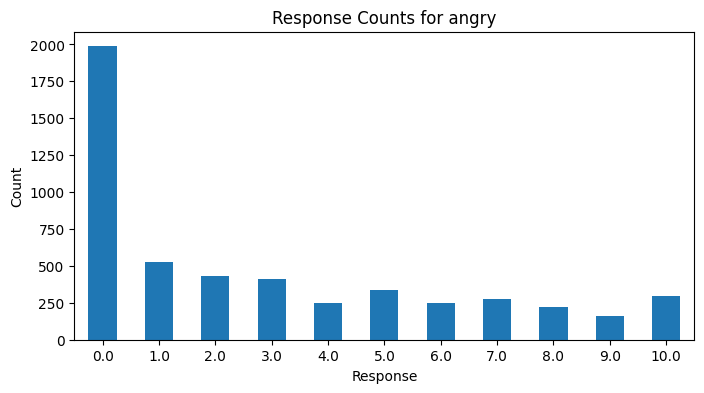

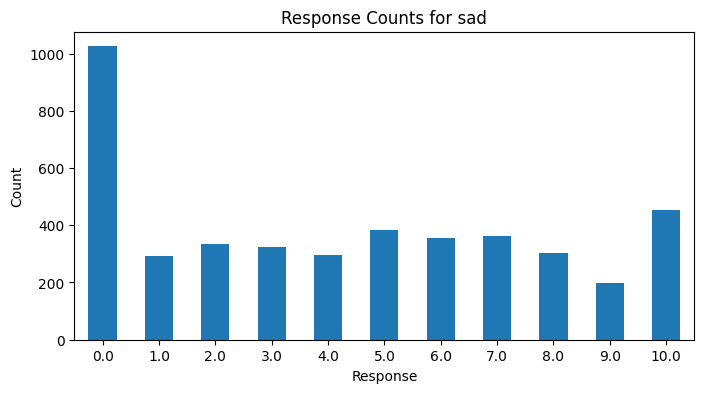

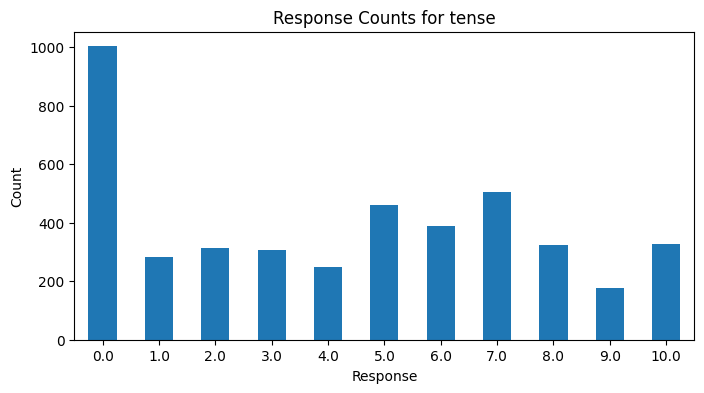

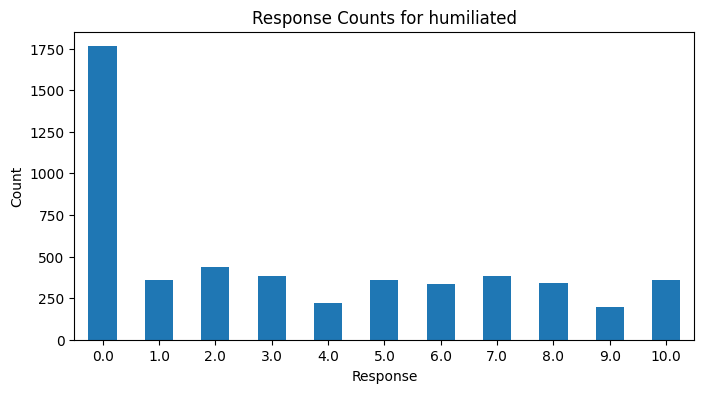

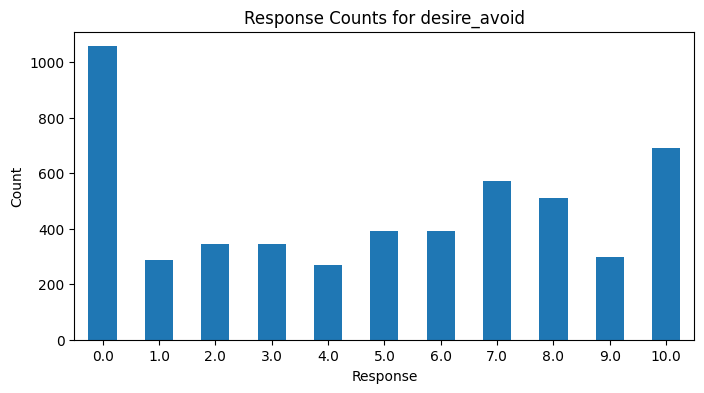

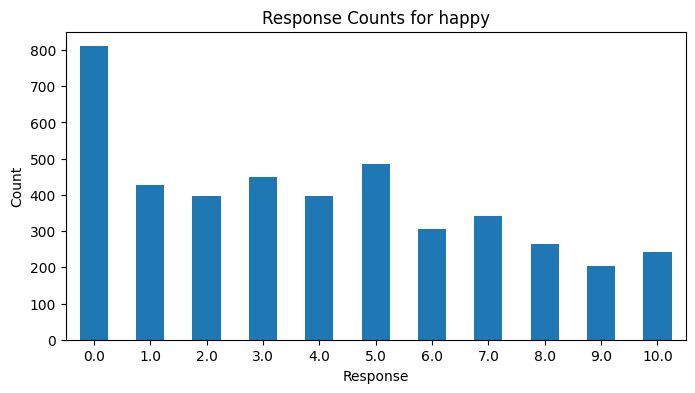

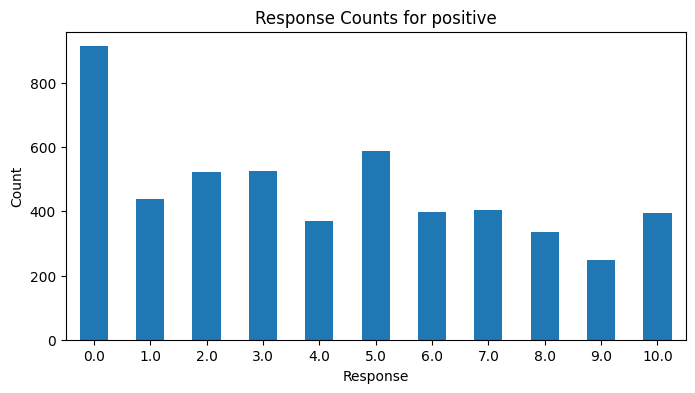

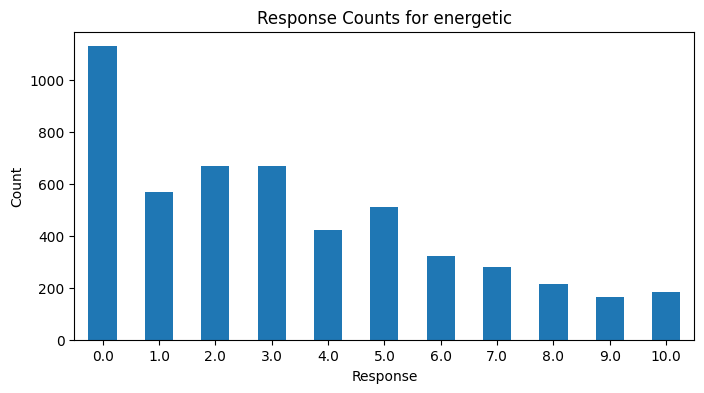

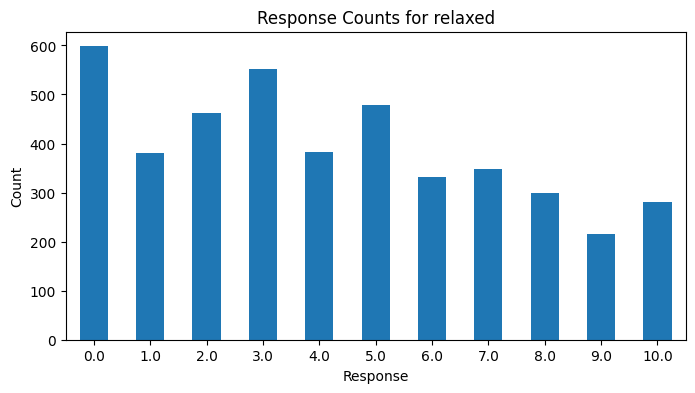

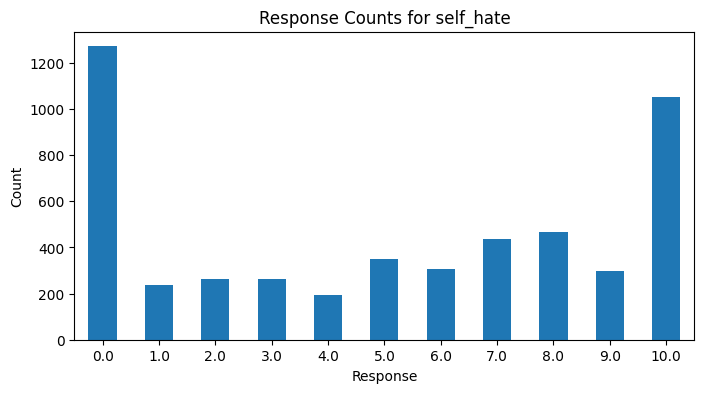

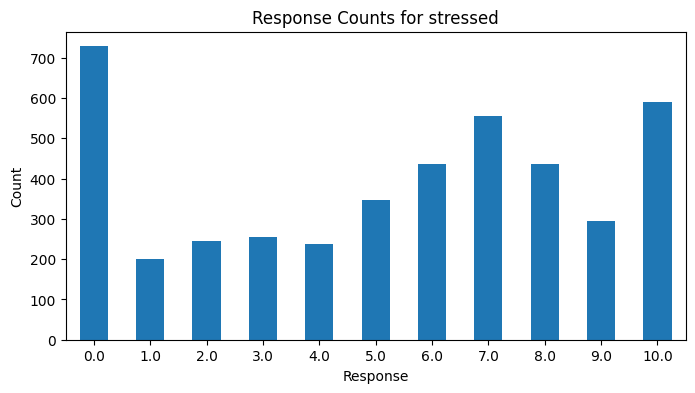

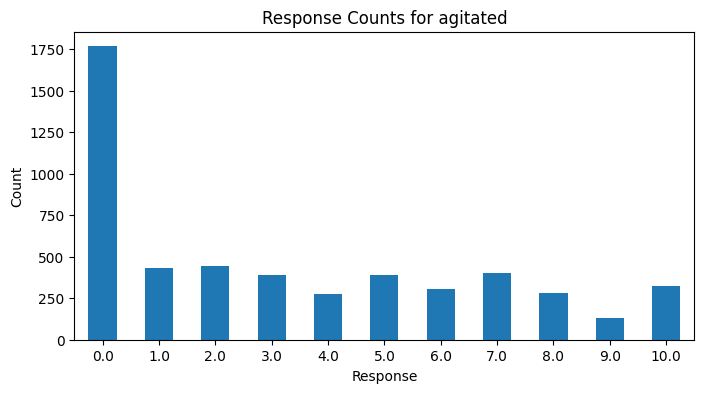

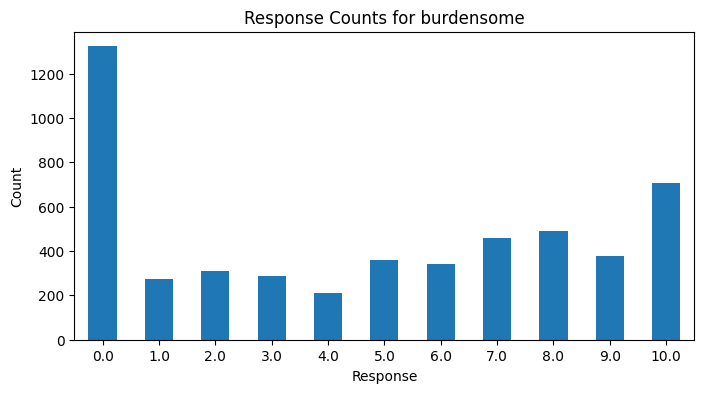

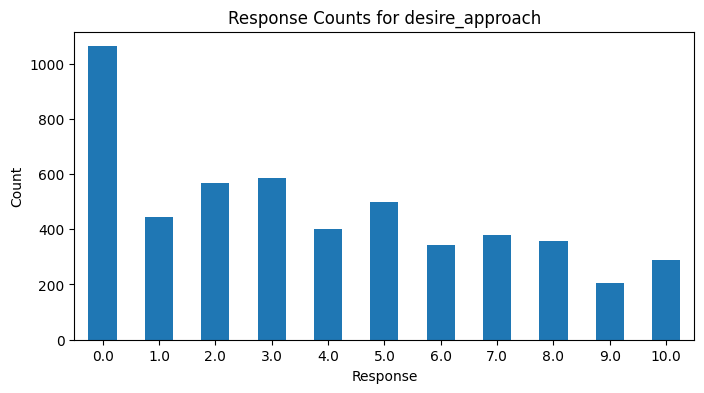

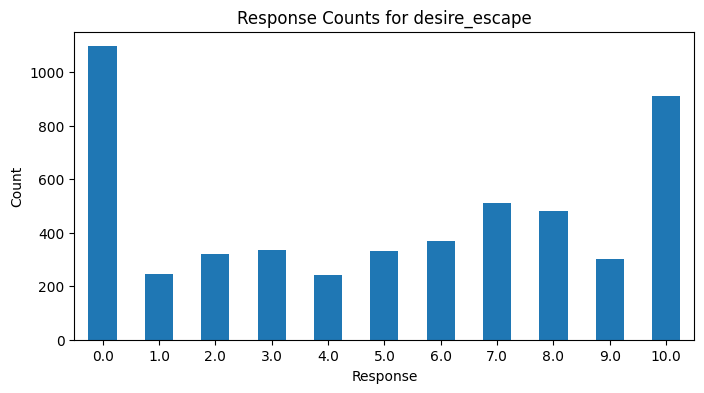

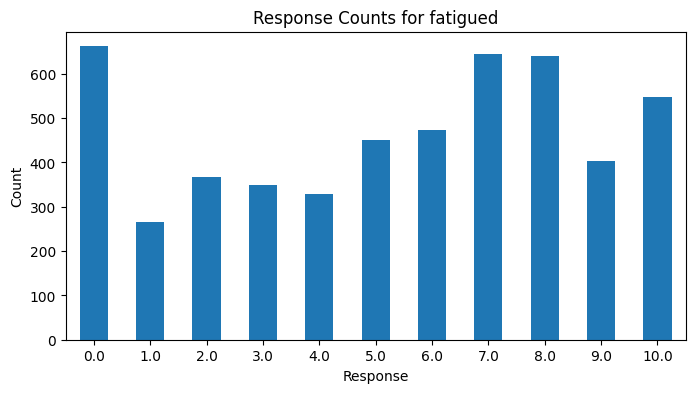

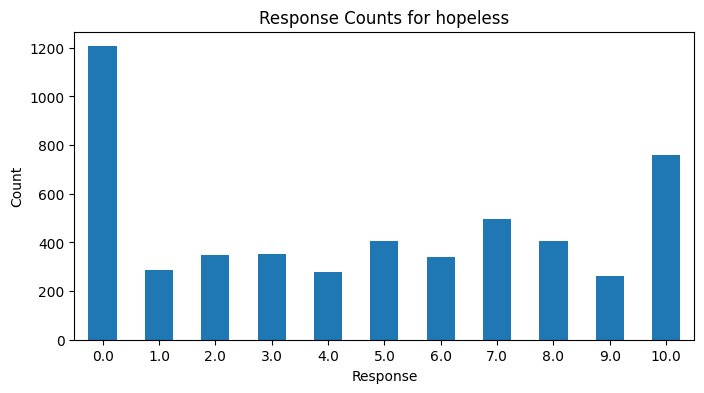

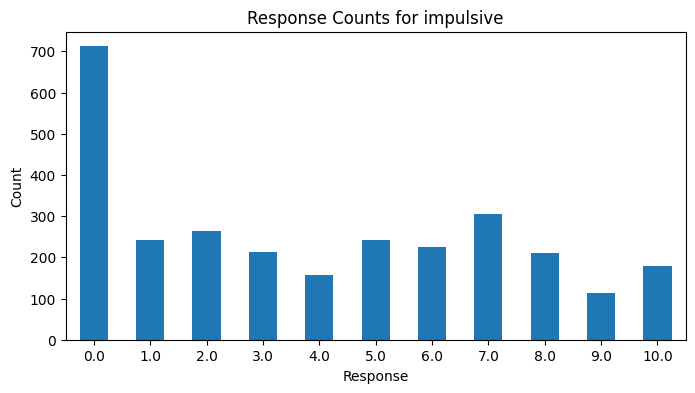

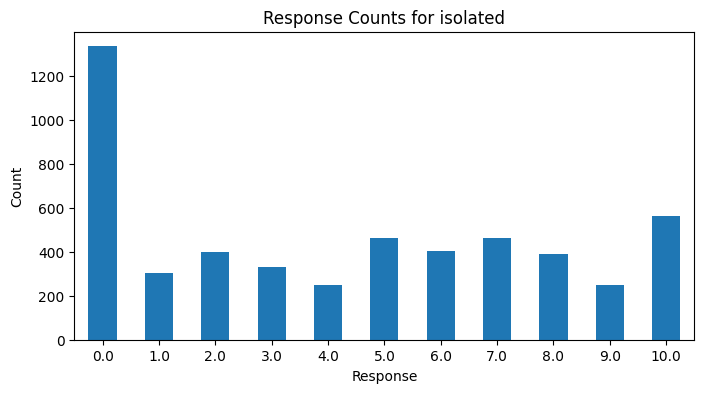

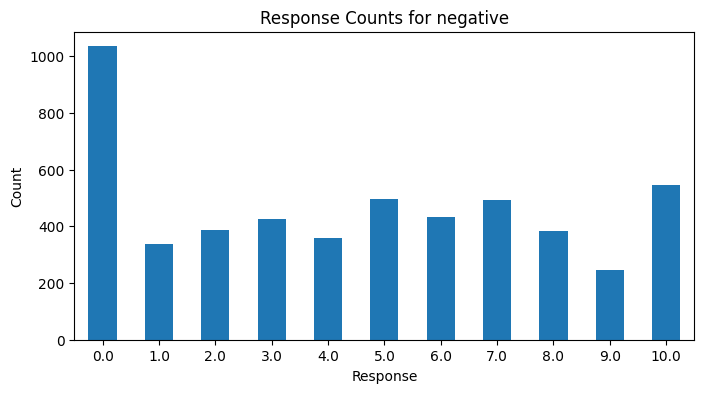

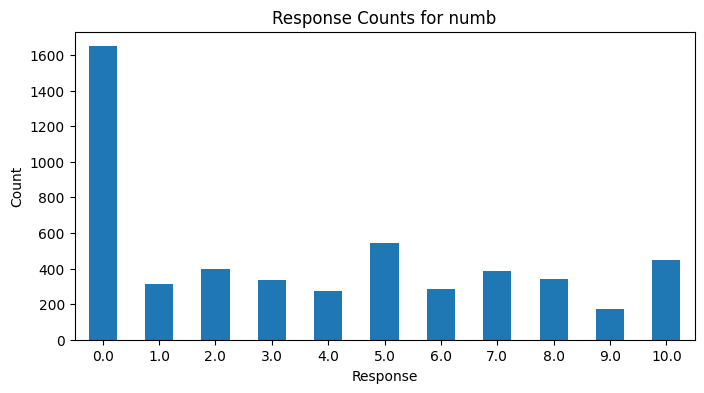

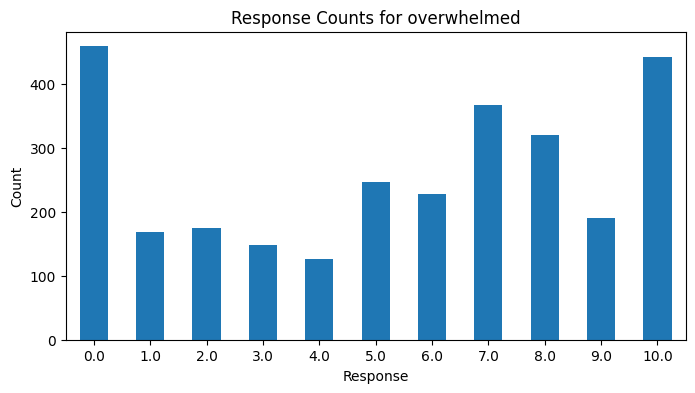

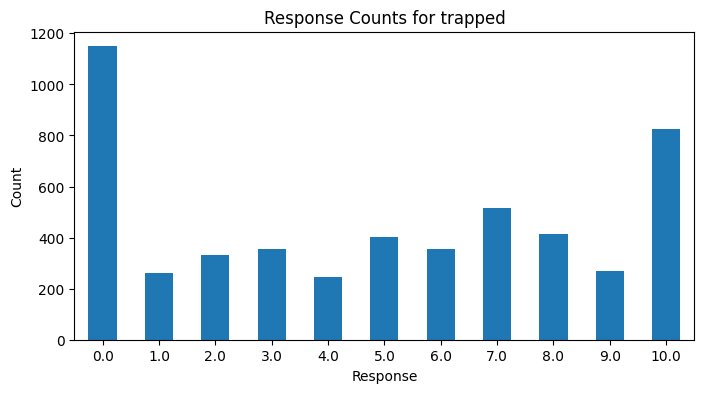

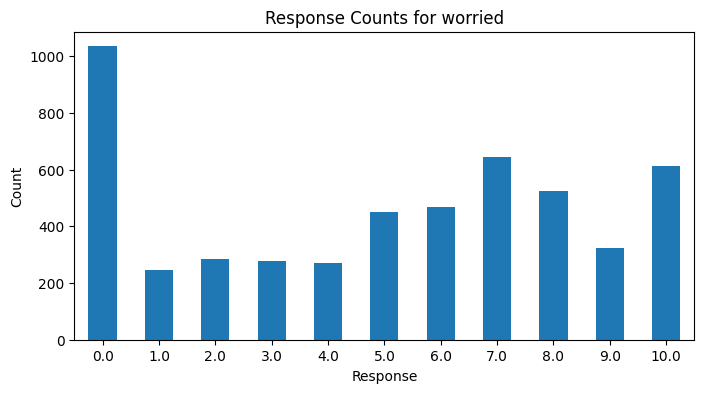

In [97]:
# Generate histograms for each column with emotional category data
for column in EMA_combined_EDA.iloc[:, 2:26].columns:
    plt.figure(figsize=(8, 4))
    EMA_combined_EDA[column].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Response Counts for {column}')
    plt.xlabel('Response')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show() 

### Impute missing data and seperate data for training (70%), validation (10%), and testing (20%)

In [98]:
# Define imputation functions for independent (X) variables
def impute_X_with_mean(df):
    """
    Impute missing values in independent variables (X) using the mean for each participant.
    
    Parameters:
    - df: DataFrame containing participant data
    
    Returns:
    - df: DataFrame with imputed X values
    """
    X = df.iloc[:, 30:59]
    X_imputed = df.groupby('ppt_id')[X.columns].transform(lambda col: col.fillna(col.mean()))
    df.iloc[:, 30:59] = X_imputed
    return df

# Define imputation functions for dependent (Y) variables
def impute_Y_across_participants(df, n_neighbors=5):
    """
    Impute missing values in dependent variables (Y) using KNN regression across participants.
    
    Parameters:
    - df: DataFrame containing participant data
    - n_neighbors: Number of neighbors to use for KNN regression
    
    Returns:
    - df: DataFrame with imputed Y values
    """
    # Impute missing values in X using the mean
    df = impute_X_with_mean(df)

    # Scale independent variables (X)
    X = df.iloc[:, 30:59].values
    scaler_X = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)

    # Replace NAType with np.nan and convert to float for dependent variables (Y)
    y = df.iloc[:, 2:26].replace({pd.NA: np.nan}).values.astype(float)
    
    # Impute missing values in Y using KNN regression
    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)
    for col in range(y.shape[1]):
        valid_train_indices = ~np.isnan(y[:, col])
        if valid_train_indices.sum() > 1:
            knn_regressor.fit(X_scaled[valid_train_indices], y[valid_train_indices, col])
            missing_indices = np.isnan(y[:, col])
            if missing_indices.any():
                y[missing_indices, col] = knn_regressor.predict(X_scaled[missing_indices])

    # Update DataFrame with imputed Y values
    df.iloc[:, 2:26] = y

    return df

# Encode NaN values consistently across the dataframe
EMA_EDA_2P = EMA_EDA_2P.applymap(lambda x: np.nan if pd.isna(x) else x)

# Impute X for all participants using mean imputation
EMA_EDA_2P = impute_X_with_mean(EMA_EDA_2P)

# Impute Y using KNN regression across participants
EMA_EDA_2P = impute_Y_across_participants(EMA_EDA_2P, n_neighbors=5)

# Specify independent and dependent variables
X = EMA_EDA_2P.iloc[:, 30:59] # Statistical and automatically derived features
y = EMA_EDA_2P.iloc[:, 2:26] # Subjective report ratings

# Step 1: Split the dataset into 80% training/validation and 20% test 
gss_1 = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=710)
train_val_indices, test_indices = next(gss_1.split(X, groups=EMA_EDA_2P['ppt_id']))

# Step 2: Split the 80% training/validation set into 87.5% (70% overall) training 
# and 12.5% (10% overall) validation
gss_2 = GroupShuffleSplit(n_splits=1, test_size=0.125, random_state=710)
train_indices, val_indices = next(gss_2.split(X.iloc[train_val_indices], groups=EMA_EDA_2P['ppt_id'].iloc[train_val_indices]))

# Subset the data based on the train, validation, and test indices
X_train = X.iloc[train_indices]
X_val = X.iloc[val_indices]
X_test = X.iloc[test_indices]

y_train = y.iloc[train_indices]
y_val = y.iloc[val_indices]
y_test = y.iloc[test_indices]

# Convert y_train, y_val, and y_test back into DataFrames for modeling and 
# set column names for independent variables
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)
y_test = pd.DataFrame(y_test)
X_train = pd.DataFrame(X_train, columns=EMA_EDA_2P.iloc[:, 30:59].columns)
X_val = pd.DataFrame(X_val, columns=EMA_EDA_2P.iloc[:, 30:59].columns)
X_test = pd.DataFrame(X_test, columns=EMA_EDA_2P.iloc[:, 30:59].columns)

# Create dataframes specifically for linear models (no hyperparameter tuning)
X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)

In [99]:
# Alter the structure of the data to match intended analysis objective
# Define the columns to pivot
columns_to_pivot = ['angry', 'sad', 'tense', 'humiliated', 'desire_avoid', 'happy', 'positive', 'energetic', 'relaxed', 'self_hate', 'stressed', 'agitated', 'burdensome', 'desire_approach', 'desire_escape', 'fatigued', 'hopeless', 'impulsive', 'isolated', 'negative', 'numb', 'overwhelmed', 'trapped', 'worried']

# Define "positive" variables for classification
Pstv = ['happy', 'positive', 'energetic', 'relaxed', 'desire_approach']

# Pivot to long format
Magnitude_y = y.melt(value_vars=columns_to_pivot, 
                  var_name='Emotion', value_name='Values')

# Add a 'Valence' column based on whether the 'emotion' is in the "negative" list
Magnitude_y['Valence'] = np.where(Magnitude_y['Emotion'].isin(Pstv), 'Pos', 'Neg')

# Reverse score using if-else logic with apply
Magnitude_y['Values'] = Magnitude_y.apply(
    lambda row: 10 - row['Values'] if row['Valence'] == 'Pos' else row['Values'], 
    axis=1
)
                  
# Stack Y
Magnitude_y = Magnitude_y['Values']

# Repeat each row of X for the number of Y columns
Magnitude_X = X.loc[X.index.repeat(y.shape[1])].reset_index(drop=True)

# ID Number
Magnitude_ID = EMA_EDA_2P['ppt_id'].loc[EMA_EDA_2P['ppt_id'].index.repeat(y.shape[1])].reset_index(drop=True)

In [100]:
# Redo Train-test split for magnitude-based data structure
# Step 1: Split the dataset into 80% training/validation and 20% test (indices-based approach)
mag_train_val_indices, mag_test_indices = train_test_split(
    Magnitude_X.index, test_size=0.2, random_state=710, stratify=Magnitude_ID
)

# Step 2: Split the 80% training/validation set into 87.5% (70% overall) training and 12.5% (10% overall) validation (indices-based approach)
mag_train_indices, mag_val_indices = train_test_split(
    mag_train_val_indices, test_size=0.125, random_state=710, stratify=Magnitude_ID[mag_train_val_indices]
)

# Subset the data based on the train-test indices
X_train_mag = Magnitude_X.loc[mag_train_indices]
X_val_mag = Magnitude_X.loc[mag_val_indices]
X_test_mag = Magnitude_X.loc[mag_test_indices]
y_train_magall_neg = Magnitude_y.loc[mag_train_indices]
y_val_magall_neg = Magnitude_y.loc[mag_val_indices]
y_test_magall_neg = Magnitude_y.loc[mag_test_indices]

# Convert y_train and y_test back into DataFrames for modeling and set column names for X_train and X_test
y_train_magall_neg = pd.DataFrame(y_train_magall_neg)
y_val_magall_neg = pd.DataFrame(y_val_magall_neg)
y_test_magall_neg = pd.DataFrame(y_test_magall_neg)
X_train_mag = pd.DataFrame(X_train_mag)
X_val_mag = pd.DataFrame(X_val_mag)
X_test_mag = pd.DataFrame(X_test_mag)

# Create dataframes specifically for linear models (no hyperparameter tuning)
X_train_val_mag = pd.concat([X_train_mag, X_val_mag], axis=0)
y_train_val_magall = pd.concat([y_train_magall_neg, y_val_magall_neg], axis=0)

In [101]:
#### Linear Regression ####
# Initialize necessary data structures to hold output
metrics_magall_neg = {'Mean Squared Error': [], 'R^2 Score': []}
feature_importances_magall_neg = pd.DataFrame(index=X_test_mag.columns)

#Initialize model
model_magall_neg = LinearRegression()
model_magall_neg.fit(X_train_mag, y_train_magall_neg)

# Hold-out predictions and evaluation metrics
y_pred_magall_neg = model_magall_neg.predict(X_test_mag)
mse_magall_neg = mean_squared_error(y_test_magall_neg, y_pred_magall_neg)
r2_magall_neg = r2_score(y_test_magall_neg, y_pred_magall_neg)

# Store evaluation metrics
metrics_magall_neg['Mean Squared Error'].append(mse_magall_neg)
metrics_magall_neg['R^2 Score'].append(r2_magall_neg)
    
# Store feature importances (coefficients)
feature_importances_magall_neg['Coef'] = model_magall_neg.coef_.flatten()

# Convert metrics dictionary to a DataFrame for easier viewing
metrics_df_magall_neg = pd.DataFrame(metrics_magall_neg)

# Display evaluation metrics and sorted feature importances
print("Model Evaluation Metrics:\n", metrics_df_magall_neg)
print("\nFeature Importances:\n", feature_importances_magall_neg)

Model Evaluation Metrics:
    Mean Squared Error  R^2 Score
0           11.653835   0.007304

Feature Importances:
                          Coef
GSR_avimp       -3.811057e+00
GSR_nimp        -3.593496e-04
GSR_maximp       8.089268e-02
GSR_mav          3.746273e+00
SCL_mav         -2.376331e-02
SCR_mav          3.880479e-02
GSR_std         -2.065560e-01
SCL_std          2.661549e-02
SCR_std          6.102180e-02
GSR_ssc          6.573654e-04
SCL_ssc          4.512047e-02
SCR_ssc         -3.295271e-02
GSR_wl          -9.836336e-04
SCL_wl           3.649659e-01
SCR_wl          -5.039053e-01
GSR_wamp         7.105427e-15
SCL_wamp        -9.547918e-15
SCR_wamp         1.776357e-14
AE_predictor_1   2.001412e+01
AE_predictor_2  -1.897389e+01
AE_predictor_3   2.632817e+01
AE_predictor_4  -2.306200e+00
AE_predictor_5  -4.075160e+00
AE_predictor_6  -1.664208e-01
AE_predictor_7   5.490321e+00
AE_predictor_8   1.286874e+01
AE_predictor_9   2.170390e+01
AE_predictor_10 -3.490680e+00
AE_predictor_1

In [102]:
#### Linear Regression (L1) ####
# Standardize the features for Lasso regression
scaler = StandardScaler()
X_train_mag_scaled = scaler.fit_transform(X_train_val_mag)
X_test_mag_scaled = scaler.transform(X_test_mag)

# Define range of variables considered for hyperparameter tuning
alpha_search = {'alpha': np.logspace(-4, 0, 50)}  # 50 alpha values from 0.0001 to 1

# Initialize necessary data structures to hold output
lasso_metrics_magall_neg = {'Mean Squared Error': [], 'R^2 Score': [], 'Best Alpha': []}
lasso_feature_importances_magall_neg = pd.DataFrame(index=X_test_mag.columns)
lasso_shap_values_dictall_neg = {}

# Ignore all warnings (for aesthetics)
warnings.filterwarnings("ignore")

# Hyperparameter tuning with GridSearchCV
magall_lasso_neg = Lasso(max_iter=1000) 
magall_grid_search_neg = GridSearchCV(
    estimator=magall_lasso_neg,
    param_grid=alpha_search,
    scoring='neg_mean_squared_error',
    cv=3 # 3 fold cross-validation 
)
magall_grid_search_neg.fit(X_train_mag_scaled, y_train_val_magall)

# Retrieve the best alpha value
lasso_magall_best_alpha_neg = magall_grid_search_neg.best_params_['alpha']
lasso_magall_best_model_neg = magall_grid_search_neg.best_estimator_

# Predict and evaluate on the test set
lasso_y_pred_magall_neg = lasso_magall_best_model_neg.predict(X_test_mag_scaled)
mse_magall_neg = mean_squared_error(y_test_magall_neg, lasso_y_pred_magall_neg)
r2_magall_neg = r2_score(y_test_magall_neg, lasso_y_pred_magall_neg)

# Store evaluation metrics
lasso_metrics_magall_neg['Best Alpha'].append(lasso_magall_best_alpha_neg)
lasso_metrics_magall_neg['Mean Squared Error'].append(mse_magall_neg)
lasso_metrics_magall_neg['R^2 Score'].append(r2_magall_neg)

# Store feature importances (coefficients)
lasso_feature_importances_magall_neg = pd.Series(
    lasso_magall_best_model_neg.coef_, index=X_train_mag.columns
)

# Convert metrics dictionary to a DataFrame for easier viewing
magall_lasso_metrics_df_neg = pd.DataFrame(lasso_metrics_magall_neg)

# Display evaluation metrics and sorted feature importances
print("Lasso Model Evaluation Metrics:\n", magall_lasso_metrics_df_neg)
print("\nFeature Importances by Emotion (Lasso Coefficients):\n", lasso_feature_importances_magall_neg)

Lasso Model Evaluation Metrics:
    Mean Squared Error  R^2 Score  Best Alpha
0           11.677238   0.005311      0.0001

Feature Importances by Emotion (Lasso Coefficients):
 GSR_avimp         -0.257598
GSR_nimp           0.019194
GSR_maximp         0.171613
GSR_mav            0.111298
SCL_mav           -0.184988
SCR_mav            0.206352
GSR_std           -0.062771
SCL_std            0.228214
SCR_std           -0.144972
GSR_ssc            0.040403
SCL_ssc            0.138731
SCR_ssc           -0.157058
GSR_wl            -0.030459
SCL_wl             0.201983
SCR_wl            -0.320828
GSR_wamp           0.000000
SCL_wamp           0.000000
SCR_wamp           0.000000
AE_predictor_1     0.041769
AE_predictor_2    -0.063502
AE_predictor_3     0.109178
AE_predictor_4    -0.009039
AE_predictor_5    -0.027412
AE_predictor_6     0.007541
AE_predictor_7     0.020215
AE_predictor_8     0.030764
AE_predictor_9     0.088277
AE_predictor_10   -0.008417
AE_predictor_11   -0.029792
dtype: flo

In [103]:
#### RANDOM FOREST ####
# Dictionary for Random Forest models and evaluation metrics
rf_metrics_magall_neg = {'Mean Squared Error': [], 'R^2 Score': []}

# Defines the hyperparameter space for initial random search
hyperparam_space_rand = {
    'max_depth': list(range(5, 100, 10)) + [None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': range(1, 6),
    'min_samples_split': [2, 5, 10],
    'n_estimators': list(range(100, 1000, 100))
}

# Helper functions
def gen_range(val, num, step, min_val=1):
    # Generates a range 
    dist_floor = floor(num / 2.) * step
    dist_ceil = ceil(num / 2.) * step
    return range(max(val - dist_floor, min_val), val + dist_ceil, step)

def gen_hyperparam_space(prev_optimal):
    # Generate a hyperparameter space around previous optimal values
    return {
        'max_depth': [None] if prev_optimal['max_depth'] is None else gen_range(prev_optimal['max_depth'], 4, 3),
        'max_features': [prev_optimal['max_features']],
        'min_samples_leaf': [prev_optimal['min_samples_leaf']],
        'min_samples_split': gen_range(prev_optimal['min_samples_split'], 3, 2, min_val=2),
        'n_estimators': gen_range(prev_optimal['n_estimators'], 5, 20),
    }

# Step 1: Initial search with RandomizedSearchCV
rf_base_magall_neg = RandomForestRegressor(random_state=710)
rf_random_magall_neg = RandomizedSearchCV(
    estimator=rf_base_magall_neg,
    param_distributions=hyperparam_space_rand,
    n_iter=50,
    cv=3,
    verbose=2,
    refit=True,
    random_state=710
)

# Randomized Search
rf_random_magall_neg.fit(X_train_mag, np.array(y_train_magall_neg).reshape(-1, 1).flatten())
best_random_model_magall_neg = rf_random_magall_neg.best_estimator_

# Evaluate the best model on the validation set
val_predictions_allneg = best_random_model_magall_neg.predict(X_val_mag)
val_mse_allneg = mean_squared_error(y_val_magall_neg, val_predictions_allneg)
val_r2_allneg = r2_score(y_val_magall_neg, val_predictions_allneg)
print(f"Validation MSE after RandomizedSearchCV: {val_mse_allneg}, Validation R^2: {val_r2_allneg}")

# Step 2: Further refine with GridSearchCV
rf_prev_optimal_magall_neg = rf_random_magall_neg.best_params_
rf_hyperparam_space_concentrated_magall_neg = gen_hyperparam_space(rf_prev_optimal_magall_neg)

rf_grid_magall_neg = GridSearchCV(
    estimator=rf_base_magall_neg,
    param_grid=rf_hyperparam_space_concentrated_magall_neg,
    cv=3,
    verbose=2,
    refit=True
)
rf_grid_magall_neg.fit(X_train_mag, np.array(y_train_magall_neg).reshape(-1, 1).flatten())
best_rf_model_magall_neg = rf_grid_magall_neg.best_estimator_

# Step 3: Refit the final model on the combined train-validation set
X_train_final_mag = pd.concat([X_train_mag, X_val_mag], axis=0).reset_index(drop=True)
y_train_final_magall_neg = pd.concat([y_train_magall_neg, y_val_magall_neg], axis=0).reset_index(drop=True)
y_train_final_magall_neg = y_train_final_magall_neg.values.ravel()
best_rf_model_magall_neg.fit(X_train_final_mag, y_train_final_magall_neg)

# Evaluate the final model on the test set
rf_y_pred_magall_neg = best_rf_model_magall_neg.predict(X_test_mag)
rf_mse_magall_neg = mean_squared_error(y_test_magall_neg, rf_y_pred_magall_neg)
rf_r2_magall_neg = r2_score(y_test_magall_neg, rf_y_pred_magall_neg)

# Store evaluation metrics
rf_metrics_magall_neg['Mean Squared Error'].append(rf_mse_magall_neg)
rf_metrics_magall_neg['R^2 Score'].append(rf_r2_magall_neg)

# Convert metrics dictionary to a DataFrame for easier viewing
rf_metrics_df_magall_neg = pd.DataFrame(rf_metrics_magall_neg)

# Display evaluation metrics
print("Random Forest Model Evaluation Metrics:\n", rf_metrics_df_magall_neg)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  30.9s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  29.3s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  30.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  19.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  18.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  19.4s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=  58.8s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estim

In [104]:
# Print best hyperparameters, MSE scores, and chosen model
print("=========================")
print("Hyper-parameters")
print(dict(zip(["rf_random", "rf_grid"], [m.best_params_ for m in [rf_random_magall_neg, rf_grid_magall_neg]])))

# Calculate MSE for both models on the chosen target for comparison
rf_mse_vals_magall_neg = [
    mean_squared_error(y_test_magall_neg, rf_grid_magall_neg.best_estimator_.predict(X_test_mag)),
    mean_squared_error(y_test_magall_neg, rf_grid_magall_neg.best_estimator_.predict(X_test_mag))
]
best_rf_model_index_magall_neg = np.argmin(rf_mse_vals_magall_neg)  # Find index of best-performing model based on MSE

print("=========================")
print("MSE Scores (Lower is better)")
print(dict(zip(["rf_random", "rf_grid"], rf_mse_vals_magall_neg)))

print("=========================")
print("Chosen Model:")
print(["rf_random", "rf_grid"][best_rf_model_index_magall_neg])

Hyper-parameters
{'rf_random': {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 35}, 'rf_grid': {'max_depth': 32, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 820}}
MSE Scores (Lower is better)
{'rf_random': 6.001091833083775, 'rf_grid': 6.001091833083775}
Chosen Model:
rf_random


In [105]:
#### XGBOOST ####
# Initialize dictionaries to store XGBoost models and evaluation metrics
xgb_metrics_magall_neg = {'Mean Squared Error': [], 'R^2 Score': []}

# Define the hyperparameter space for initial random search
hyperparam_space_rand = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': list(range(3, 10)),
    'n_estimators': list(range(100, 1100, 100)),
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0]
}

# Helper functions
def gen_range(val, num, step, min_val=1):
    # Generates a range 
    dist_floor = floor(num / 2.) * step
    dist_ceil = ceil(num / 2.) * step
    return range(max(val - dist_floor, min_val), val + dist_ceil, step)

def gen_hyperparam_space(prev_optimal):
    return {
        'learning_rate': [prev_optimal['learning_rate']],
        'max_depth': gen_range(prev_optimal['max_depth'], 4, 1, min_val=3),
        'n_estimators': gen_range(prev_optimal['n_estimators'], 5, 100),
        'subsample': [prev_optimal['subsample']],
        'colsample_bytree': [prev_optimal['colsample_bytree']]
    }

# Fit and evaluate model
# Initial Randomized Search
xgb_base_magall_neg = XGBRegressor(random_state=710)
xgb_random_magall_neg = RandomizedSearchCV(
    estimator=xgb_base_magall_neg,
    param_distributions=hyperparam_space_rand,
    n_iter=50,
    cv=3,
    verbose=2,
    refit=True,
    random_state=710
)
xgb_random_magall_neg.fit(X_train_mag, np.array(y_train_magall_neg).reshape(-1, 1).flatten())

# Define concentrated hyperparameter space based on RandomizedSearchCV results
prev_optimal_magall_neg = xgb_random_magall_neg.best_params_
hyperparam_space_concentrated_magall_neg = gen_hyperparam_space(prev_optimal_magall_neg)

# Further refinement with GridSearchCV
xgb_grid_magall_neg = GridSearchCV(
    estimator=xgb_base_magall_neg,
    param_grid=hyperparam_space_concentrated_magall_neg,
    cv=3,
    verbose=2,
    refit=True
)
xgb_grid_magall_neg.fit(X_train_mag, np.array(y_train_magall_neg).reshape(-1, 1).flatten())
best_xgb_model_magall_neg = xgb_grid_magall_neg.best_estimator_

# Predictions and metrics
y_pred_magall_neg = best_xgb_model_magall_neg.predict(X_test_mag)
xgb_mse_magall_neg = mean_squared_error(y_test_magall_neg, y_pred_magall_neg)
xgb_r2_magall_neg= r2_score(y_test_magall_neg, y_pred_magall_neg)

# Store evaluation metrics
xgb_metrics_magall_neg['Mean Squared Error'].append(xgb_mse_magall_neg)
xgb_metrics_magall_neg['R^2 Score'].append(xgb_r2_magall_neg)

# Convert metrics dictionary to a DataFrame for easier viewing
xgb_metrics_df_magall_neg = pd.DataFrame(xgb_metrics_magall_neg)

# Display evaluation metrics
print("XGBoost Model Evaluation Metrics:\n", xgb_metrics_df_magall_neg)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   2.5s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   2.5s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=8, n_estimators=500, subsample=0.7; total time=   2.5s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.3, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=1.0; total time=   1.3s
[CV] END colsample

In [106]:
# Print best hyperparameters, MSE scores, and chosen model
print("=========================")
print("Hyper-parameters for each search")
print(dict(zip(["xgb_random", "xgb_grid"], [m.best_params_ for m in [xgb_random_magall_neg, xgb_grid_magall_neg]])))

# Calculate MSE for both models on the chosen target for comparison
xgb_mse_vals_magall_neg = [
    mean_squared_error(y_test_magall_neg, xgb_random_magall_neg.best_estimator_.predict(X_test_mag)),
    mean_squared_error(y_test_magall_neg, xgb_grid_magall_neg.best_estimator_.predict(X_test_mag))
]
best_xgb_model_index_magall_neg = np.argmin(xgb_mse_magall_neg)  # Find index of best-performing model based on MSE

print("=========================")
print("MSE Scores (Lower is better)")
print(dict(zip(["xgb_random", "xgb_grid"], xgb_mse_vals_magall_neg)))

print("=========================")
print("Chosen Model:")
print(["xgb_random", "xgb_grid"][best_xgb_model_index_magall_neg])

Hyper-parameters for each search
{'xgb_random': {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.2, 'colsample_bytree': 0.7}, 'xgb_grid': {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 201, 'subsample': 1.0}}
MSE Scores (Lower is better)
{'xgb_random': 6.0349404802315, 'xgb_grid': 6.035267046229158}
Chosen Model:
xgb_random
